# Problem Statement

## Business Understanding

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

* If the applicant is **likely to repay the loan**, then not approving the loan results in a **loss of business** to the company

* If the applicant is **not likely to repay the loan**, i.e. he/she is likely to default, then approving the loan may lead to a **financial loss** for the company

 

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

 

In this case study, you will use EDA to understand how **consumer attributes** and **loan attributes** influence the tendency of default.

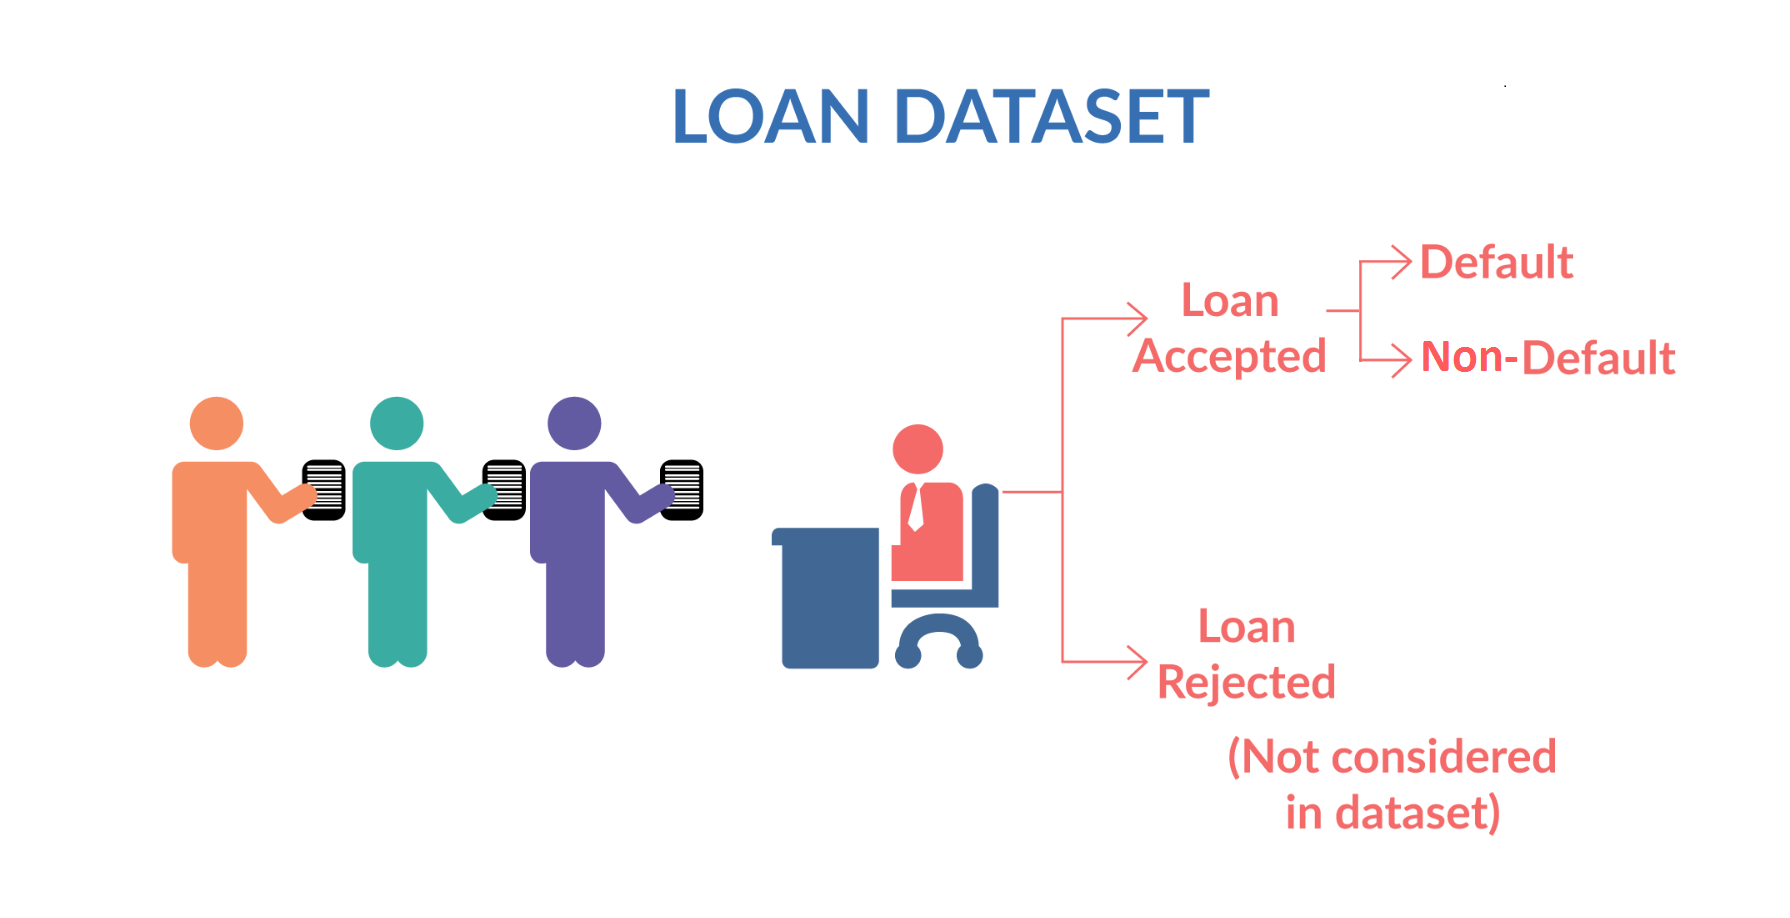
Figure Loan Data Set can also refer to link: [Upgrad Lending Club Case Study](https://learn.upgrad.com/course/4617/segment/27462/164543/505323/2600603)

When a person applies for a loan, there are **two types of decisions** that could be taken by the company:

1. **Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:

    * **Fully paid**: Applicant has fully paid the loan (the principal and the interest rate)

    * **Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These  candidates are not labelled as 'defaulted'.

    * **Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has **defaulted** on the loan 

2. **Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

# Business Objectives

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who **default** cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the **driving factors (or driver variables)** behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

### Note: Evaluation Rubric For reference
1. Data understanding  (10%)
2. Data Cleaning and Manipulation (20%)
3. Data analysis (40%)
4. Presentation and Recommendations (20%)
5. Conciseness and readability of the code (10%)

## Thought Process 

1. Exporing Data 
    For understanding or to explore data set, first step is to load the data and and analyse using 
      * df.info
      * df.shape
      * df[listofcols].describe().T T : to transpose the data for easy visualization

2. Cleaning the data, manipulation (or impute the data) Data cleaning and imputation includes :
    - look for null data, using df.isnull().sum() : gives number of null values in all columns in df
    - use data.isnull().mean()*100 to get the feel of missing values in every column
    - Check for duplicate values using : data.duplicated.sum() / data.duplicated.any(): duplicate values will influence the final result / outcome and will add bias to the data. 
    - So its very much critical to find duplicates and drop them as required. drop data using : data.drop_duplicates(subset=None, inplace=True)
    - **Note**: alternatively find unique values in each column using df.nunique() to count the number of unique values in a given axis and drop the duplicates using df.drop(same_value_cols, axis=1)
    - drop all columns which has not valid values (i.e. all null values) such columns does not add to any value for analysis.
    
3. Data analysis includes:
    - Check for mean, median, mode , and std deviations, which gives us insights into the data and distribution of data.
    - Check for outliers : can be checked using visualization boxplot, the boxplot clearly shows the outliers , whiskers of the box plot indicate the outliers.
    - Based on above analysis, we can have outlier threshold of interquartile ranges q1 as 0.05 and q4 as 0.95 (5% percentile to 95% percentile) and remove the outliers.
    - Outliers can impact analysis as the analysis will be hearvily biased towards outliers, so the outliers needs to be identfied and replaced with threshold values (need to rephrase these)
    
    **NOTE** : check EDA session by Aditya B : on replacing data using threadsholds  time frame for the same in the video : 1:56:13 
    link : [EDA session by Aditya B](https://live.upgrad.com/summary/oa1QB1mFMoFniNGUDjsreNfCZ3NTAse7)
    
    - Correlation function : this is similar to redundant / duplicate data, adds biases to the model and we need to give importance to correlated features and its recommended to drop highly correlated features to avoid biases to the outcome / model.
    - Heat map can help in indentifying highly correlated features.
    
    **TODO** : add more details on data analysis and cleaning and path we want to take for case study.
    
  

## Data import and exploration, import loan.csv and dict in different data frames and do initial clean up like stripping space, null/nan values and dropping columns with all nan values 

In [2458]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


from datetime import datetime
%matplotlib inline

df = pd.read_csv("loan.csv", low_memory=False)
df.columns = df.columns.str.replace(' ', '')

data_dict = pd.read_excel("Data_Dictionary.xlsx")
data_dict.columns = data_dict.columns.str.replace(' ', '')
data_dict.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LoanStatNew  115 non-null    object
 1   Description  116 non-null    object
dtypes: object(2)
memory usage: 2.0+ KB


In [2459]:
data_dict.isnull().sum()

LoanStatNew    2
Description    1
dtype: int64

In [2460]:
df.delinq_2yrs.describe()

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

<h3><strong>Check for NaN values in rows and remove them from dict, from visual inspectation of dictionary excel sheet last 2 rows has&nbsp;empty values which is removed using dropna()
</strong>
</h3>

In [2461]:
data_dict = data_dict.dropna()
data_dict.tail(5)

,LoanStatNew,Description
110,total_rev_hi_lim,Total revolving high credit/credit limit
111,url,URL for the LC page with listing data.
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...


<h3><strong>Find any duplicate values and if present drop them, not necessary for dict but lets have it&nbsp;</strong></h3>

In [2462]:
if data_dict.duplicated().any():
    data_dict.drop_duplicates(subset=None, inplace=True)
data_dict.shape

(115, 2)

In [2463]:
data_dict

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
110,total_rev_hi_lim,Total revolving high credit/credit limit
111,url,URL for the LC page with listing data.
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...


In [2464]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

<h3><p><strong>Few columns have extra spaces as the end in the data dictionary. </strong></p>
<p><strong>Lets trim these spaces&nbsp;</strong></p>
    </h3>

In [2465]:
data_dict.LoanStatNew = data_dict.LoanStatNew.apply(lambda col : col.strip())
data_dict.LoanStatNew

0             acc_now_delinq
1       acc_open_past_24mths
2                 addr_state
3                   all_util
4                 annual_inc
               ...          
110         total_rev_hi_lim
111                      url
112      verification_status
113    verified_status_joint
114                 zip_code
Name: LoanStatNew, Length: 115, dtype: object

<h3><strong>Now compare column names from df and dictionary to be sure both matches and modify any mismatching columns</strong></h3>

In [2466]:
df_columns = df.columns

dict_cols = list(data_dict.LoanStatNew.apply(lambda x : x))
print(len(dict_cols))
mismatch_cols = [col for col in df_columns if col not in dict_cols]

mismatch_dict = {}

for col in mismatch_cols:
    try:
        index = df.columns.get_loc(col)
        mismatch_dict[col] = index
    except :
        pass
 
print(mismatch_dict)
print("Num of columns in DataFrame and Dict Match ?:", len(dict_cols) == len(df_columns))

115
{'verification_status_joint': 55}
Num of columns in DataFrame and Dict Match ?: False


<h3>From above results, since df columns len and dict col len does not match, <br />Manually inspect the dictionary with closest matching name and <br />Rename all the mismatching column names in DataFrame</h3>
<p>&nbsp;</p>

In [2467]:
df.rename(columns = {'verification_status_joint':'verified_status_joint'},inplace = True)


In [2468]:
# Loop through each column to analyze the dtype and null values using mean() function / sum() function
# TODO dump these in file no need to print
for col in df.columns:
    if df[col].isnull().mean()*100 == 0 :
        print("Column Name          : ",col)
        print("Data Type            : ",df[col].dtype)
        print("Number of NnN Values : ",df[col].isnull().mean()*100,"%")
        print("Description          : ",data_dict[data_dict.LoanStatNew == col].iloc[0,1])

        print(" ##############  ##############  ##############  ############## ")

Column Name          :  id
Data Type            :  int64
Number of NnN Values :  0.0 %
Description          :  A unique LC assigned ID for the loan listing.
 ##############  ##############  ##############  ############## 
Column Name          :  member_id
Data Type            :  int64
Number of NnN Values :  0.0 %
Description          :  A unique LC assigned Id for the borrower member.
 ##############  ##############  ##############  ############## 
Column Name          :  loan_amnt
Data Type            :  int64
Number of NnN Values :  0.0 %
Description          :  The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
 ##############  ##############  ##############  ############## 
Column Name          :  funded_amnt
Data Type            :  int64
Number of NnN Values :  0.0 %
Description          :  The total amount committed to that loan at that point in time.
 ######

Column Name          :  recoveries
Data Type            :  float64
Number of NnN Values :  0.0 %
Description          :  post charge off gross recovery
 ##############  ##############  ##############  ############## 
Column Name          :  collection_recovery_fee
Data Type            :  float64
Number of NnN Values :  0.0 %
Description          :  post charge off collection fee
 ##############  ##############  ##############  ############## 
Column Name          :  last_pymnt_amnt
Data Type            :  float64
Number of NnN Values :  0.0 %
Description          :  Last total payment amount received
 ##############  ##############  ##############  ############## 
Column Name          :  policy_code
Data Type            :  int64
Number of NnN Values :  0.0 %
Description          :  publicly available policy_code=1
new products not publicly available policy_code=2
 ##############  ##############  ##############  ############## 
Column Name          :  application_type
Data Type         

In [2469]:
df.delinq_2yrs.describe()

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [2470]:
df.shape

(39717, 111)

In [2471]:
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [2472]:
# Parsing through all columns with a aim to find all totally NULL/NaN columns
columns = data_dict.LoanStatNew

#Last two entries of data_dict are NaN, so removing it 
columns = columns.dropna()

# Creating an empty array for null columns
null_columns = []

#Parsing all the columns
for col in columns:
    try:
        if df[col].isnull().all() == True:
            null_columns.append(col)
    except :
        pass

#Checking the count of null columns found
print(len(null_columns))

# Printing the null columns
print(null_columns)

54
['acc_open_past_24mths', 'all_util', 'annual_inc_joint', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'dti_joint', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_major_derog', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'open_il_6m', 'open_rv_12m', 'open_rv_24m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bal_il', 'total_bc_limit', 'total_cu_tl', 'total_il_high_credit_limit', 'total_rev_hi_lim', 'verified_status_j

In [2473]:
df.delinq_2yrs.describe()

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

<div class="CodeMirror-sizer">
<div>
<div class="CodeMirror-lines">
<div>
<div class="CodeMirror-code"><strong><span class=" CodeMirror-line " style="color: #0000ff;"><span class="cm-header cm-header-4">Droping all the newly found null/nan columns in single command</span></span></strong></div>
</div>
</div>
</div>
</div>

In [2474]:
df = df.drop(null_columns, axis=1)

In [2475]:
# df.duplicated().any() returns : True if there is at least one duplicate row in the DataFrame, and False otherwise
if df.duplicated().any():
    df.drop_duplicates(subset=None, inplace=True)

# df.duplicated().all() returns True if all rows in the DataFrame are duplicates, and False otherwise
if df.duplicated().all():
    df.drop_duplicates(subset=None, inplace=True)

print(df.shape)

(39717, 57)


In [2476]:
df.delinq_2yrs.describe()

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [2477]:
#Finding columns where all entries are exactly same
same_value_cols = df.columns[df.nunique() == 1]
print(same_value_cols)

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')


In [2478]:
# Dropping the columns where all entries are exactly same
df = df.drop(same_value_cols, axis=1)

In [2479]:
# Drop columns if the % of missing values in col is greater than or equal to 90%
for col in df.columns:
    if df[col].isnull().mean()*100 >= 90:
        print("Droping ",col)
        df.drop(col,axis=1,inplace=True)

Droping  mths_since_last_record
Droping  next_pymnt_d


In [2480]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [2481]:
df.delinq_2yrs.describe()

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [2482]:
# Sort and print top 10 NULL values column names
null_rows = df.isnull().sum()
sorted_columns = null_rows.sort_values(ascending=False)
print(sorted_columns[:10])

mths_since_last_delinq    25682
desc                      12942
emp_title                  2459
emp_length                 1075
pub_rec_bankruptcies        697
last_pymnt_d                 71
revol_util                   50
title                        11
last_credit_pull_d            2
out_prncp                     0
dtype: int64


In [2483]:
# Date Column that can be candidate for derived matrix
#  #   Column                   Non-Null Count  Dtype  
# ---  ------                   --------------  -----  
# 15  issue_d                  39717 non-null  object 
# 24  earliest_cr_line         39717 non-null  object 
#  40  last_pymnt_d             39646 non-null  object 
#  42  last_credit_pull_d       39715 non-null  object 

# df['issue_d_month'] = df.issue_d.apply(lambda x : datetime.strptime(x[:3], '%b').month)
# df['issue_d_year'] = df.issue_d.apply(lambda x : int(x[-2:]))

# df_dict.loc[len(df_dict.index)] = ['issue_d_month',df_dict[df_dict.LoanStatNew == "issue_d"].iloc[0,1]]
# df_dict.loc[len(df_dict.index)] = ['issue_d_year',df_dict[df_dict.LoanStatNew == "issue_d"].iloc[0,1]]

# df.drop('issue_d',axis=1,inplace=True)

<h3 style="color:blue; font-style: italic;"> 
The column (mths_since_last_delinq) is an import column:
    <ul>
        <li>Its showing history of borrowers who have not paid amount.</li> 
        <li>Its showing list of lawbreaking offenders </li> 
        <li>A total of 25682 rows in mths_since_last_delinq have NaN, but other columns have.</li> 
        <li>Dropping this may lead to a decision where bank may end up giving offenders also a loan.</li> 
        <li>So we have to impute those with a value as 0.</li> </ul>
</h3>

In [2484]:
df.mths_since_last_delinq.fillna(0, inplace = True)

In [2485]:
def get_mode_and_impute(col):
    mode = df[col].mode().values[0]
    df[col].fillna(mode, inplace = True)


# emp_mode = df.emp_title.mode().values[0]
# print(emp_mode)
# df.emp_title.fillna(emp_mode, inplace = True)

get_mode_and_impute('emp_title')


In [2486]:
df.emp_title

0                           US Army
1                             Ryder
2                           US Army
3               AIR RESOURCES BOARD
4          University Medical Group
                    ...            
39712               FiSite Research
39713    Squarewave Solutions, Ltd.
39714                       US Army
39715                       US Army
39716              Evergreen Center
Name: emp_title, Length: 39717, dtype: object

In [2487]:
null_rows = df.isnull().sum()
sorted_columns = null_rows.sort_values(ascending=False)
print(sorted_columns[:10])

desc                      12942
emp_length                 1075
pub_rec_bankruptcies        697
last_pymnt_d                 71
revol_util                   50
title                        11
last_credit_pull_d            2
out_prncp                     0
mths_since_last_delinq        0
open_acc                      0
dtype: int64


In [2488]:
get_mode_and_impute('emp_length')

In [2489]:
df.delinq_2yrs.describe()

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [2490]:
df.delinq_2yrs.fillna(0, inplace = True)

In [2491]:
df.delinq_2yrs.describe()

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

<h3><strong>pub_rec_bankruptcies is again a special case, not everyone will have a record in this column.</strong><br /><strong>But those borrowers whose have a pub_rec_bankruptcies record have to be considered.</strong><br /><br /><strong>Hence this cant be dropped. Instead it can be imputed by 0</strong></h3>

In [2492]:
df.pub_rec_bankruptcies.fillna(0, inplace = True)

In [2493]:
null_rows = df.isnull().sum()
sorted_columns = null_rows.sort_values(ascending=False)
print(sorted_columns[:5])

desc                  12942
last_pymnt_d             71
revol_util               50
title                    11
last_credit_pull_d        2
dtype: int64


In [2494]:
df.last_pymnt_d.fillna(0, inplace = True)


In [2495]:
df.revol_util.fillna(0, inplace = True)


In [2496]:
null_rows = df.isnull().sum()
sorted_columns = null_rows.sort_values(ascending=False)
print(sorted_columns[:5])


desc                  12942
title                    11
last_credit_pull_d        2
id                        0
out_prncp                 0
dtype: int64


In [2497]:
df = df[df.home_ownership != "NONE"]
df.home_ownership.value_counts()

home_ownership
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
Name: count, dtype: int64

#### emp_length : Employment length in years. cleaning up unwanted values from this column

In [2498]:
df.emp_length = df.emp_length.astype(str).apply(lambda x : x.replace("+","").replace(" years","").replace(" year","").replace("< 1","0"))

df['emp_length'] = df['emp_length'].astype(float)

In [2499]:
df.emp_length

0        10.0
1         0.0
2        10.0
3        10.0
4         1.0
         ... 
39712     4.0
39713     3.0
39714     0.0
39715     0.0
39716     0.0
Name: emp_length, Length: 39714, dtype: float64

In [2500]:
len(df.term.value_counts()) == len(df.term)

False

In [2501]:
# Columns that should be int/float
# Data columns (total 44 columns):
#  #   Column                   Non-Null Count  Dtype  
# ---  ------                   --------------  -----  
#  5   term                     39717 non-null  object 
#  6   int_rate                 39717 non-null  object 
#  11  emp_length               38642 non-null  object 
#  29  revol_util               39667 non-null  object 

df['term'] = df['term'].astype(str).apply(lambda x:x.replace(" months", "").replace(" ", ""))
df['int_rate'] = df['int_rate'].astype(str).apply(lambda x:x.replace("%", ""))
df['revol_util'] = df['revol_util'].astype(str).apply(lambda x:x.replace("%", ""))


In [2502]:
# Change from object to int/float

df['term'] = df['term'].astype(int)
df['int_rate'] = df['int_rate'].astype(float)
df['revol_util'] = df['revol_util'].astype(float)
df['emp_length'] = df['emp_length'].astype(int)


In [2503]:
df[~(df.emp_length.isnull())].T

,0,1,2,3,4,5,6,7,8,9,...,39707,39708,39709,39710,39711,39712,39713,39714,39715,39716
id,1077501,1077430,1077175,1076863,1075358,1075269,1069639,1072053,1071795,1071570,...,92666,92552,92533,92507,92402,92187,90665,90395,90376,87023
member_id,1296599,1314167,1313524,1277178,1311748,1311441,1304742,1288686,1306957,1306721,...,92661,92542,92529,92502,92390,92174,90607,90390,89243,86999
loan_amnt,5000,2500,2400,10000,3000,5000,7000,3000,5600,5375,...,5000,5000,5000,5000,5000,2500,8500,5000,5000,7500
funded_amnt,5000,2500,2400,10000,3000,5000,7000,3000,5600,5375,...,5000,5000,5000,5000,5000,2500,8500,5000,5000,7500
funded_amnt_inv,4975.0,2500.0,2400.0,10000.0,3000.0,5000.0,7000.0,3000.0,5600.0,5350.0,...,525.0,375.0,675.0,250.0,700.0,1075.0,875.0,1325.0,650.0,800.0
term,36,60,36,36,60,36,60,36,60,60,...,36,36,36,36,36,36,36,36,36,36
int_rate,10.65,15.27,15.96,13.49,12.69,7.9,15.96,18.64,21.28,12.69,...,9.33,9.96,11.22,7.43,8.7,8.07,10.28,8.07,7.43,13.75
installment,162.87,59.83,84.33,339.31,67.79,156.46,170.08,109.43,152.39,121.45,...,159.77,161.25,164.23,155.38,158.3,78.42,275.38,156.84,155.38,255.43
grade,B,C,C,C,B,A,C,E,F,B,...,B,B,C,A,B,A,C,A,A,E
sub_grade,B2,C4,C5,C1,B5,A4,C5,E1,F2,B5,...,B3,B5,C4,A2,B1,A4,C1,A4,A2,E2


In [2504]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 39714 entries, 0 to 39716
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39714 non-null  int64  
 1   member_id                39714 non-null  int64  
 2   loan_amnt                39714 non-null  int64  
 3   funded_amnt              39714 non-null  int64  
 4   funded_amnt_inv          39714 non-null  float64
 5   term                     39714 non-null  int64  
 6   int_rate                 39714 non-null  float64
 7   installment              39714 non-null  float64
 8   grade                    39714 non-null  object 
 9   sub_grade                39714 non-null  object 
 10  emp_title                39714 non-null  object 
 11  emp_length               39714 non-null  int64  
 12  home_ownership           39714 non-null  object 
 13  annual_inc               39714 non-null  float64
 14  verification_status      39

In [2505]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,39714.0,683171.570907,210652.193771,54734.00,516229.500000,665699.000000,8.377655e+05,1.077501e+06
member_id,39714.0,850516.272574,265618.825581,70699.00,666804.500000,850840.000000,1.047348e+06,1.314167e+06
loan_amnt,39714.0,11219.868308,7456.742123,500.00,5500.000000,10000.000000,1.500000e+04,3.500000e+04
funded_amnt,39714.0,10948.117163,7187.307704,500.00,5400.000000,9600.000000,1.500000e+04,3.500000e+04
funded_amnt_inv,39714.0,10398.113980,7128.308454,0.00,5000.000000,8975.000000,1.440000e+04,3.500000e+04
term,39714.0,42.418492,10.623070,36.00,36.000000,36.000000,6.000000e+01,6.000000e+01
int_rate,39714.0,12.021428,3.724848,5.42,9.250000,11.860000,1.459000e+01,2.459000e+01
installment,39714.0,324.573112,208.877080,15.69,167.032500,280.230000,4.307800e+02,1.305190e+03
emp_length,39714.0,5.109760,3.607421,0.00,2.000000,5.000000,1.000000e+01,1.000000e+01
annual_inc,39714.0,68968.037693,63795.039632,4000.00,40404.500000,59000.000000,8.229900e+04,6.000000e+06


In [2506]:
len(df.id)

39714

In [2507]:
len(df.member_id)

39714

In [2508]:
df.id.value_counts()

id
1077501    1
568605     1
568700     1
561547     1
568668     1
          ..
785669     1
785667     1
785659     1
785630     1
87023      1
Name: count, Length: 39714, dtype: int64

In [2509]:
df.member_id.value_counts()

member_id
1296599    1
731481     1
731607     1
722685     1
731556     1
          ..
989003     1
989001     1
988993     1
988959     1
86999      1
Name: count, Length: 39714, dtype: int64

### dropping columns id, member_id, desc  as they do not impact analysis

In [2510]:
df.drop(['id', 'member_id', 'desc', 'title'], axis=1, inplace=True)

In [2511]:
df.loan_status.value_counts()

loan_status
Fully Paid     32947
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [2512]:
df.shape

(39714, 42)

In [2513]:
df.columns    

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

<p><span style="color: #0000ff;">Using dictionary description we found that we have few columns which denote date information and in year and month format and they are type object in the dataframe which cannot be used for analysis so cleaning up all these columns to change the dtype to datetime. <br />Data time columns :</span></p>
<p><span style="color: #0000ff;"><strong>issue_d</strong><br /><strong>earliest_cr_line</strong><br /><strong>last_pymnt_d</strong><br /><strong>last_credit_pull_d</strong><br /></span></p>

In [2514]:

list_date = ['issue_d', 'earliest_cr_line', 'last_credit_pull_d', 'last_pymnt_d']

for date in list_date:
    mean = (df[date].isnull().mean()*100)
    print ("Checking for column {0}, does not contain any null {1}, percentage {2}%".format(date, mean == 0, mean))

Checking for column issue_d, does not contain any null True, percentage 0.0%
Checking for column earliest_cr_line, does not contain any null True, percentage 0.0%
Checking for column last_credit_pull_d, does not contain any null False, percentage 0.005036007453291031%
Checking for column last_pymnt_d, does not contain any null True, percentage 0.0%


Can confirm the same from info function

In [2515]:
df[list_date].info()

<class 'pandas.core.frame.DataFrame'>
Index: 39714 entries, 0 to 39716
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   issue_d             39714 non-null  object
 1   earliest_cr_line    39714 non-null  object
 2   last_credit_pull_d  39712 non-null  object
 3   last_pymnt_d        39714 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB


<p><span style="color: #0000ff;">So all these below columns does not contain any null values<br /></span><span style="color: #0000ff;"><strong>issue_d</strong><br /><strong>earliest_cr_line</strong><br /><strong>last_pymnt_d</strong><br /><strong>last_credit_pull_d</strong><br /></span></p>
<p><span style="color: #0000ff;"></p>


### lets start from issue_d : check the distribution of month which the loan was funded
### as part of problem statetment : the loan data given : for all loans issued through the time period 2007 to 2011, so check the value counts split the issue data into month issued and year loan was issued


In [2516]:
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y', errors='coerce')
df = df.dropna(subset=['issue_d'])
df['issue_d_month'] = df['issue_d'].dt.month
df['issue_d_year'] = df['issue_d'].dt.year
df.issue_d.value_counts()

issue_d
2011-12-01    2260
2011-11-01    2223
2011-10-01    2114
2011-09-01    2063
2011-08-01    1928
2011-07-01    1870
2011-06-01    1827
2011-05-01    1689
2011-04-01    1562
2011-03-01    1443
2011-01-01    1380
2011-02-01    1297
2010-12-01    1267
2010-10-01    1132
2010-11-01    1121
2010-07-01    1119
2010-09-01    1086
2010-08-01    1078
2010-06-01    1029
2010-05-01     920
2010-04-01     827
2010-03-01     737
2010-02-01     627
2009-11-01     602
2009-12-01     598
2010-01-01     589
2009-10-01     545
2009-09-01     449
2009-08-01     408
2009-07-01     374
2009-06-01     356
2009-05-01     319
2009-04-01     290
2009-03-01     276
2009-02-01     260
2009-01-01     239
2008-03-01     236
2008-12-01     223
2008-11-01     184
2008-02-01     174
2008-01-01     170
2008-04-01     155
2008-10-01      96
2007-12-01      85
2008-07-01      83
2008-05-01      71
2008-08-01      71
2008-06-01      66
2007-10-01      47
2007-11-01      37
2008-09-01      32
2007-08-01      31
2007

### earliest_cr_line : check the distribution , month the borrower's earliest reported credit line was opened



In [2517]:
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line, format='%b-%y', errors='coerce')
df = df.dropna(subset=['earliest_cr_line'])
df['earliest_cr_line_month'] = df['earliest_cr_line'].dt.month
df['earliest_cr_line_year'] = df['earliest_cr_line'].dt.year
df.earliest_cr_line.value_counts()

earliest_cr_line
1998-11-01    370
1999-10-01    366
1998-12-01    348
2000-10-01    346
1997-12-01    329
             ... 
2066-02-01      1
2061-12-01      1
2054-10-01      1
1972-06-01      1
1974-10-01      1
Name: count, Length: 526, dtype: int64

In [2518]:
## Axe the rows which has invalid data , loan issue is between 2007 and 2011

df = df[ (df.issue_d_year >= 2007) &(df.issue_d_year <= 2011)]
df.shape

(39714, 46)

### last_credit_pull_d : check the distribution , most recent month LC pulled credit for this loan

In [2519]:
df.last_credit_pull_d = pd.to_datetime(df.last_credit_pull_d, format='%b-%y', errors='coerce')
df = df.dropna(subset=['last_credit_pull_d'])
df['last_credit_pull_d_month'] = df['last_credit_pull_d'].dt.month
df['last_credit_pull_d_year'] = df['last_credit_pull_d'].dt.year
df.last_credit_pull_d.value_counts()

last_credit_pull_d
2016-05-01    10308
2016-04-01     2547
2016-03-01     1123
2013-02-01      843
2016-02-01      736
              ...  
2008-05-01        1
2008-06-01        1
2008-07-01        1
2007-05-01        1
2007-07-01        1
Name: count, Length: 106, dtype: int64

### last_pymnt_d : check the distribution , Last month payment was received



In [2520]:
df.last_pymnt_d = pd.to_datetime(df.last_pymnt_d, format='%b-%y', errors='coerce')
df = df.dropna(subset=['last_pymnt_d'])
df['last_pymnt_dmonth'] = df['last_pymnt_d'].dt.month
df['last_pymnt_dyear'] = df['last_pymnt_d'].dt.year
df.last_pymnt_d.value_counts()

last_pymnt_d
2016-05-01    1256
2013-03-01    1026
2014-12-01     945
2013-05-01     907
2013-02-01     869
              ... 
2008-06-01      10
2008-11-01      10
2008-03-01       5
2008-01-01       4
2008-02-01       1
Name: count, Length: 101, dtype: int64

<p>&nbsp;</p>
<h2><span style="color: #0000ff;"><strong>Definitions of all functions</strong>&nbsp;</span></h2>

#### There are different methods to remove outliers from a dataframe, but one of the most common ones is to use the Interquartile Range (IQR) method. 

#### The IQR is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data. Any value that is below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR is considered an outlier. 

#### To remove these outliers, filter the dataframe using a boolean condition based on the IQR, if IQR > 0

In [2521]:
def drop_outliers_from_series(colname, data=df):
    # calculate the Q1 and Q3
    Q1 = df[colname].quantile(0.25)
    Q3 = df[colname].quantile(0.75)

    # calculate the IQR
    IQR = Q3 - Q1
    
    #print("{0} name IQR {1}".format(colname, IQR))
    # filter out the outliers
    df_no_outliers = df[(df[colname] > Q1 - 1.5 * IQR) & (df[colname] < Q3 + 1.5 * IQR)]
    
    return df_no_outliers, Q1, Q3
        
def drop_outliers_from_dataframe(df):
    for column in df.columns:
        df = drop_outliers_from_series(df[column])
    return df

In [2522]:
def chart_with_and_without_outliers(col_1, col_2, data=df):
    
    file = open("Bivariant_Analysis.txt", "a+")
    
    fig, axs = plt.subplots(ncols=2, figsize=(20, 5))
    sns.boxplot(x=col_1, y=col_2, data=df, ax=axs[0])
    plt.title(f"Bivariant Analysis with out removing outliers : Boxplot for {col_1} and {col_2}")
    
    df_new_value, q1, q3 = drop_outliers_from_series(col_2)
    
    #df_new_value = df[df[col_2] <= df[col_2].describe()["75%"]]
        
    # Plotting boxplot for loan_status and annual_inc columns
    sns.boxplot(x=col_1, y=col_2, data=df_new_value, ax=axs[1])
    plt.title(f"Bivariant Analysis after removing outliers Boxplot for {col_1} and {col_2}")
    
    plt.xlabel(col_1.capitalize())
    plt.ylabel(col_2.capitalize())
   
    # Adding quantile values to the boxplot
    #q1,q3 = plt.gca().get_ybound()
#     plt.annotate(f'Q1: {q1:.2f}', xy=(1,q1), xytext=(10,-10), textcoords='offset points')
#     plt.annotate(f'Q3: {q3:.2f}', xy=(1,q3), xytext=(10,-10), textcoords='offset points')   
    plt.show()
   
    charged_off = df_new_value[df_new_value.loan_status == "Charged Off"]
    charged_off_describe = charged_off[col_2].describe()
    q1_charged_off = charged_off_describe["25%"]
    q3_charged_off = charged_off_describe["75%"]
    
    file.write(f"Charged Off Borrower's have {col_2} between range {q1_charged_off} and {q3_charged_off}\n")
    print("######################################################################################### ")
    
    file.close()

    print(f"Quantile details for Charged Off Borrower's has {col_2} ranging between Q1 = {q1_charged_off} and Q3 = {q3_charged_off}\n")
    print(f"Quantile details for all Borrower's with {col_2} ranging between Q1 = {q1} and Q3 = {q3}\n")


In [2523]:
def create_boxplot_and_distplot_bivariant(col_1, col_2, data=df, boxplot_orientation="v"):
    
    
    fig, axs = plt.subplots(figsize=(20, 5))
    sns.boxplot(x=col_1, y=col_2, data=df, ax=axs) #orient=boxplot_orientation)
    
    plt.title("Boxplot for "+col_1)
    plt.show()

    #Distribution plot
    sns.displot(data[col_2], ax=axs, color="red")
    plt.title(f"Density Histogram for {col_2}")
    plt.show()
    

In [2524]:
def create_boxplot_and_distplot(col, data=df, boxplot_orientation="v"):
    fig, ax = plt.subplots(figsize=(20, 5))
    #Box plot
    sns.boxplot(data[col], ax=ax, orient=boxplot_orientation)
    plt.title("Boxplot for "+col)
    plt.show()

    #Distribution plot
    fig, ax = plt.subplots(figsize=(20, 5))
    sns.distplot(data[col], ax=ax, color="red")
    plt.title("Density Histogram for "+col)
    plt.show()
    print(data[col].describe())
    
    
    
    

In [2525]:
def create_countplot(col):
    if is_object_dtype(df[col]) :
        plt.figure(figsize=(10,5))
        sns.countplot(df[col], order=sorted(df[col].unique()))
        plt.title("Countplot for "+col)
        plt.xticks(rotation=90)
        plt.show()

<h2><span style="color: #0000ff;">List of categorical and numerical variables</span></h2>

In [2526]:
cat_variables = ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies'] 
num_variables = ['annual_inc', 'loan_amnt', 'installment','int_rate','emp_length','dti','inq_last_6mths','mths_since_last_delinq','open_acc','revol_bal','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int']


# Univariant Analysis 

In [2527]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from pandas.api.types import is_object_dtype

### Now looking at the loan_status, for analysis we are interested in all three categories , FullyPaid / Current / ChargedOff customer, to calculate the profit loss a business can afford

In [2528]:
df.loan_status = df.loan_status.apply(lambda x : "Normal" if x != "Charged Off" else x)
df['offender'] = df.loan_status.apply(lambda x : 1 if x == "Charged Off" else 0)
df.offender.value_counts()

offender
0    34086
1     5555
Name: count, dtype: int64

### check the default rate using the defaulted column

In [2529]:
df.offender.mean()*100

14.013269090083499

#### Analysis for the offerder column, shows that approx 14% of the loans have defaulted / offended.

In [2530]:
offenderValueCount = df.loan_status.value_counts(normalize=True)*100
offenderValueCount

loan_status
Normal         85.986731
Charged Off    14.013269
Name: proportion, dtype: float64

In [2531]:
offenderPercentage = offenderValueCount[1]
offenderPercentage

14.013269090083499

Text(0, 0.5, '% loan recovered')

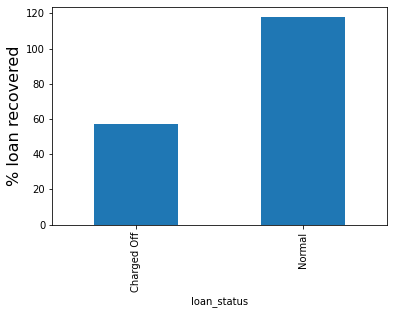

In [2532]:
grouped_by_total_payment = df.groupby('loan_status').total_pymnt.sum()
grouped_by_loan_amount =  df.groupby('loan_status').loan_amnt.sum()
profit_loss_rec = ((grouped_by_total_payment/grouped_by_loan_amount)*100).round(2)
ax = profit_loss_rec.plot(kind="bar")
ax.set_ylabel('% loan recovered', fontsize=16)

In [2533]:
profit_loss_rec

loan_status
Charged Off     56.92
Normal         117.68
dtype: float64

## So from above charts , only 57% of loans are recovered and out of fully recovered loans 17% is the profit from above plot

In [2534]:
#So Max offender % bisuness can afford with out loss
print(profit_loss_rec) 
maxOffenderPerBusinessCanAfford = offenderPercentage + (offenderPercentage * (profit_loss_rec[1] - 100)/100)
maxOffenderPerBusinessCanAfford = maxOffenderPerBusinessCanAfford.round(2)
print("Max offenders business can afford {0}".format(maxOffenderPerBusinessCanAfford))

loan_status
Charged Off     56.92
Normal         117.68
dtype: float64
Max offenders business can afford 16.49


#### From Above its clear that business can afford 16.49% of offernders any variable which increases % of offenders would lead to loss of business

In [2535]:
df.offender.describe()

count    39641.000000
mean         0.140133
std          0.347129
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: offender, dtype: float64

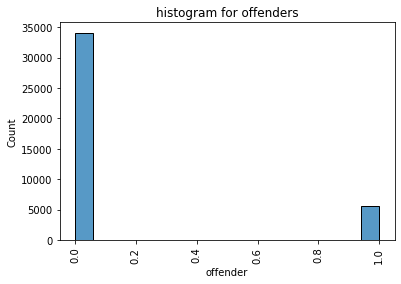

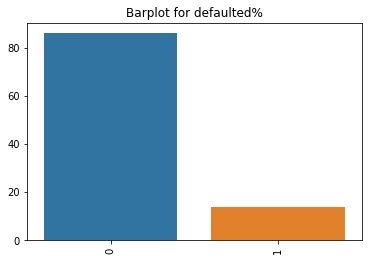

In [2536]:

sns.histplot(df.offender) #hue -> TODO
plt.title("histogram for offenders")
plt.xticks(rotation=90)
plt.show()

OffenderPercentage=df[df.offender == True].offender.count()/df.offender.count()*100
NonOfferderPercentage=df[df.offender == False].offender.count()/df.offender.count()*100

sns.barplot(y = [OffenderPercentage,NonOfferderPercentage],orient="v",x=[1,0])
plt.title("Barplot for defaulted%")
plt.xticks(rotation=90)
plt.show()


######################################################################################### 
Name of col annual_inc


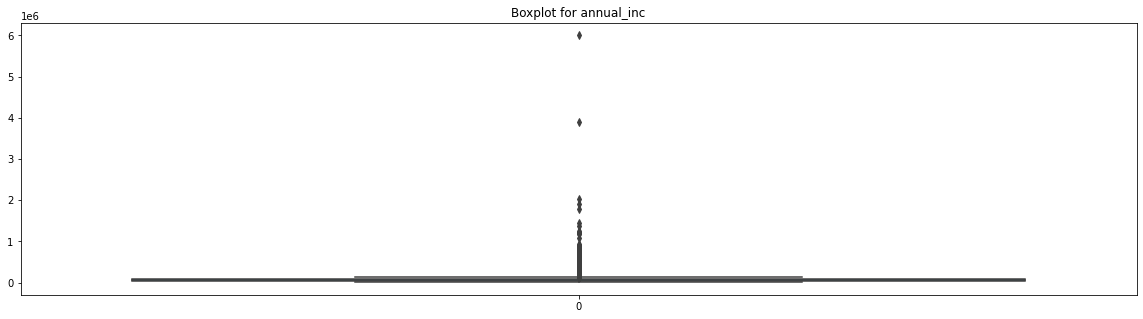

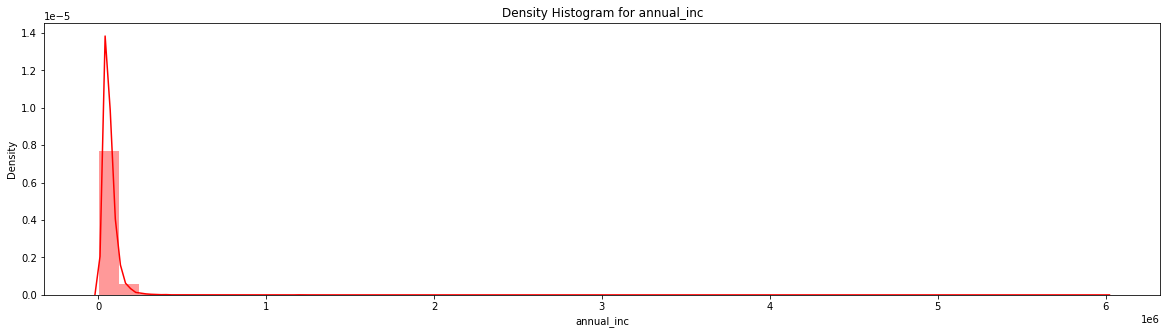

count    3.964100e+04
mean     6.900744e+04
std      6.383609e+04
min      4.000000e+03
25%      4.050000e+04
50%      5.900000e+04
75%      8.240000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


Now drop outliers from the col series and check the plots




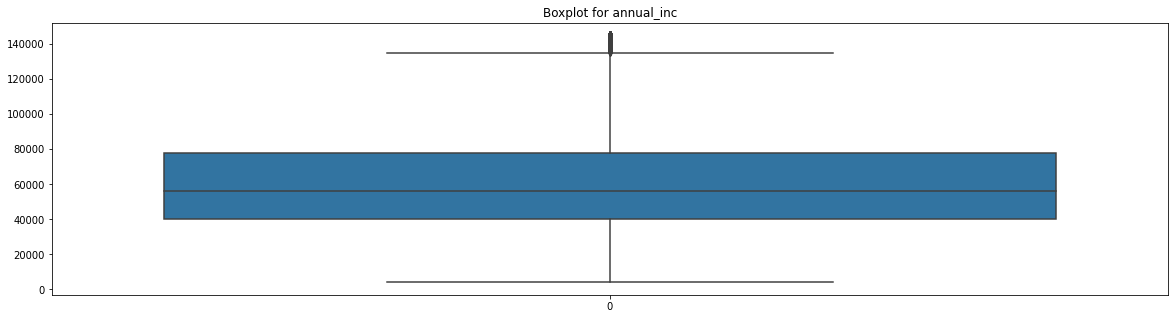

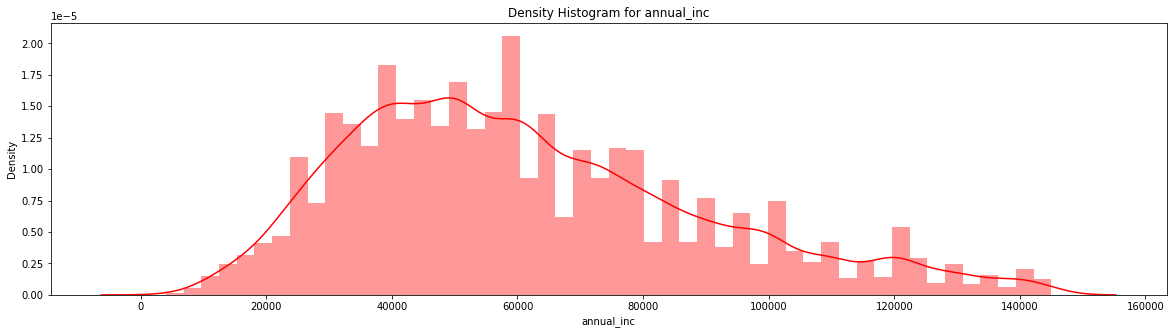

count     37798.000000
mean      61385.128805
std       28202.763649
min        4000.000000
25%       40000.000000
50%       56400.000000
75%       78000.000000
max      145008.000000
Name: annual_inc, dtype: float64
######################################################################################### 
######################################################################################### 
Name of col loan_amnt


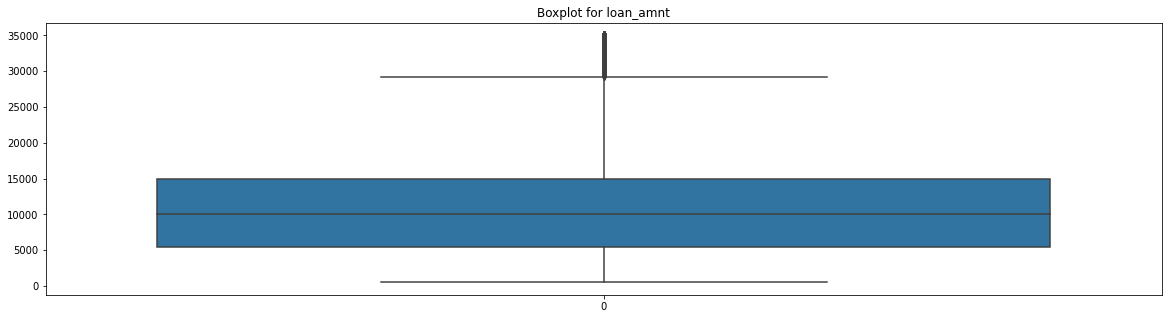

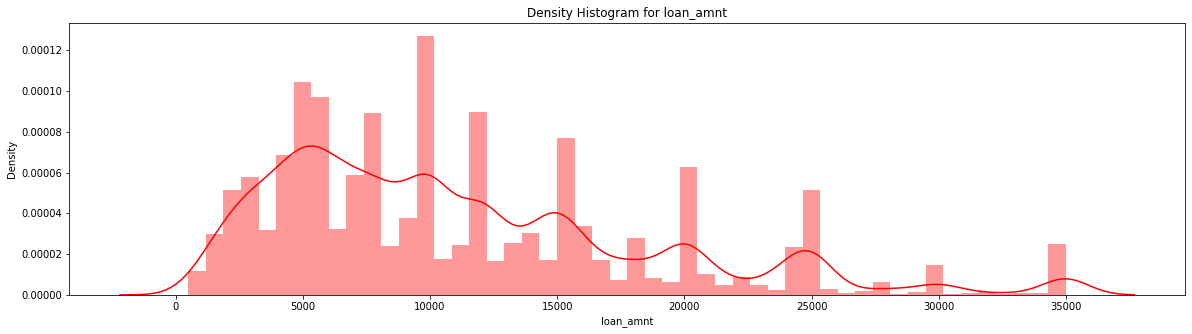

count    39641.000000
mean     11225.498852
std       7455.269125
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


Now drop outliers from the col series and check the plots




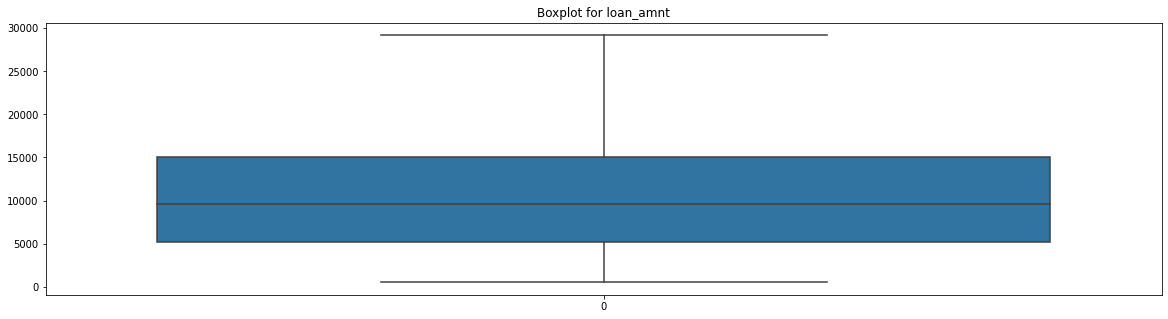

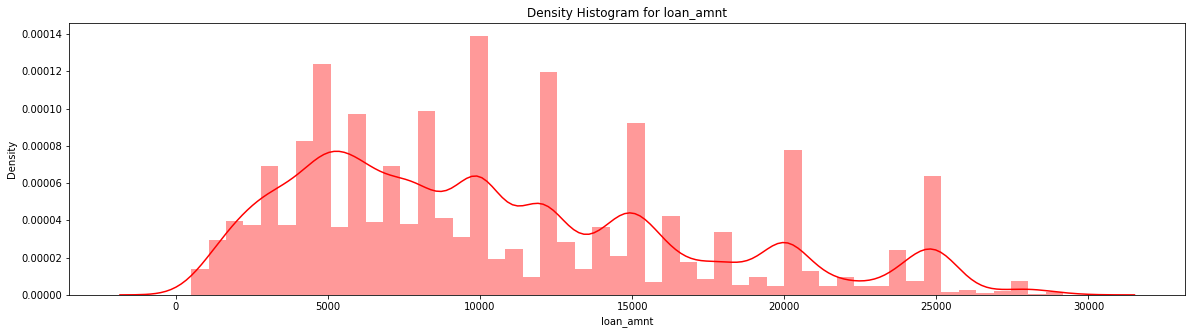

count    38413.000000
mean     10527.762737
std       6439.659873
min        500.000000
25%       5175.000000
50%       9600.000000
75%      15000.000000
max      29175.000000
Name: loan_amnt, dtype: float64
######################################################################################### 
######################################################################################### 
Name of col installment


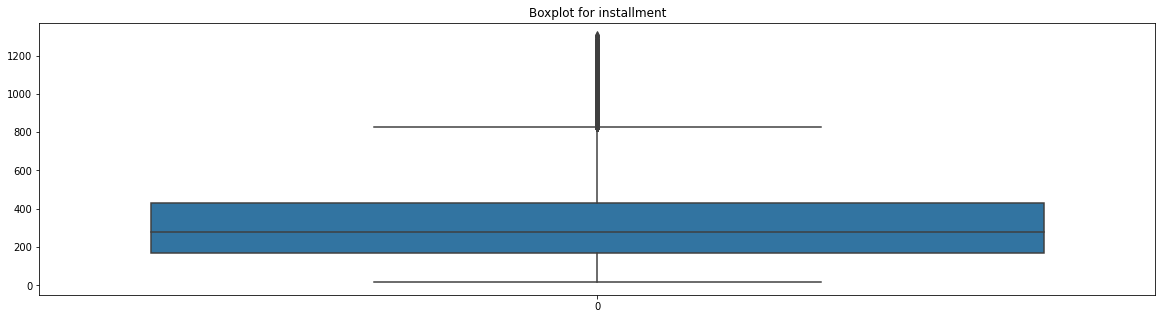

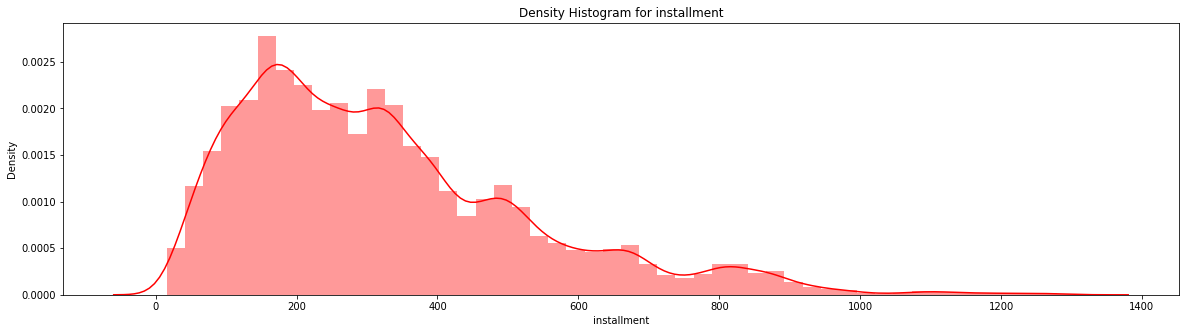

count    39641.000000
mean       324.710421
std        208.821132
min         15.690000
25%        167.080000
50%        280.530000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64


Now drop outliers from the col series and check the plots




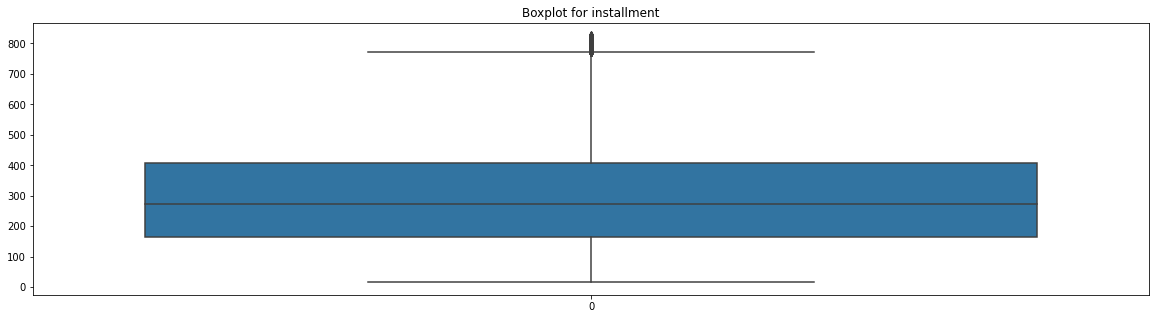

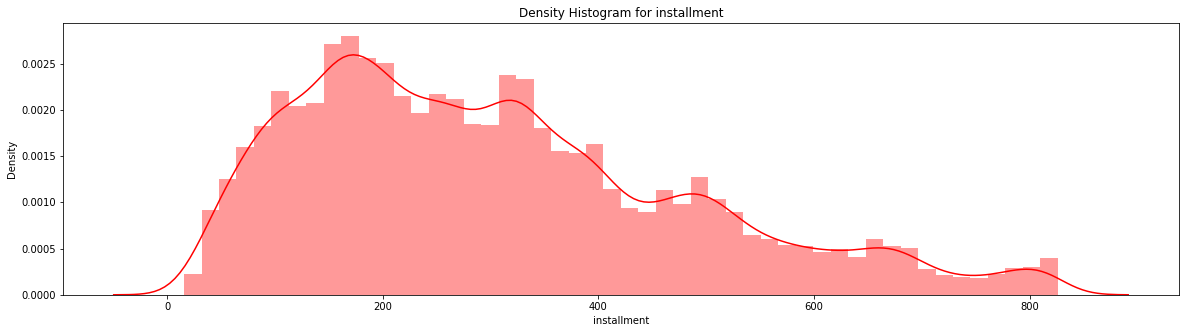

count    38398.000000
mean       305.041967
std        179.654936
min         15.690000
25%        164.510000
50%        273.000000
75%        407.170000
max        826.310000
Name: installment, dtype: float64
######################################################################################### 
######################################################################################### 
Name of col int_rate


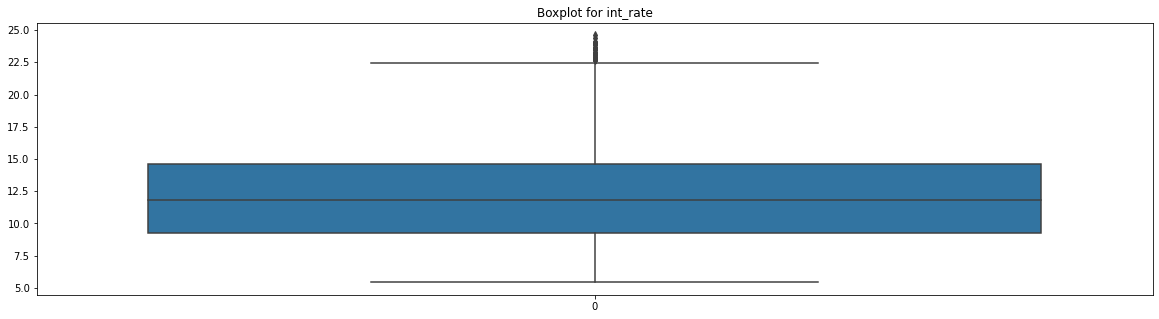

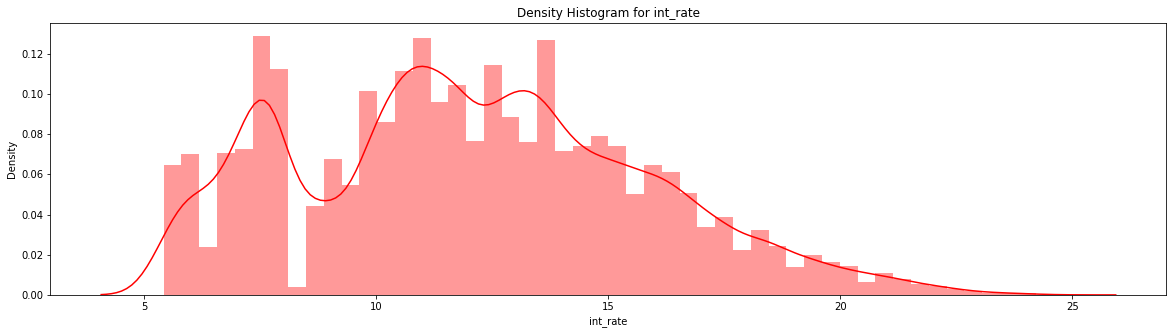

count    39641.000000
mean        12.017970
std          3.724742
min          5.420000
25%          9.250000
50%         11.830000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64


Now drop outliers from the col series and check the plots




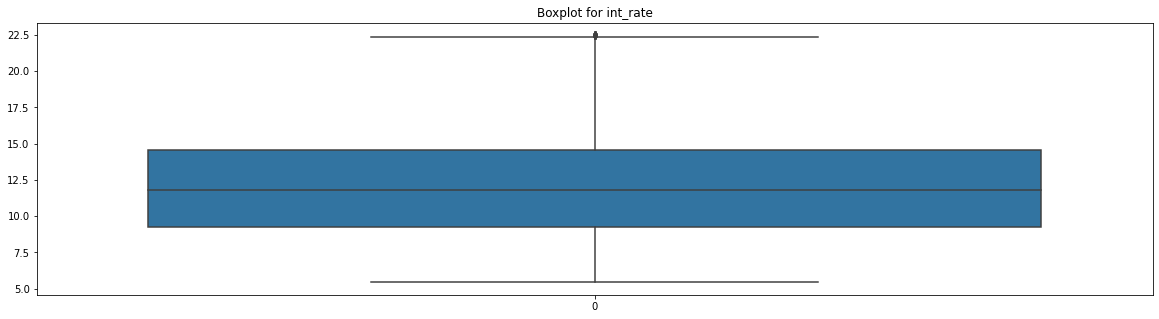

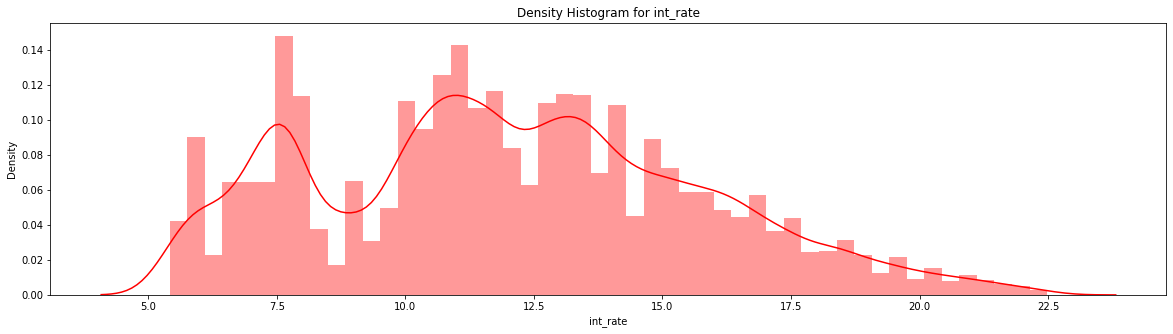

count    39563.000000
mean        11.995822
std          3.694765
min          5.420000
25%          9.250000
50%         11.830000
75%         14.540000
max         22.480000
Name: int_rate, dtype: float64
######################################################################################### 
######################################################################################### 
Name of col emp_length


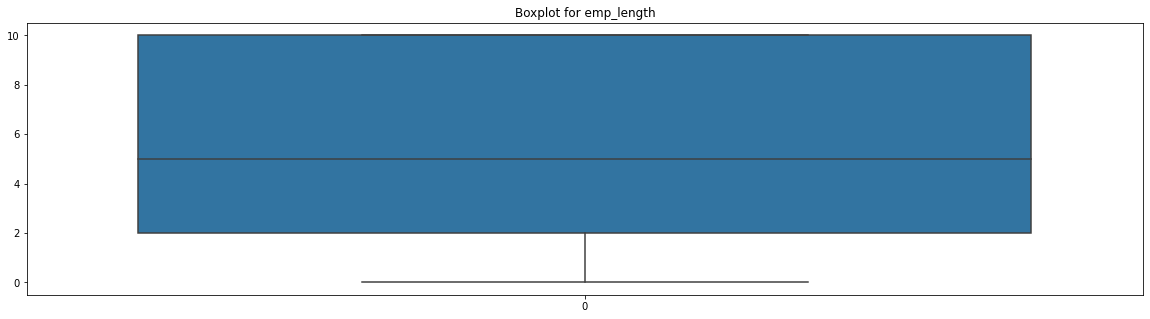

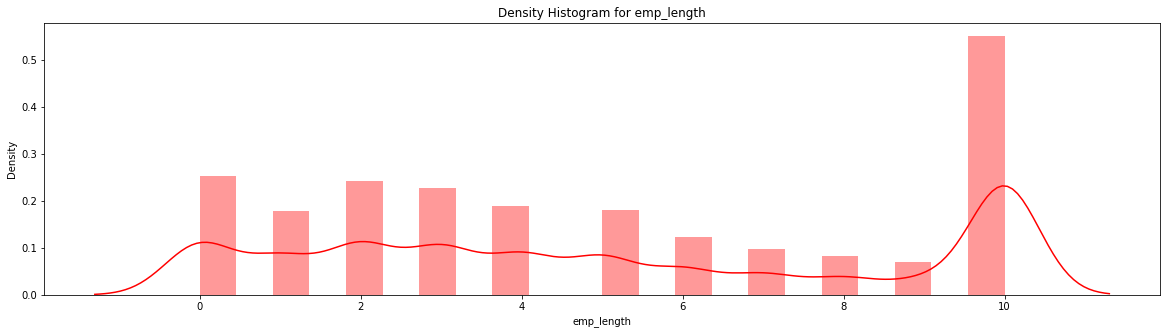

count    39641.000000
mean         5.110845
std          3.607492
min          0.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         10.000000
Name: emp_length, dtype: float64


Now drop outliers from the col series and check the plots




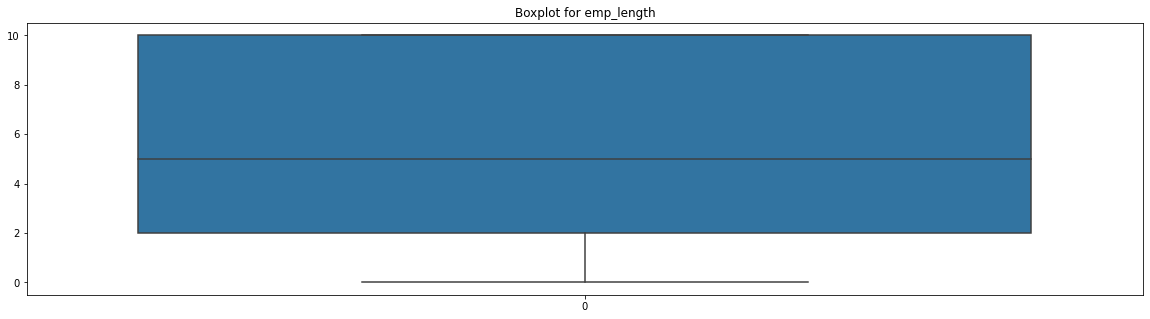

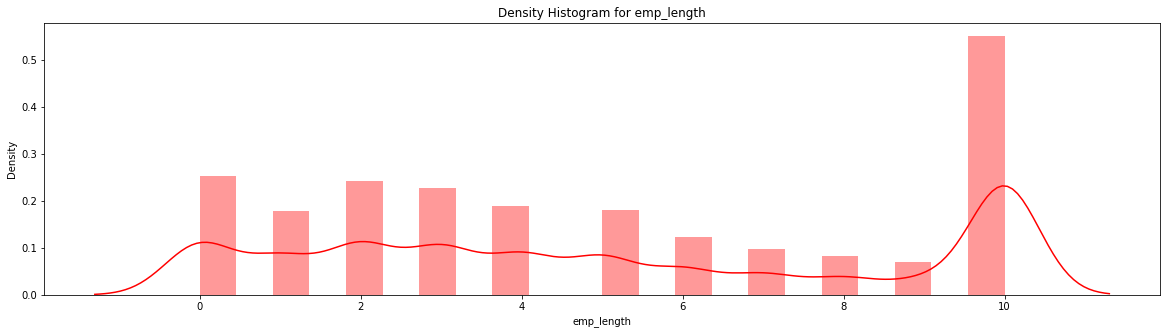

count    39641.000000
mean         5.110845
std          3.607492
min          0.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         10.000000
Name: emp_length, dtype: float64
######################################################################################### 
######################################################################################### 
Name of col dti


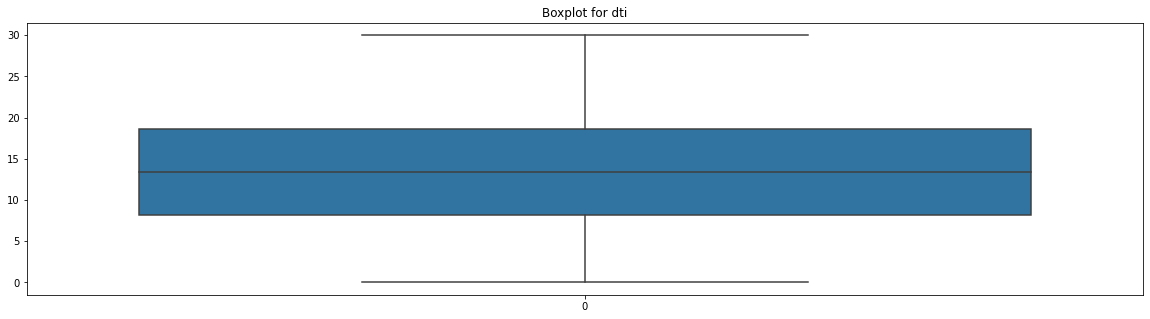

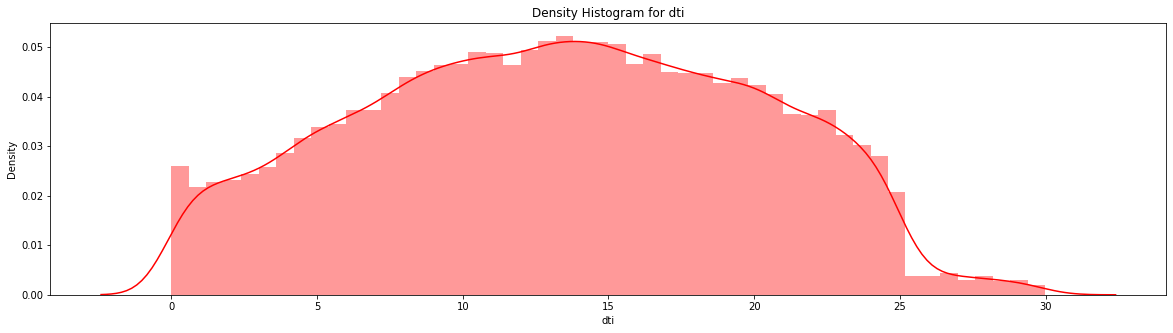

count    39641.000000
mean        13.317871
std          6.677430
min          0.000000
25%          8.180000
50%         13.410000
75%         18.600000
max         29.990000
Name: dti, dtype: float64


Now drop outliers from the col series and check the plots




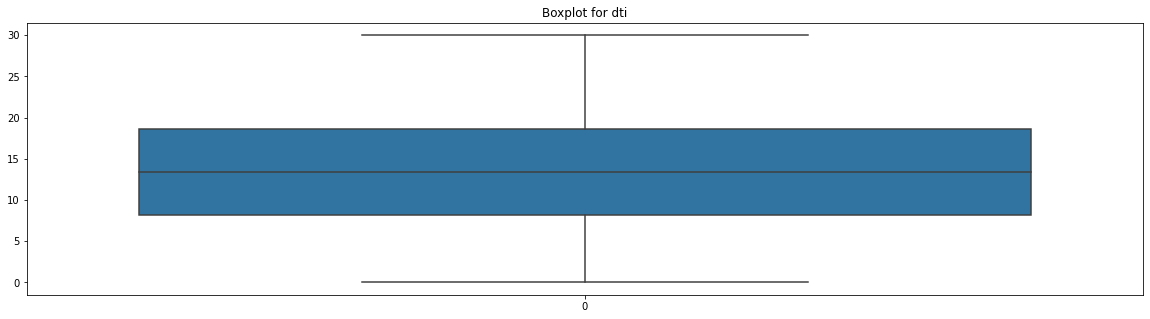

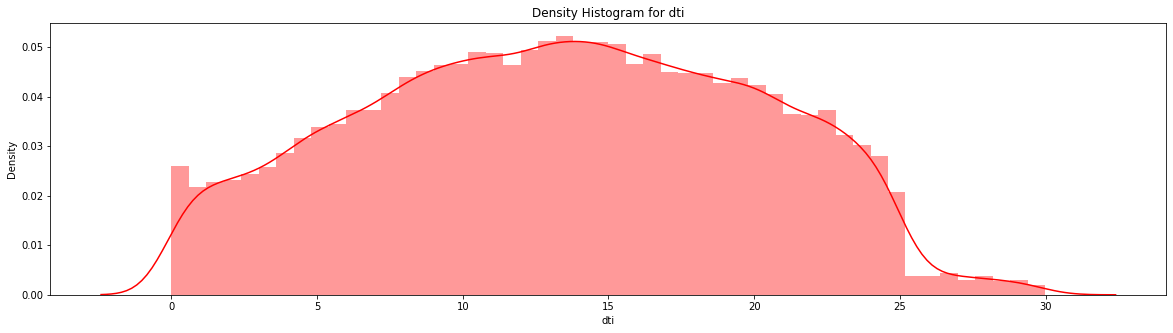

count    39641.000000
mean        13.317871
std          6.677430
min          0.000000
25%          8.180000
50%         13.410000
75%         18.600000
max         29.990000
Name: dti, dtype: float64
######################################################################################### 
######################################################################################### 
Name of col inq_last_6mths


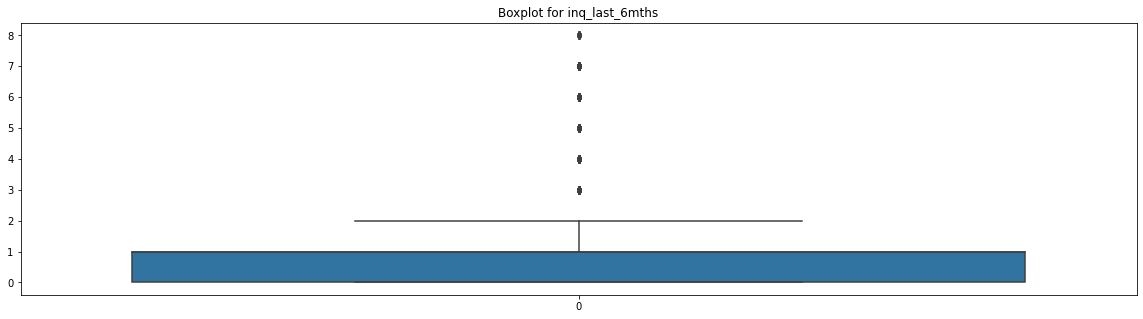

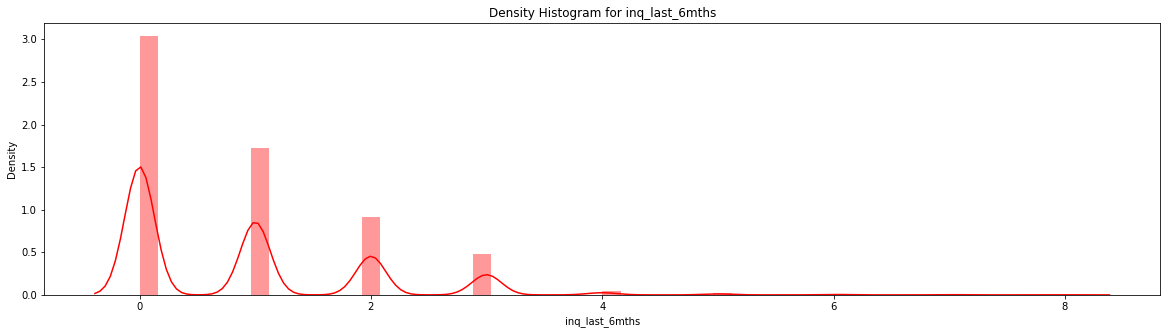

count    39641.000000
mean         0.868470
std          1.069792
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64


Now drop outliers from the col series and check the plots




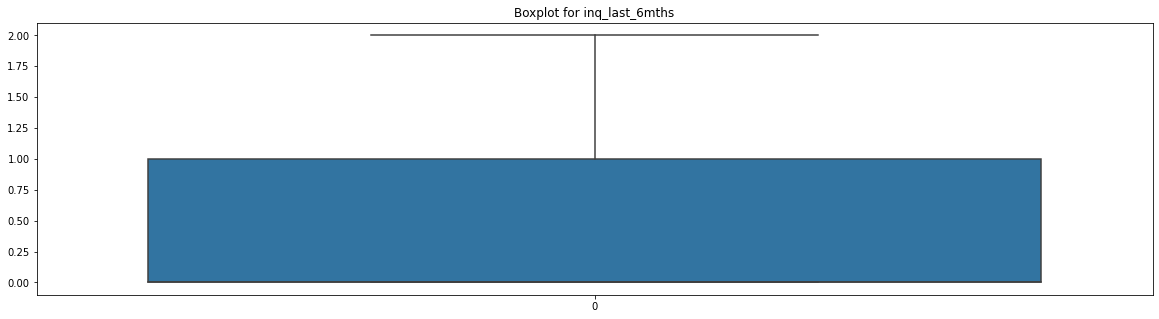

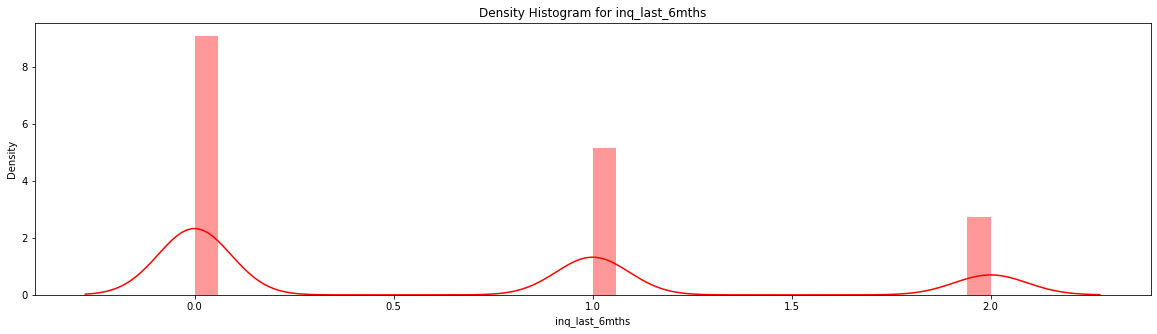

count    36024.000000
mean         0.626055
std          0.745781
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: inq_last_6mths, dtype: float64
######################################################################################### 
######################################################################################### 
Name of col mths_since_last_delinq


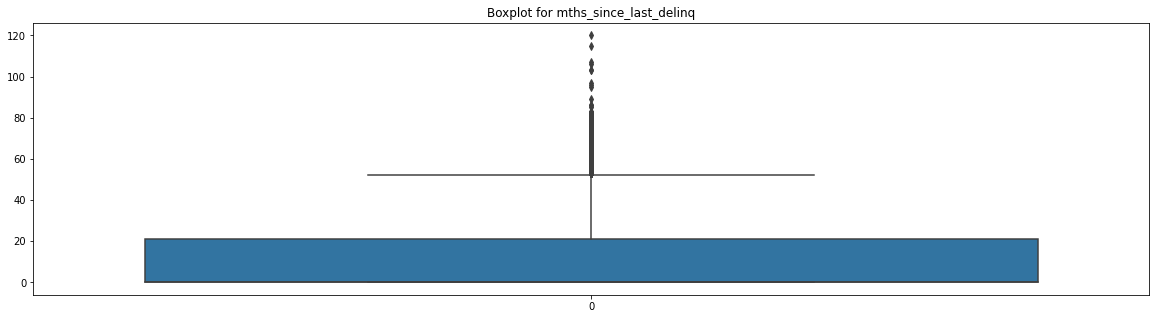

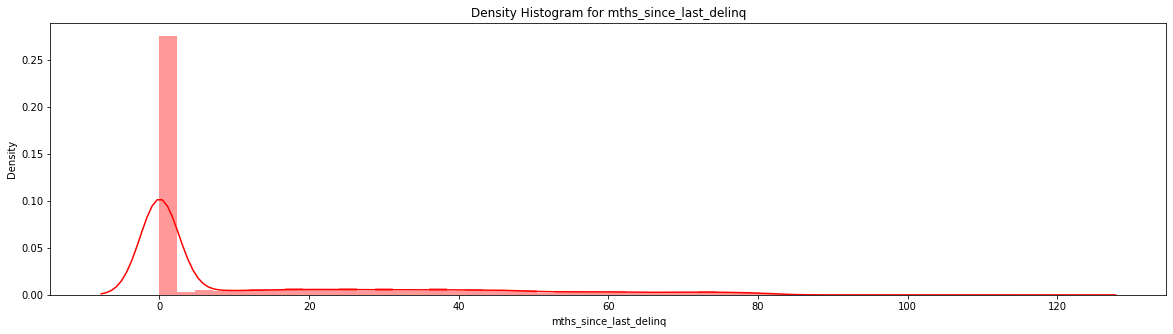

count    39641.000000
mean        12.691330
std         21.589147
min          0.000000
25%          0.000000
50%          0.000000
75%         21.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64


Now drop outliers from the col series and check the plots




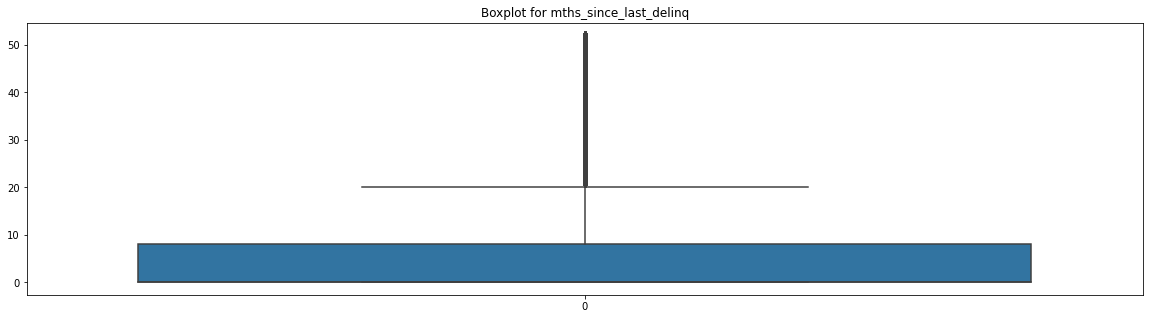

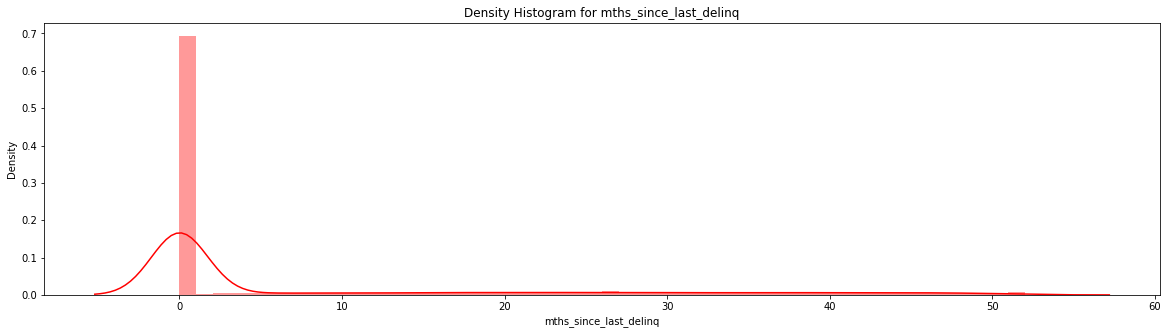

count    36212.000000
mean         7.580167
std         14.176250
min          0.000000
25%          0.000000
50%          0.000000
75%          8.000000
max         52.000000
Name: mths_since_last_delinq, dtype: float64
######################################################################################### 
######################################################################################### 
Name of col open_acc


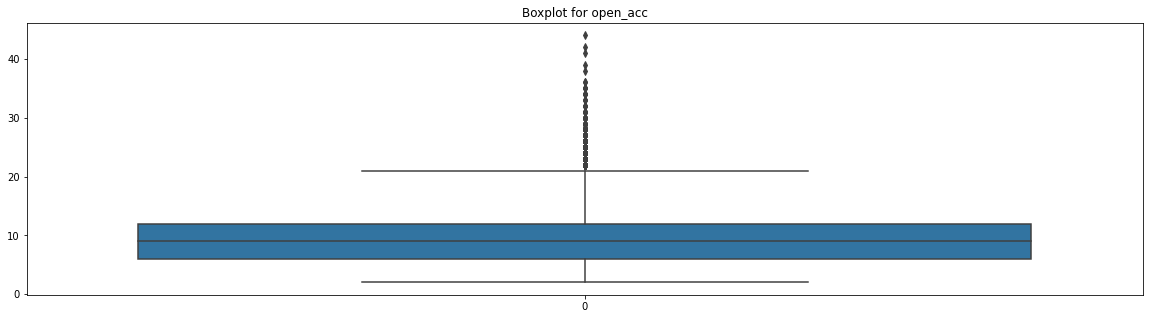

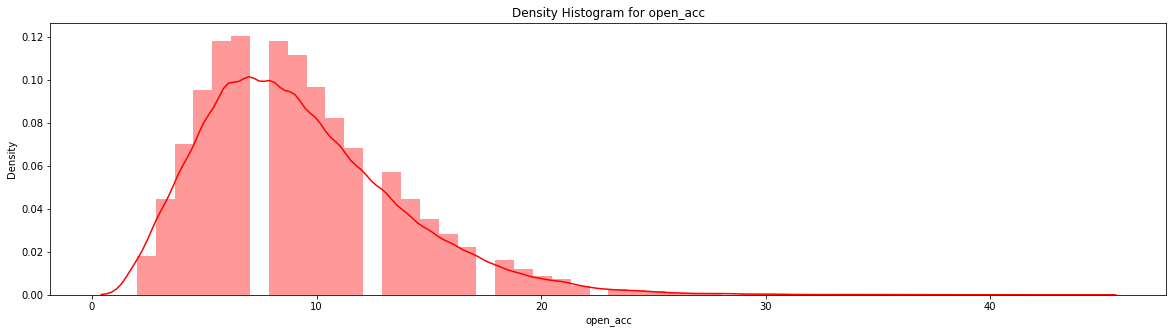

count    39641.000000
mean         9.298504
std          4.400626
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64


Now drop outliers from the col series and check the plots




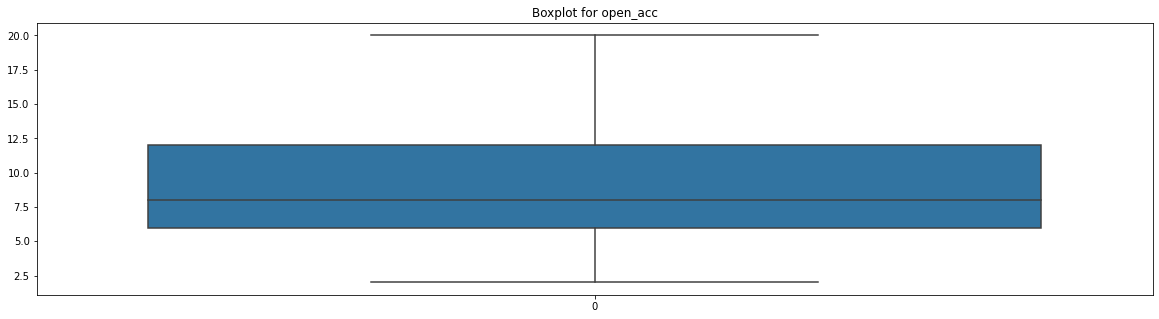

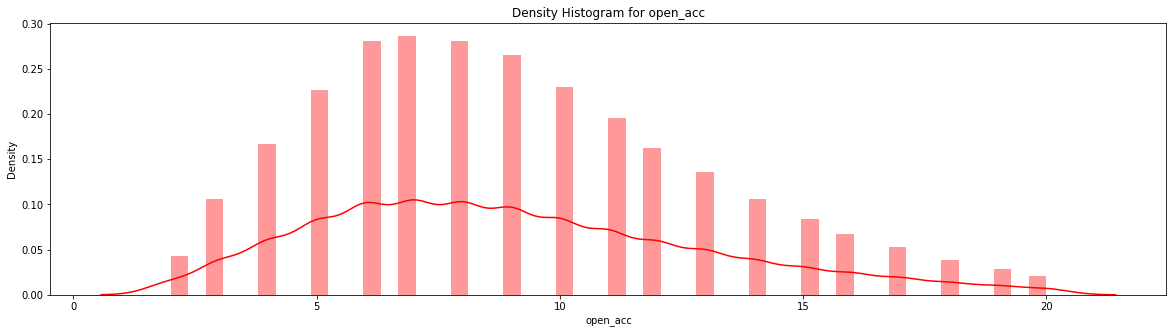

count    38883.000000
mean         9.021166
std          3.939213
min          2.000000
25%          6.000000
50%          8.000000
75%         12.000000
max         20.000000
Name: open_acc, dtype: float64
######################################################################################### 
######################################################################################### 
Name of col revol_bal


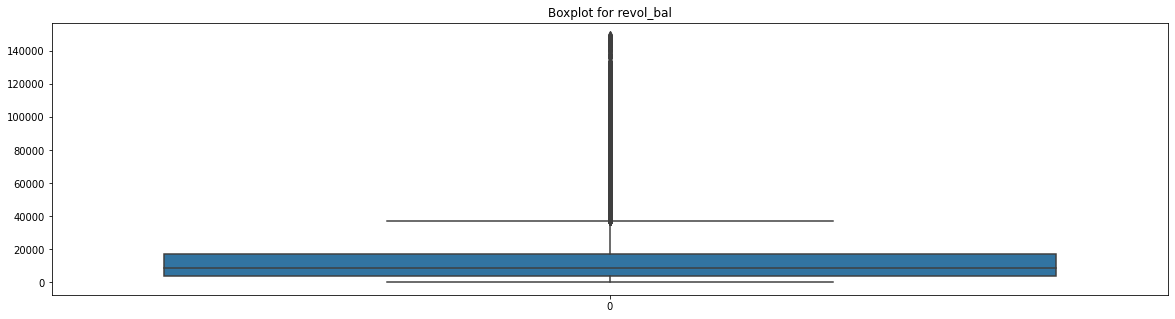

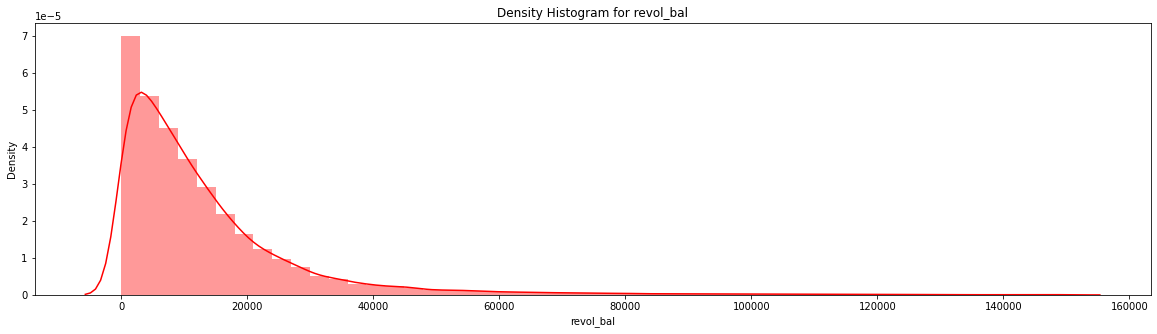

count     39641.000000
mean      13395.457758
std       15893.510254
min           0.000000
25%        3710.000000
50%        8860.000000
75%       17072.000000
max      149588.000000
Name: revol_bal, dtype: float64


Now drop outliers from the col series and check the plots




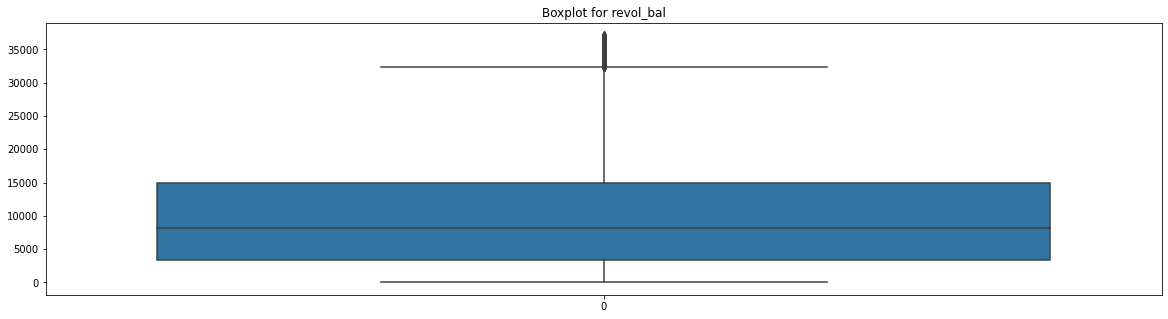

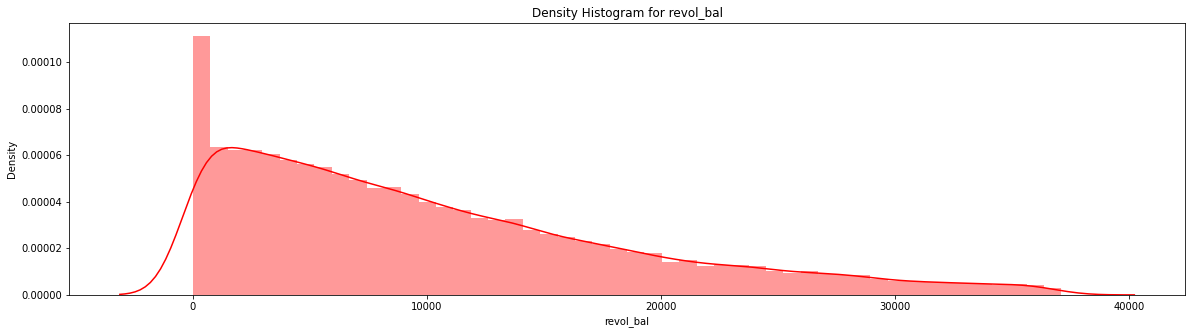

count    37148.000000
mean     10237.928852
std       8526.850290
min          0.000000
25%       3415.000000
50%       8132.000000
75%      14992.000000
max      37101.000000
Name: revol_bal, dtype: float64
######################################################################################### 
######################################################################################### 
Name of col total_acc


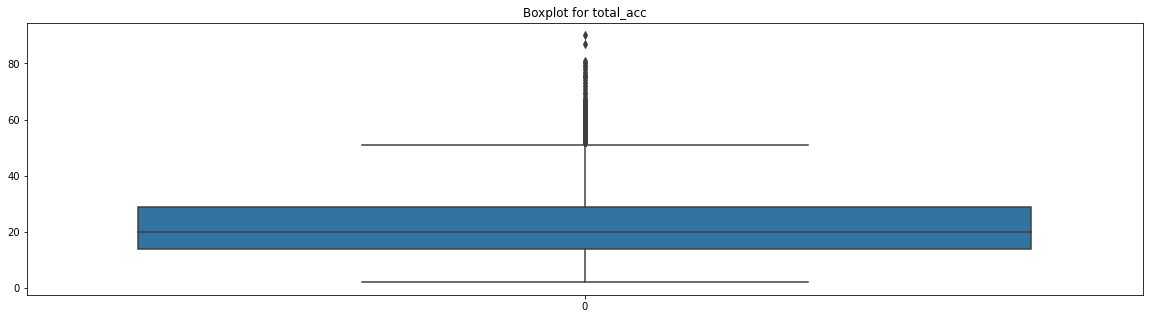

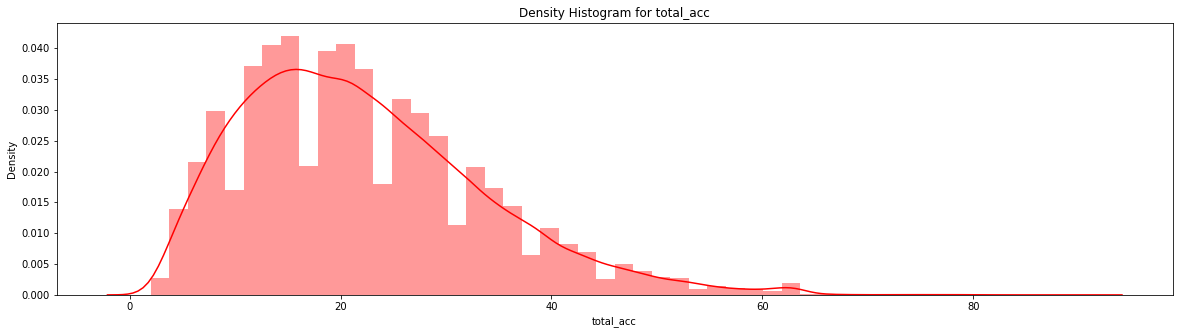

count    39641.000000
mean        22.100981
std         11.400897
min          2.000000
25%         14.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64


Now drop outliers from the col series and check the plots




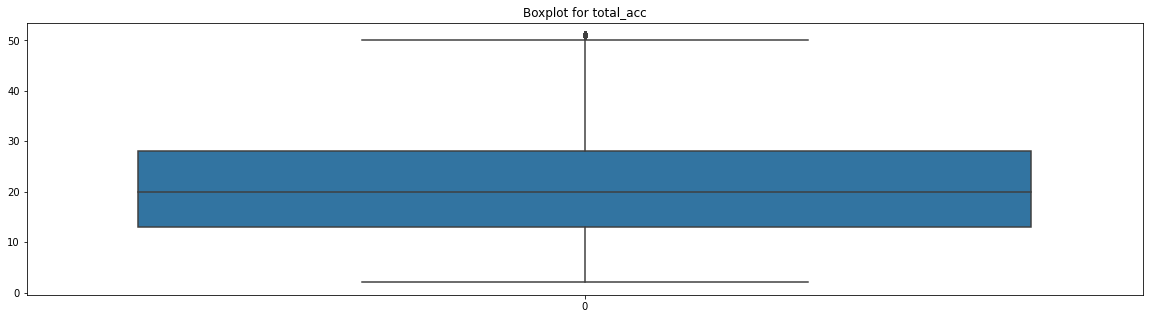

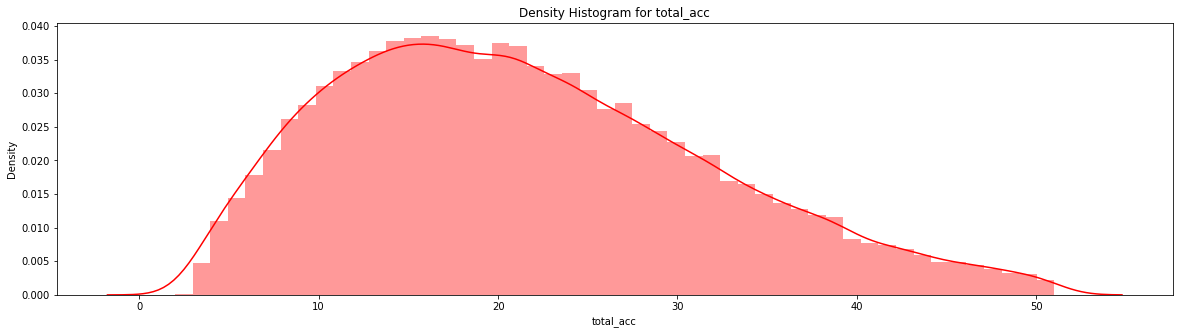

count    38929.000000
mean        21.452156
std         10.413182
min          2.000000
25%         13.000000
50%         20.000000
75%         28.000000
max         51.000000
Name: total_acc, dtype: float64
######################################################################################### 
######################################################################################### 
Name of col total_pymnt


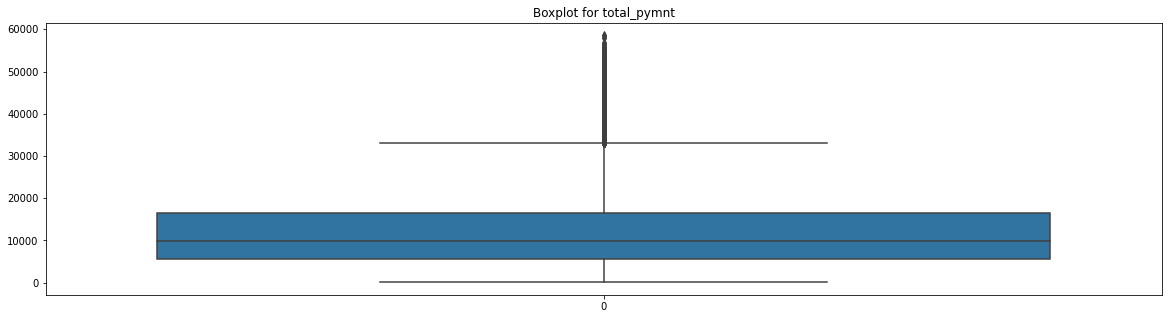

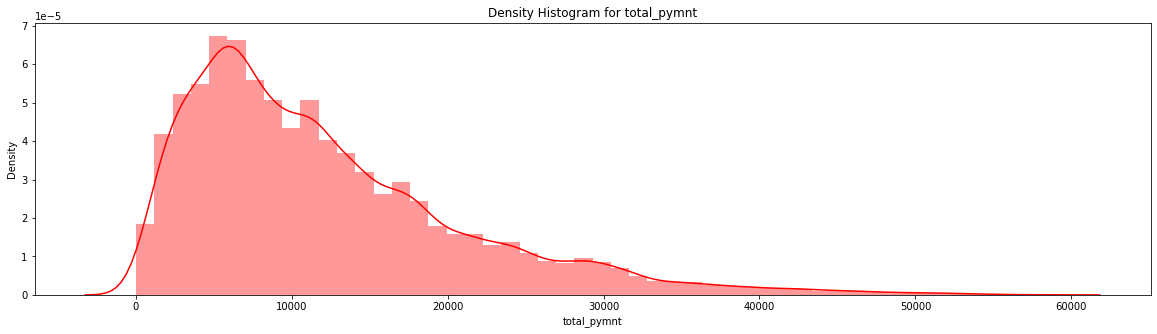

count    39641.000000
mean     12175.197630
std       9036.764922
min         33.730000
25%       5594.008440
50%       9928.752197
75%      16553.741870
max      58563.679930
Name: total_pymnt, dtype: float64


Now drop outliers from the col series and check the plots




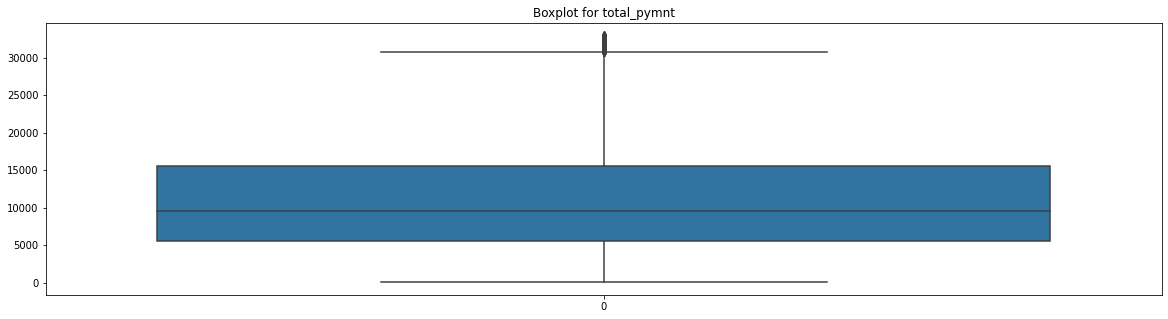

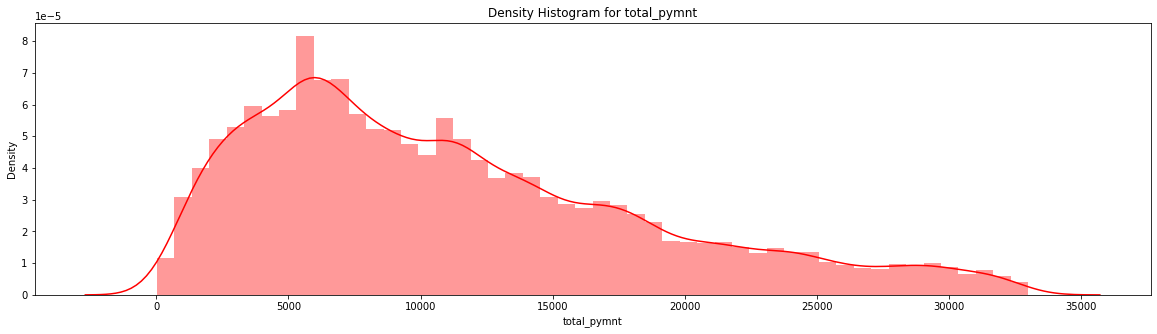

count    38311.000000
mean     11211.581499
std       7468.691101
min         33.730000
25%       5496.713512
50%       9536.300000
75%      15612.720250
max      32981.380000
Name: total_pymnt, dtype: float64
######################################################################################### 
######################################################################################### 
Name of col total_pymnt_inv


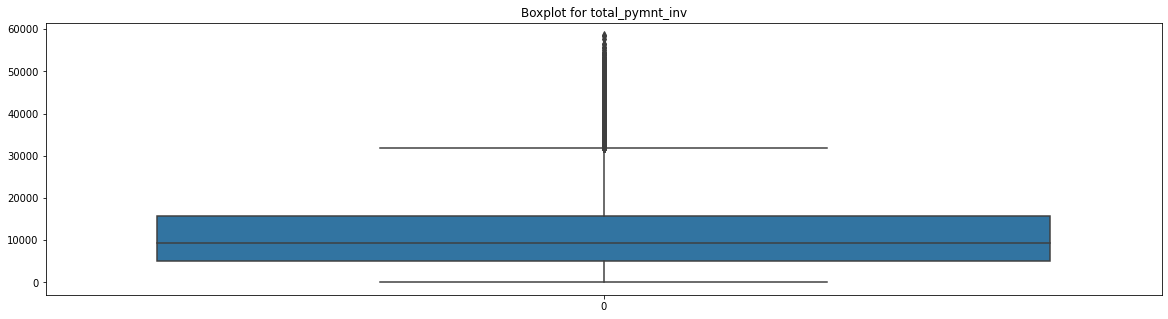

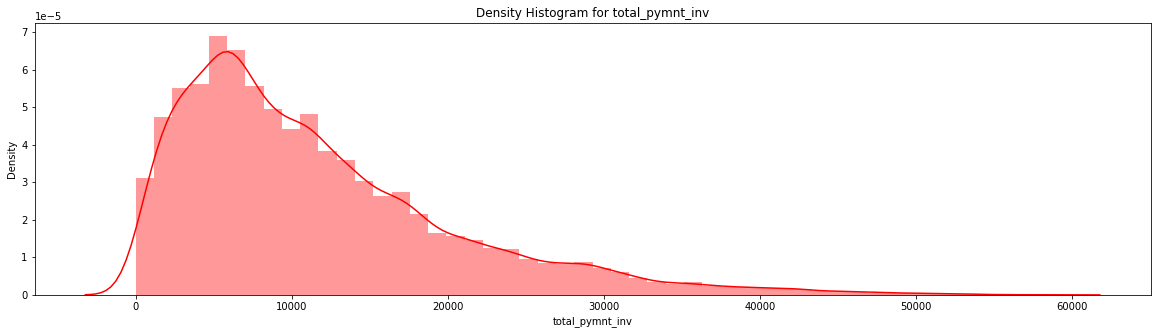

count    39641.000000
mean     11588.084286
std       8938.174184
min          0.000000
25%       5138.680000
50%       9307.780000
75%      15815.910000
max      58563.680000
Name: total_pymnt_inv, dtype: float64


Now drop outliers from the col series and check the plots




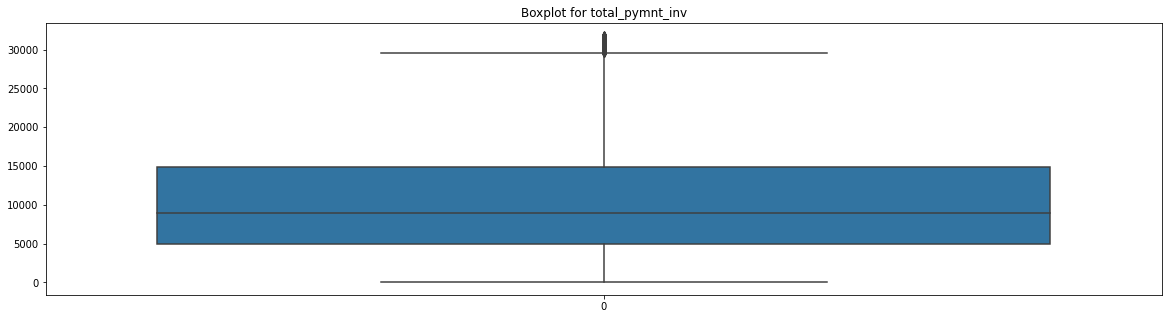

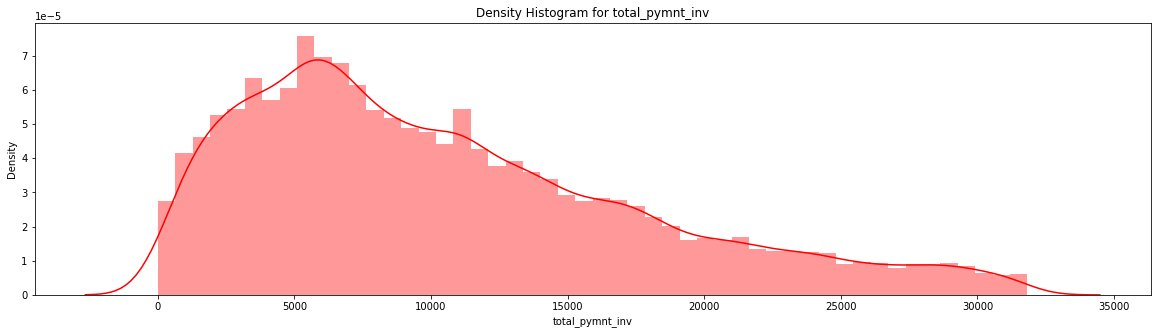

count    38200.000000
mean     10569.071424
std       7295.106964
min          0.000000
25%       4989.305000
50%       8925.395000
75%      14830.130000
max      31827.920000
Name: total_pymnt_inv, dtype: float64
######################################################################################### 
######################################################################################### 
Name of col total_rec_prncp


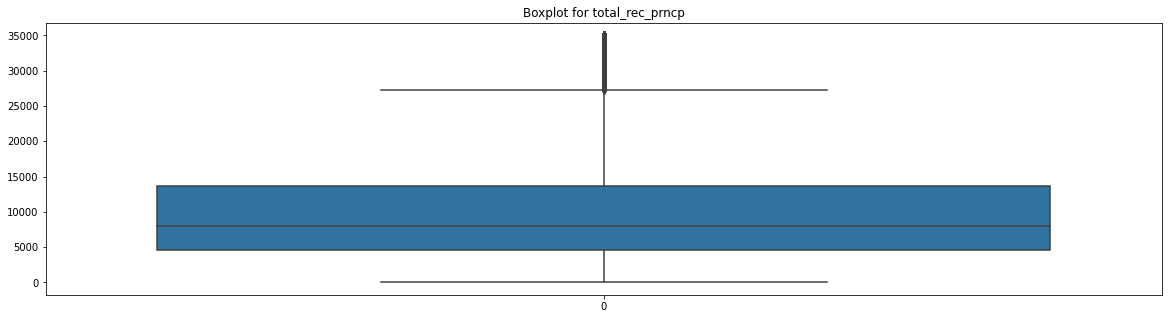

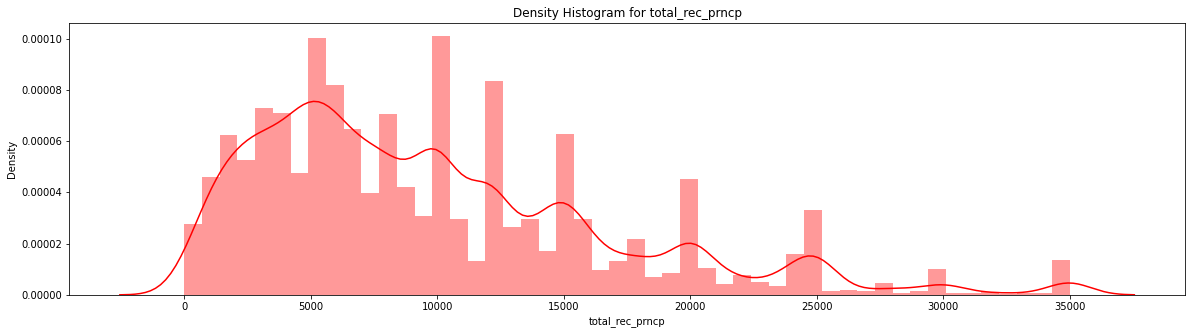

count    39641.000000
mean      9811.611243
std       7059.733824
min          0.000000
25%       4648.890000
50%       8000.000000
75%      13703.960000
max      35000.020000
Name: total_rec_prncp, dtype: float64


Now drop outliers from the col series and check the plots




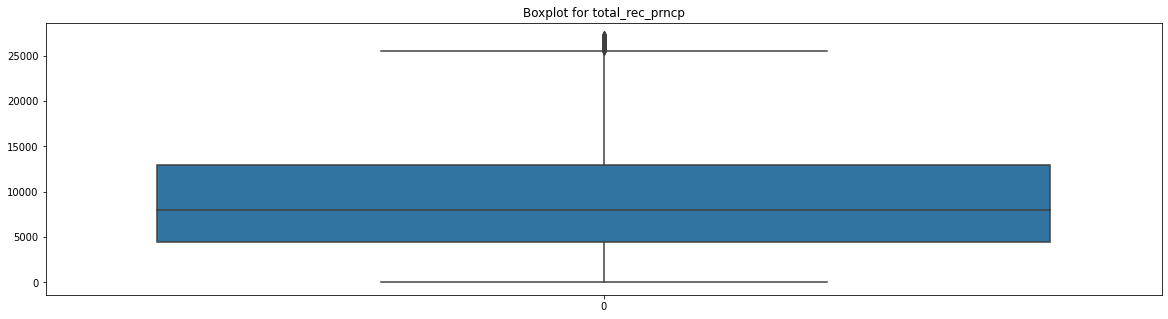

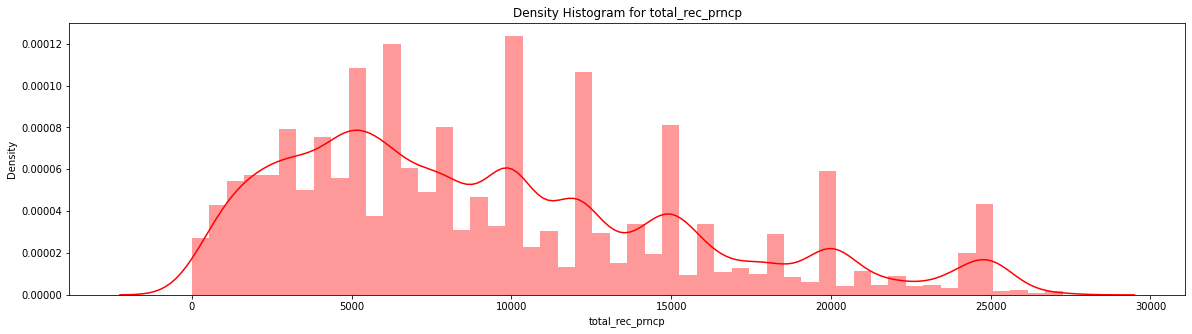

count    38672.000000
mean      9259.401108
std       6198.230760
min          0.000000
25%       4500.000000
50%       8000.000000
75%      12925.397500
max      27250.000000
Name: total_rec_prncp, dtype: float64
######################################################################################### 
######################################################################################### 
Name of col total_rec_int


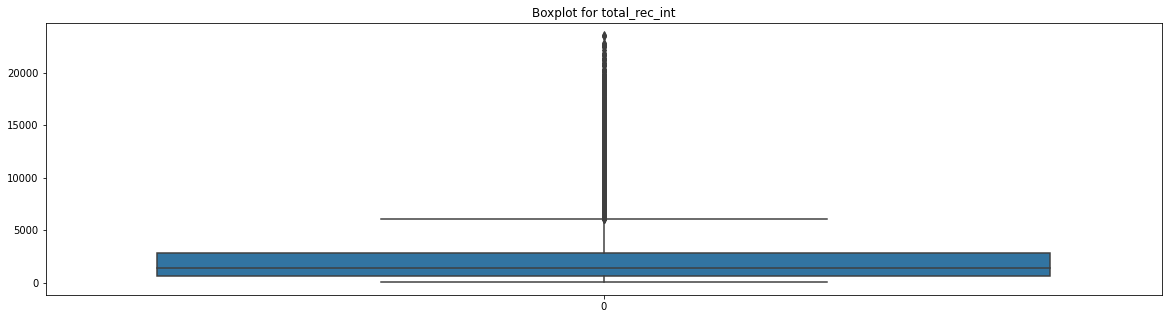

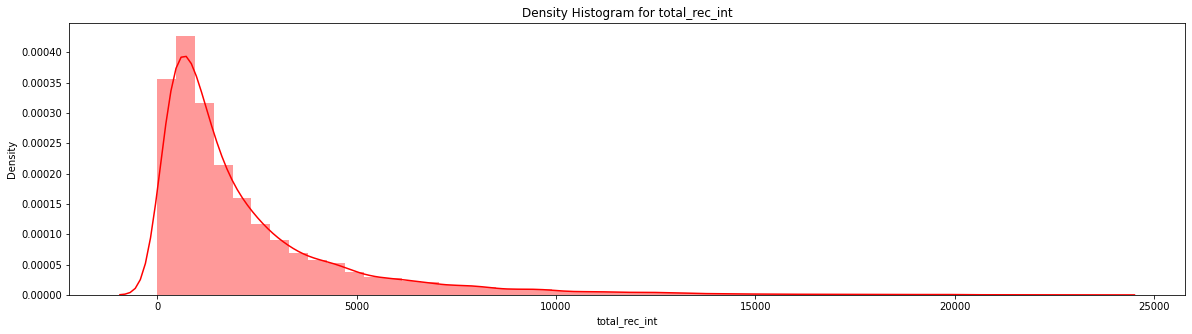

count    39641.000000
mean      2267.925724
std       2608.779836
min          6.220000
25%        665.160000
50%       1353.290000
75%       2838.130000
max      23563.680000
Name: total_rec_int, dtype: float64


Now drop outliers from the col series and check the plots




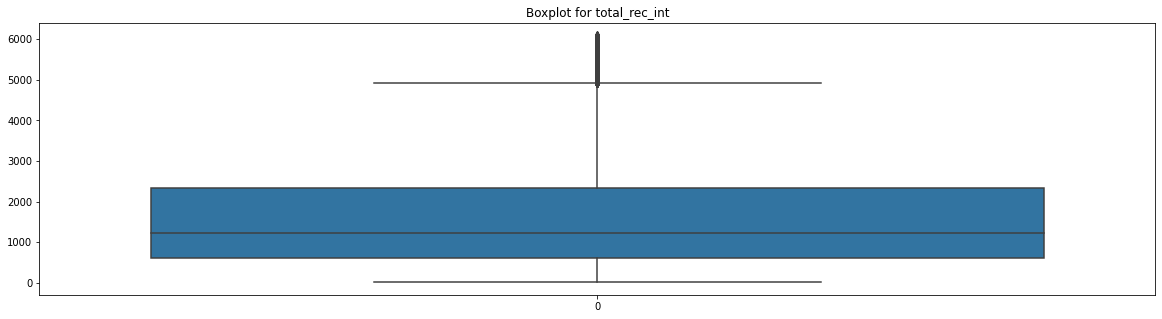

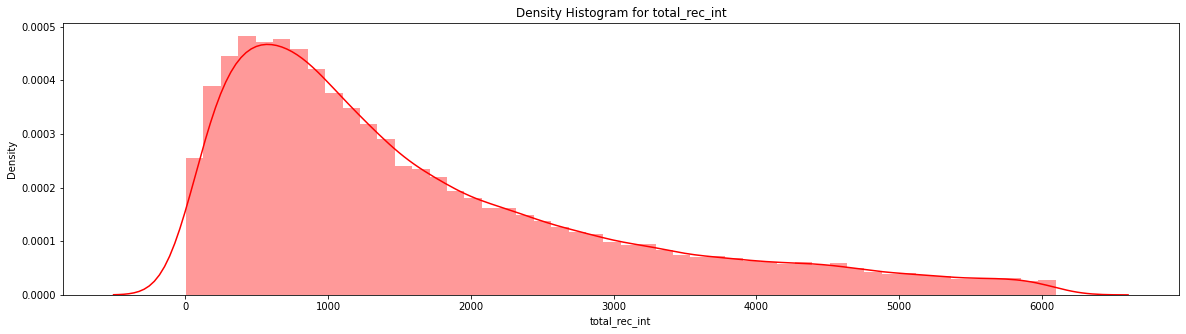

count    36487.000000
mean      1660.631051
std       1383.226722
min          6.220000
25%        617.710000
50%       1215.540000
75%       2336.215000
max       6095.860000
Name: total_rec_int, dtype: float64
######################################################################################### 


In [2537]:
file = open("Univariant_Analysis.txt", "w")

#Invoke the function for all col in num_variables:
for num in num_variables:
    print("######################################################################################### ")
    print(f"Name of col {num}")
    create_boxplot_and_distplot(num)
    
    print("\n\nNow drop outliers from the col series and check the plots\n\n")
    
    df_new,q1,q3 = drop_outliers_from_series(num)
    
    
    file.write(f"Borrowers {num.capitalize()} ranges between {q1} and {q3}\n")

    create_boxplot_and_distplot(num, df_new)
    print("######################################################################################### ")

file.close()

<p>&nbsp;</p>
<p><strong><span style="color: #0000ff;">/***************************** END UNI VARIANT ANALYSIS ********************************/</span></strong></p>

<p>&nbsp;</p>
<h2><span style="color: #0000ff;"><strong>Bivariant Analysis, without and with removal of outliers</strong></span></h2>

In [ ]:

# for num_col in num_variables:
#     chart_with_and_without_outliers(col_1, num_col, data=df):


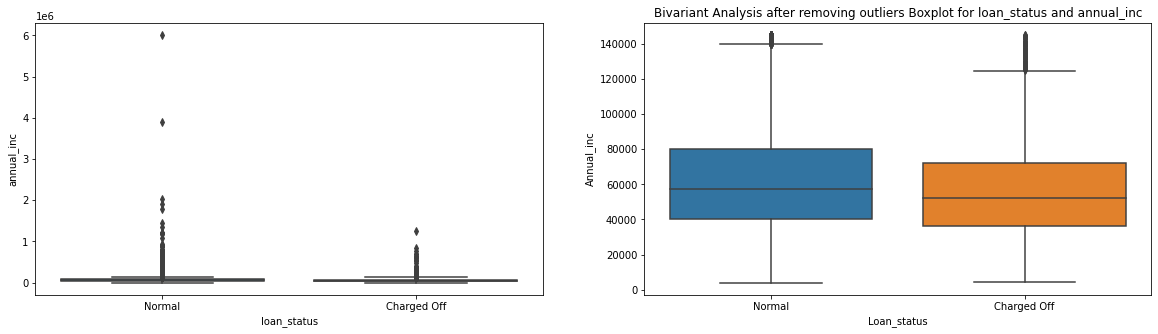

######################################################################################### 
Quantile details for Charged Off Borrower's has annual_inc ranging between Q1 = 36502.0 and Q3 = 72000.0

Quantile details for all Borrower's with annual_inc are Q1 = 40500.0 and Q3 = 82400.0



In [2538]:
file = open("Bivariant_Analysis.txt", "w")
file.close()

chart_with_and_without_outliers('loan_status', 'annual_inc')


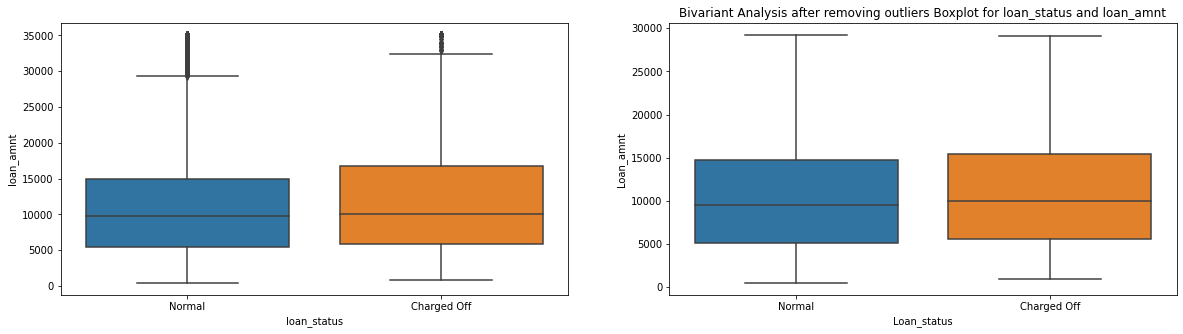

######################################################################################### 
Quantile details for Charged Off Borrower's has loan_amnt ranging between Q1 = 5500.0 and Q3 = 15400.0

Quantile details for all Borrower's with loan_amnt are Q1 = 5500.0 and Q3 = 15000.0



In [2539]:
# sns.boxplot(x='loan_status',y='loan_amnt',data=df)
# plt.show()
chart_with_and_without_outliers('loan_status', 'loan_amnt')


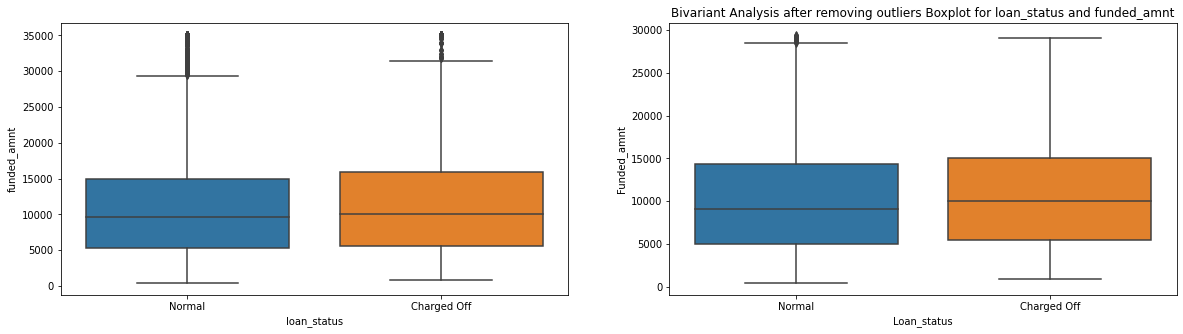

######################################################################################### 
Quantile details for Charged Off Borrower's has funded_amnt ranging between Q1 = 5425.0 and Q3 = 15000.0

Quantile details for all Borrower's with funded_amnt are Q1 = 5400.0 and Q3 = 15000.0



In [2540]:
# sns.boxplot(x='loan_status',y='funded_amnt',data=df)
# plt.show()
chart_with_and_without_outliers('loan_status', 'funded_amnt')



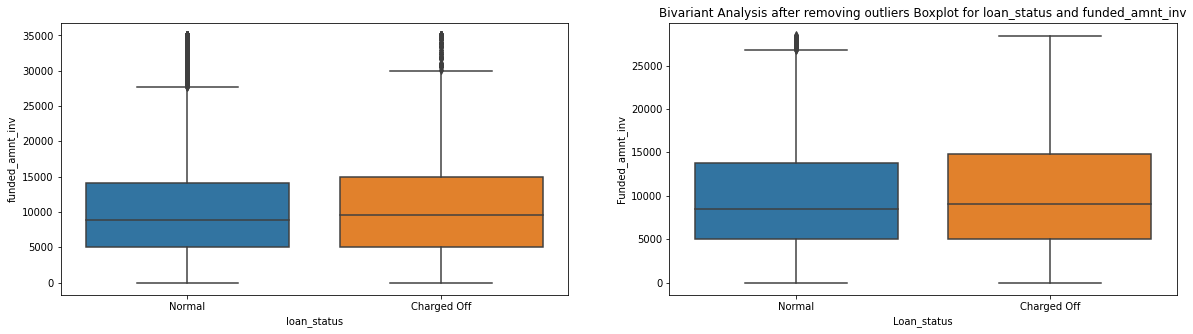

######################################################################################### 
Quantile details for Charged Off Borrower's has funded_amnt_inv ranging between Q1 = 4994.492297 and Q3 = 14839.3938

Quantile details for all Borrower's with funded_amnt_inv are Q1 = 5000.0 and Q3 = 14400.0



In [2541]:
chart_with_and_without_outliers('loan_status', 'funded_amnt_inv')



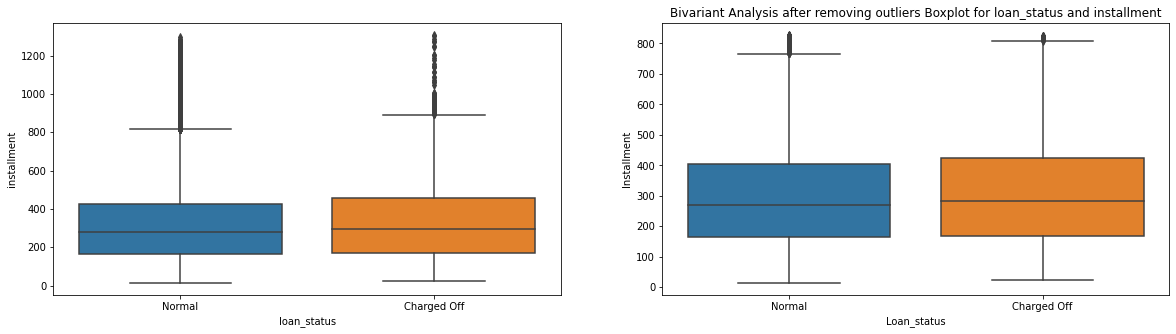

######################################################################################### 
Quantile details for Charged Off Borrower's has installment ranging between Q1 = 167.06 and Q3 = 423.78

Quantile details for all Borrower's with installment are Q1 = 167.08 and Q3 = 430.78



In [2542]:
chart_with_and_without_outliers('loan_status', 'installment')

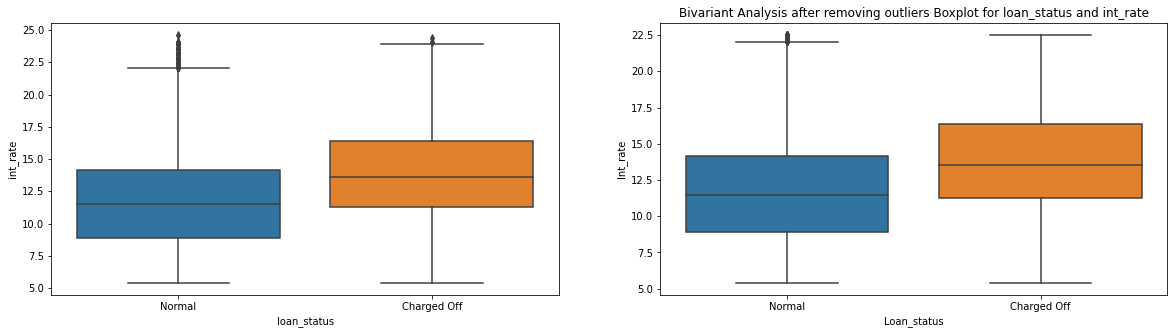

######################################################################################### 
Quantile details for Charged Off Borrower's has int_rate ranging between Q1 = 11.26 and Q3 = 16.4

Quantile details for all Borrower's with int_rate are Q1 = 9.25 and Q3 = 14.59



In [2543]:
chart_with_and_without_outliers('loan_status', 'int_rate')


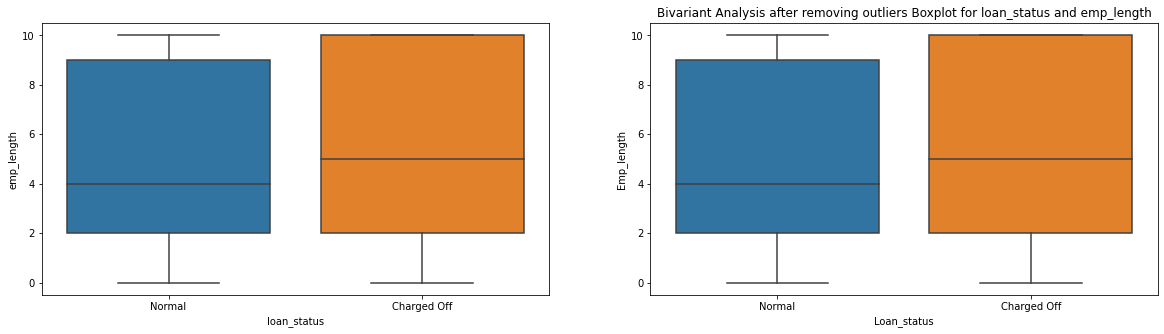

######################################################################################### 
Quantile details for Charged Off Borrower's has emp_length ranging between Q1 = 2.0 and Q3 = 10.0

Quantile details for all Borrower's with emp_length are Q1 = 2.0 and Q3 = 10.0



In [2544]:
chart_with_and_without_outliers('loan_status', 'emp_length')



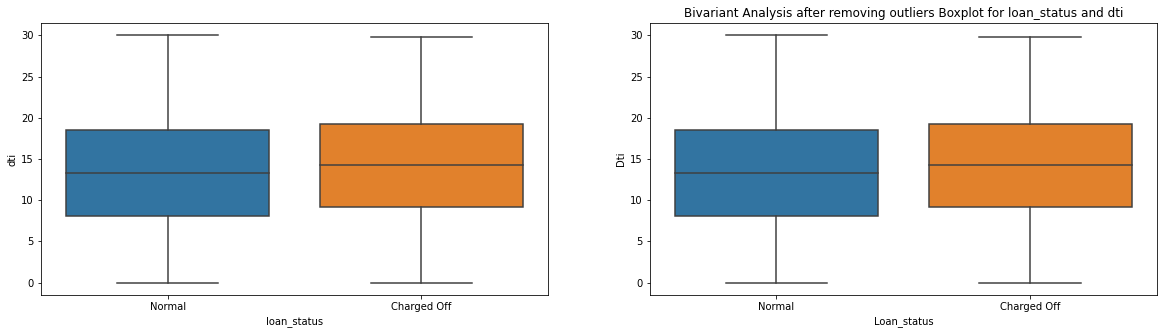

######################################################################################### 
Quantile details for Charged Off Borrower's has dti ranging between Q1 = 9.13 and Q3 = 19.295

Quantile details for all Borrower's with dti are Q1 = 8.18 and Q3 = 18.6



In [2545]:
chart_with_and_without_outliers('loan_status', 'dti')

mths_since_last_delinq
0.0      26074
15.0       252
30.0       247
23.0       246
24.0       241
         ...  
89.0         1
107.0        1
85.0         1
97.0         1
95.0         1
Name: count, Length: 95, dtype: int64


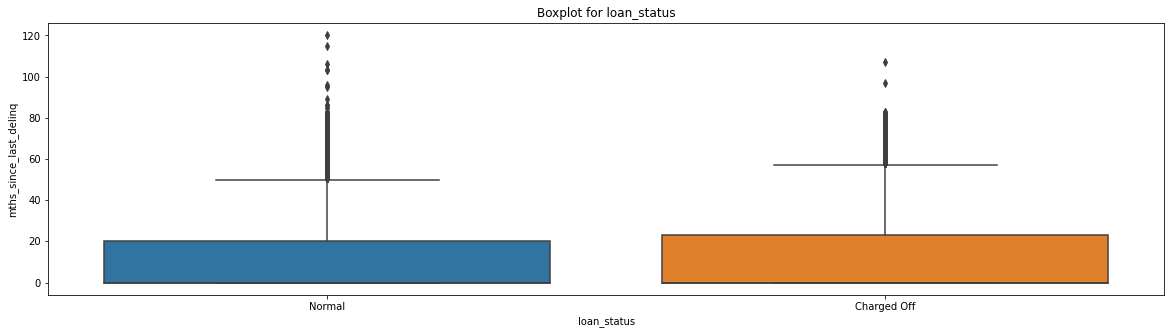

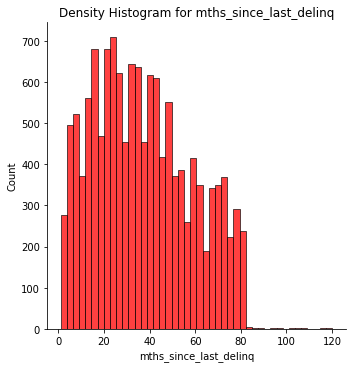

In [2546]:
print(df.mths_since_last_delinq.value_counts())
temp_df = df[df.mths_since_last_delinq > 0]
temp_df.mths_since_last_delinq.describe()
create_boxplot_and_distplot_bivariant('loan_status', 'mths_since_last_delinq', temp_df)


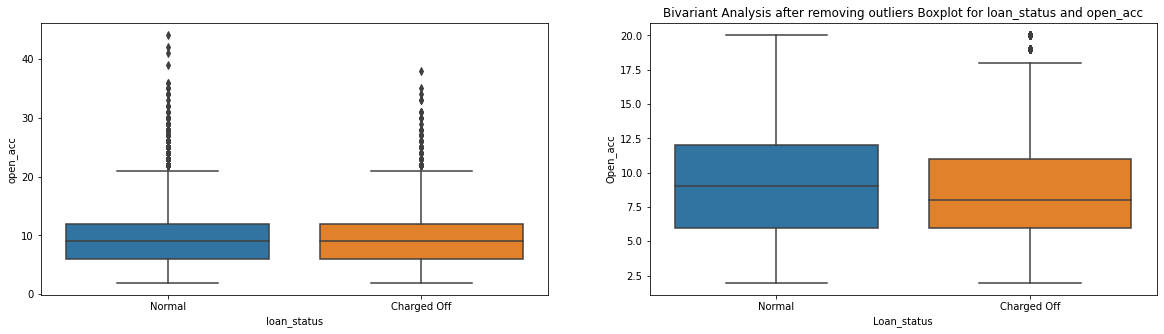

######################################################################################### 
Quantile details for Charged Off Borrower's has open_acc ranging between Q1 = 6.0 and Q3 = 11.0

Quantile details for all Borrower's with open_acc are Q1 = 6.0 and Q3 = 12.0



In [2547]:
chart_with_and_without_outliers('loan_status', 'open_acc')


In [2548]:
df.revol_bal.describe().T

count     39641.000000
mean      13395.457758
std       15893.510254
min           0.000000
25%        3710.000000
50%        8860.000000
75%       17072.000000
max      149588.000000
Name: revol_bal, dtype: float64

In [2549]:
#chart_with_and_without_outliers('loan_status', 'revol_bal')


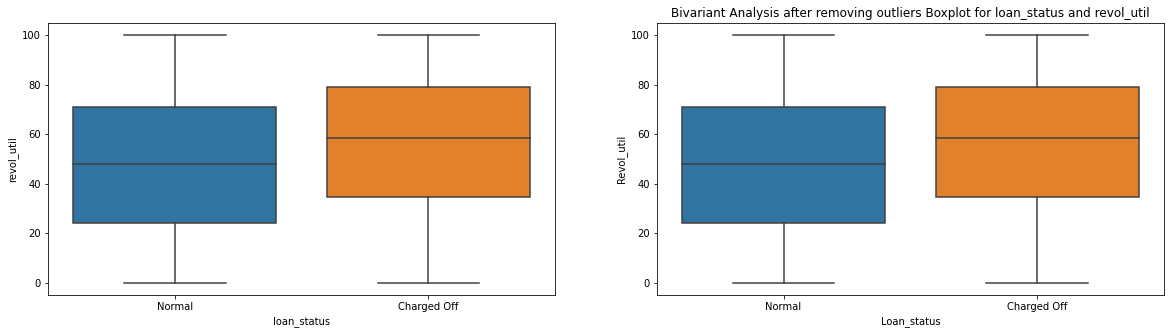

######################################################################################### 
Quantile details for Charged Off Borrower's has revol_util ranging between Q1 = 34.4 and Q3 = 79.0

Quantile details for all Borrower's with revol_util are Q1 = 25.3 and Q3 = 72.3



In [2550]:
chart_with_and_without_outliers('loan_status', 'revol_util')

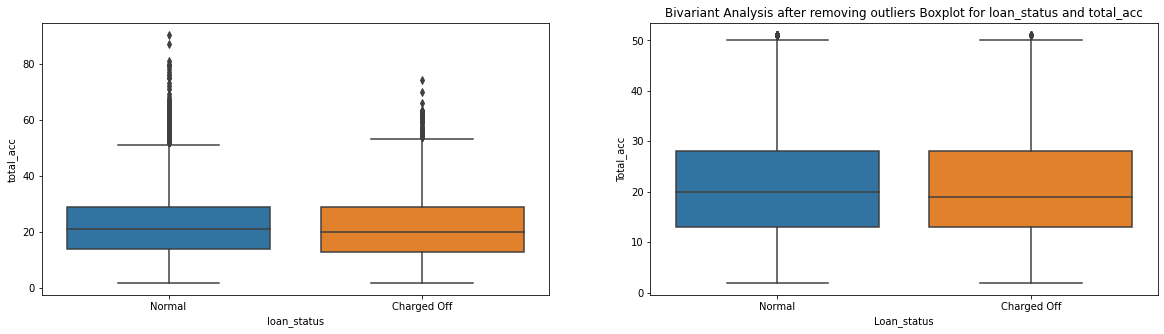

######################################################################################### 
Quantile details for Charged Off Borrower's has total_acc ranging between Q1 = 13.0 and Q3 = 28.0

Quantile details for all Borrower's with total_acc are Q1 = 14.0 and Q3 = 29.0



In [2551]:
chart_with_and_without_outliers('loan_status', 'total_acc')

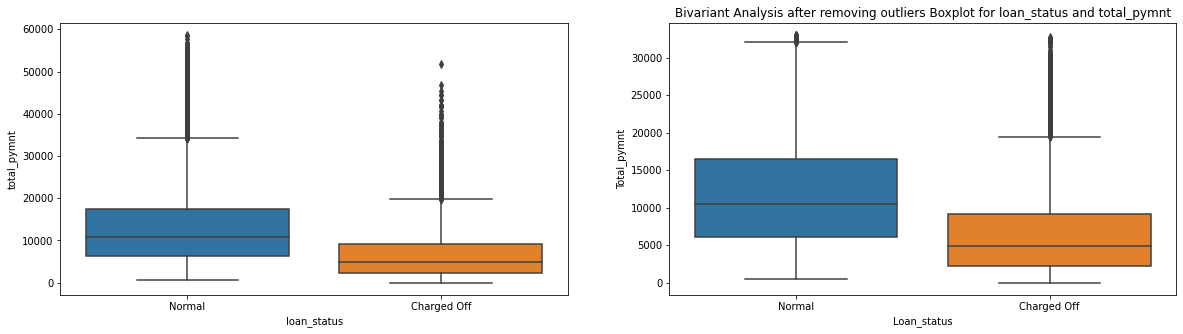

######################################################################################### 
Quantile details for Charged Off Borrower's has total_pymnt ranging between Q1 = 2271.96 and Q3 = 9158.715

Quantile details for all Borrower's with total_pymnt are Q1 = 5594.00844 and Q3 = 16553.74187



In [2552]:

chart_with_and_without_outliers('loan_status', 'total_pymnt')

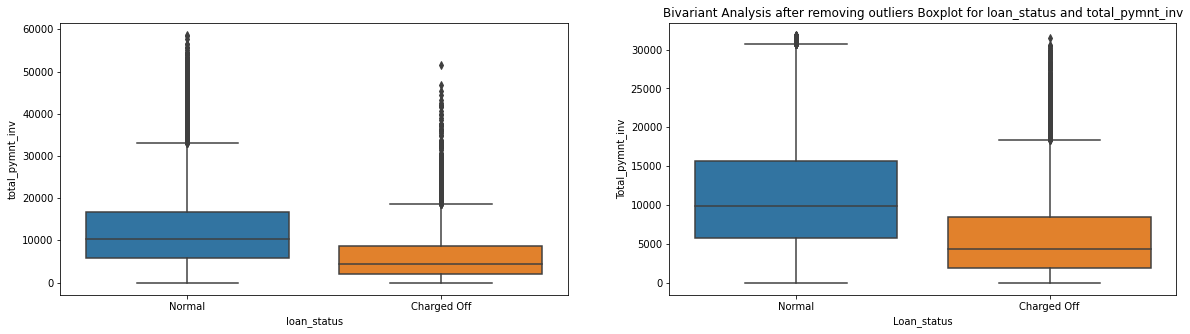

######################################################################################### 
Quantile details for Charged Off Borrower's has total_pymnt_inv ranging between Q1 = 1914.7975000000001 and Q3 = 8485.97

Quantile details for all Borrower's with total_pymnt_inv are Q1 = 5138.68 and Q3 = 15815.91



In [2553]:
chart_with_and_without_outliers('loan_status', 'total_pymnt_inv')

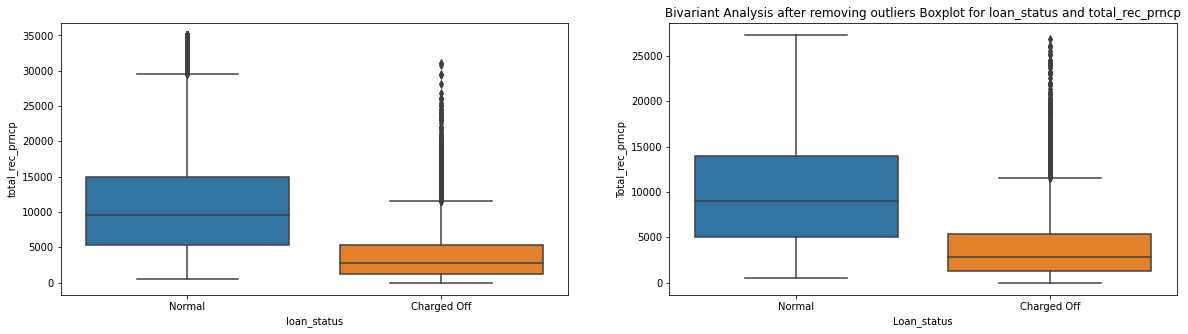

######################################################################################### 
Quantile details for Charged Off Borrower's has total_rec_prncp ranging between Q1 = 1250.315 and Q3 = 5375.99

Quantile details for all Borrower's with total_rec_prncp are Q1 = 4648.89 and Q3 = 13703.96



In [2554]:
chart_with_and_without_outliers('loan_status', 'total_rec_prncp')

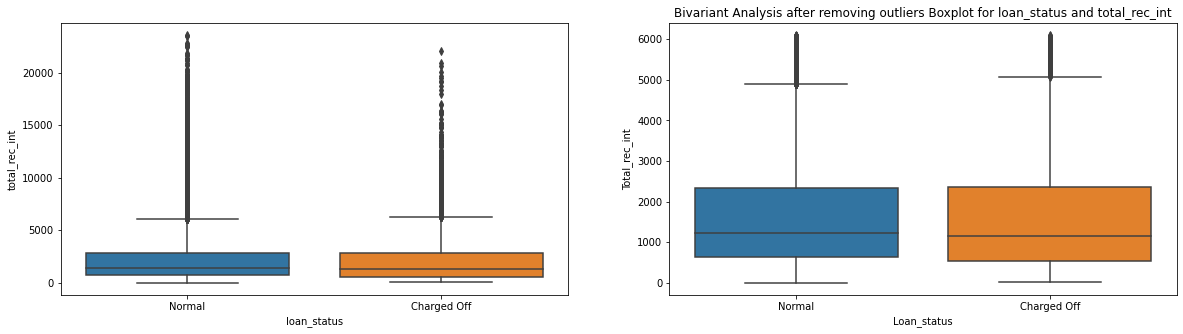

######################################################################################### 
Quantile details for Charged Off Borrower's has total_rec_int ranging between Q1 = 534.63 and Q3 = 2352.955

Quantile details for all Borrower's with total_rec_int are Q1 = 665.16 and Q3 = 2838.13



In [2555]:
chart_with_and_without_outliers('loan_status', 'total_rec_int')

<h2><span style="color: #0000ff;">Multivariant Analysis for categorical variables numerical variables</span></h2>

In [2565]:
file = open("Multivariant_Analysis.txt", "w")

def create_categorical_boxplot(cat, num):
    
    new_df_num,q1,q3  = drop_outliers_from_series(num)   
    new_df_num = new_df_num[new_df_num.loan_status != "Current"]

    
    charged_off = new_df_num[new_df_num.loan_status == "Charged Off"]
    
    
    charged_off_describe = charged_off[num].describe()
    q1_charged_off = charged_off_describe["25%"]
    q3_charged_off = charged_off_describe["75%"]
   
    
    file.write(f"Charged Off Borrower's {cat} and {num} range between range {q1_charged_off} and {q3_charged_off}\n")
    

#     print(f"Quantile details for {cat} and {num} are Q1 = {q1} and Q3 = {q3}\n")
#     print("######################################################################################### ")    
    file.write(f"Borrower's {cat} and {num} range between {q1} and {q3}\n")
    print(    new_df_num.home_ownership.value_counts())

for col in cat_variables:
    for num in num_variables:
        create_categorical_boxplot(col, num)
file.close()


home_ownership
RENT        18416
MORTGAGE    16352
OWN          2937
OTHER          93
Name: count, dtype: int64
home_ownership
RENT        18536
MORTGAGE    16791
OWN          2988
OTHER          98
Name: count, dtype: int64
home_ownership
RENT        18438
MORTGAGE    16882
OWN          2982
OTHER          96
Name: count, dtype: int64
home_ownership
RENT        18808
MORTGAGE    17607
OWN          3050
OTHER          98
Name: count, dtype: int64
home_ownership
RENT        18846
MORTGAGE    17644
OWN          3053
OTHER          98
Name: count, dtype: int64
home_ownership
RENT        18846
MORTGAGE    17644
OWN          3053
OTHER          98
Name: count, dtype: int64
home_ownership
RENT        17492
MORTGAGE    15670
OWN          2777
OTHER          85
Name: count, dtype: int64
home_ownership
RENT        17317
MORTGAGE    16001
OWN          2806
OTHER          88
Name: count, dtype: int64
home_ownership
RENT        18613
MORTGAGE    17182
OWN          2991
OTHER          97
Name: cou

home_ownership
RENT        18605
MORTGAGE    16970
OWN          2999
OTHER          98
Name: count, dtype: int64
home_ownership
RENT        17755
MORTGAGE    15740
OWN          2894
OTHER          98
Name: count, dtype: int64
home_ownership
RENT        18416
MORTGAGE    16352
OWN          2937
OTHER          93
Name: count, dtype: int64
home_ownership
RENT        18536
MORTGAGE    16791
OWN          2988
OTHER          98
Name: count, dtype: int64
home_ownership
RENT        18438
MORTGAGE    16882
OWN          2982
OTHER          96
Name: count, dtype: int64
home_ownership
RENT        18808
MORTGAGE    17607
OWN          3050
OTHER          98
Name: count, dtype: int64
home_ownership
RENT        18846
MORTGAGE    17644
OWN          3053
OTHER          98
Name: count, dtype: int64
home_ownership
RENT        18846
MORTGAGE    17644
OWN          3053
OTHER          98
Name: count, dtype: int64
home_ownership
RENT        17492
MORTGAGE    15670
OWN          2777
OTHER          85
Name: cou

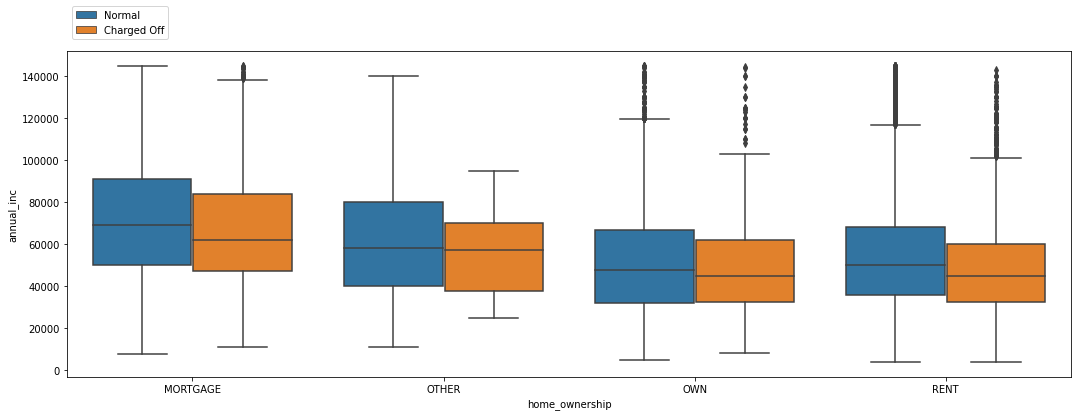

Quantile details for home_ownership and annual_inc are Q1 = 40500.0 and Q3 = 82400.0

######################################################################################### 


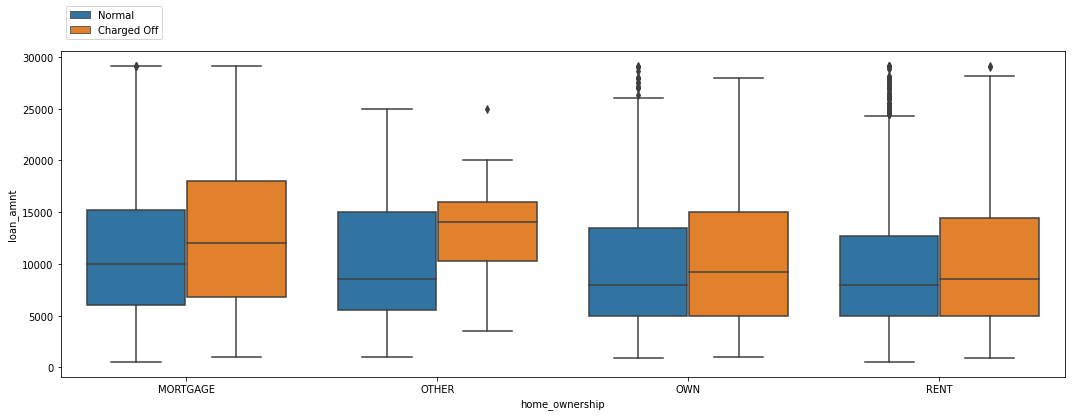

Quantile details for home_ownership and loan_amnt are Q1 = 5500.0 and Q3 = 15000.0

######################################################################################### 


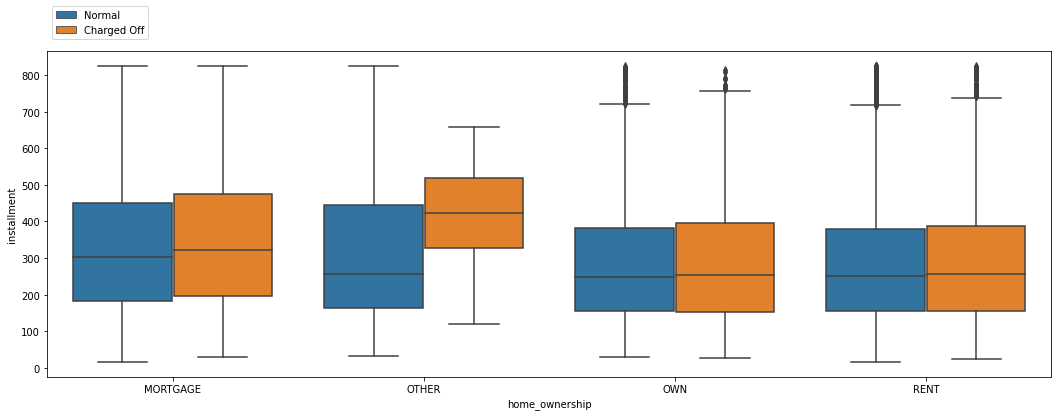

Quantile details for home_ownership and installment are Q1 = 167.08 and Q3 = 430.78

######################################################################################### 


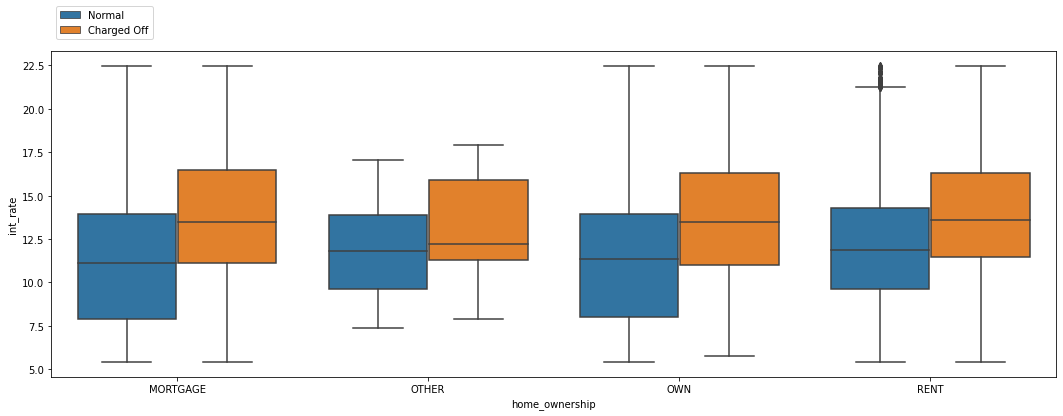

Quantile details for home_ownership and int_rate are Q1 = 9.25 and Q3 = 14.59

######################################################################################### 


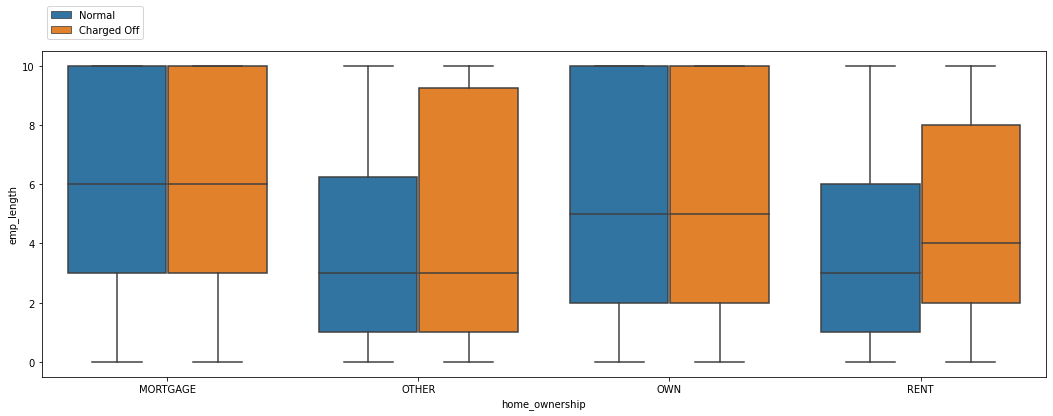

Quantile details for home_ownership and emp_length are Q1 = 2.0 and Q3 = 10.0

######################################################################################### 


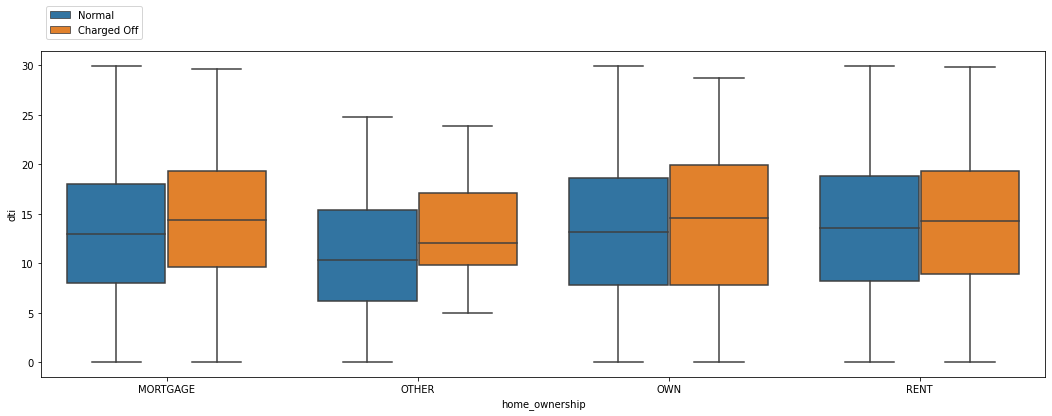

Quantile details for home_ownership and dti are Q1 = 8.18 and Q3 = 18.6

######################################################################################### 


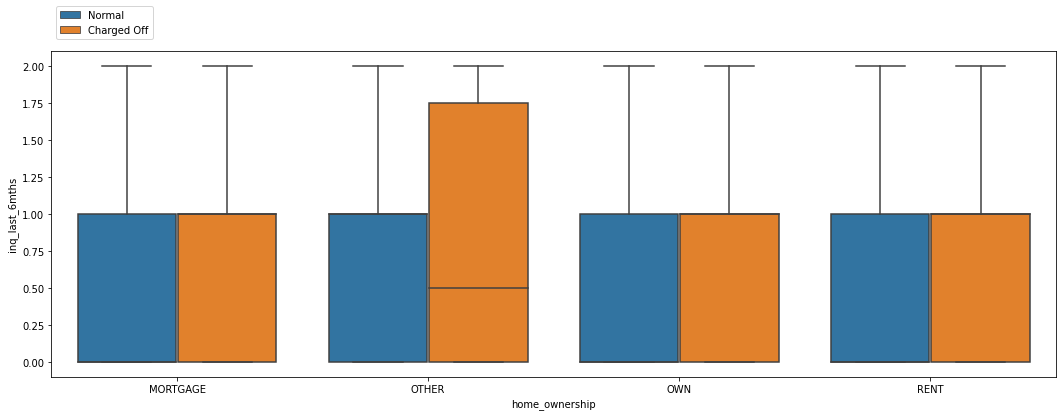

Quantile details for home_ownership and inq_last_6mths are Q1 = 0.0 and Q3 = 1.0

######################################################################################### 


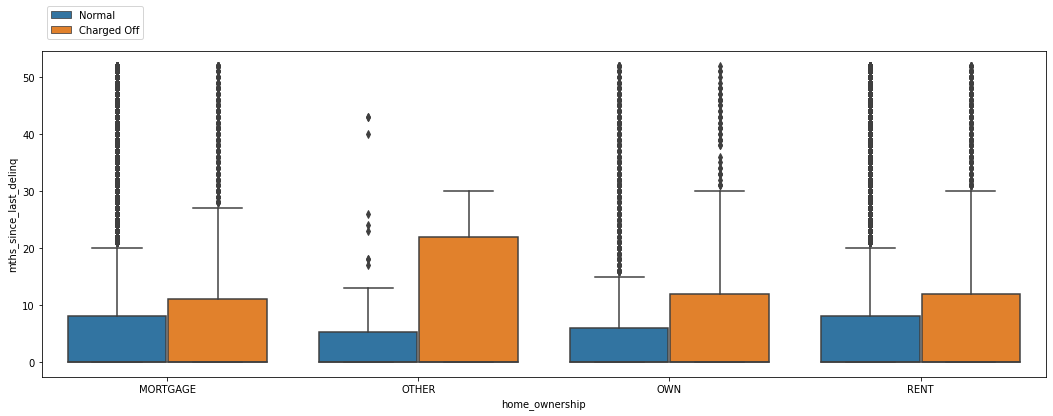

Quantile details for home_ownership and mths_since_last_delinq are Q1 = 0.0 and Q3 = 21.0

######################################################################################### 


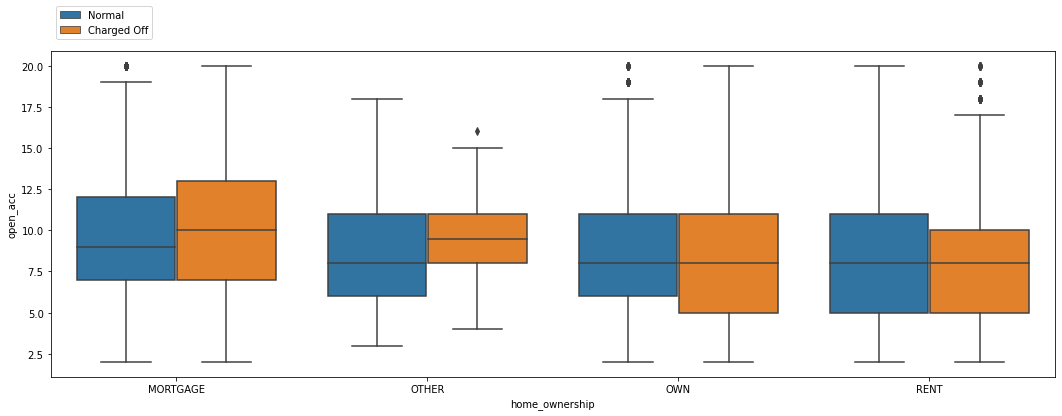

Quantile details for home_ownership and open_acc are Q1 = 6.0 and Q3 = 12.0

######################################################################################### 


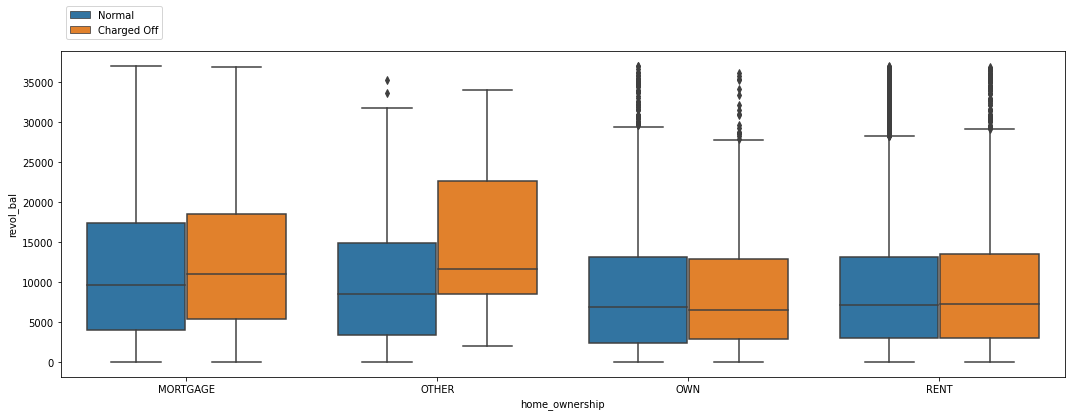

Quantile details for home_ownership and revol_bal are Q1 = 3710.0 and Q3 = 17072.0

######################################################################################### 


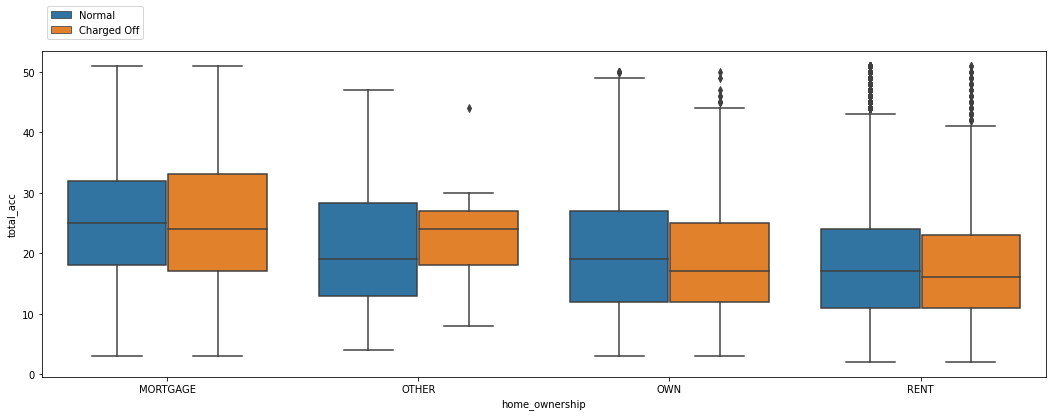

Quantile details for home_ownership and total_acc are Q1 = 14.0 and Q3 = 29.0

######################################################################################### 


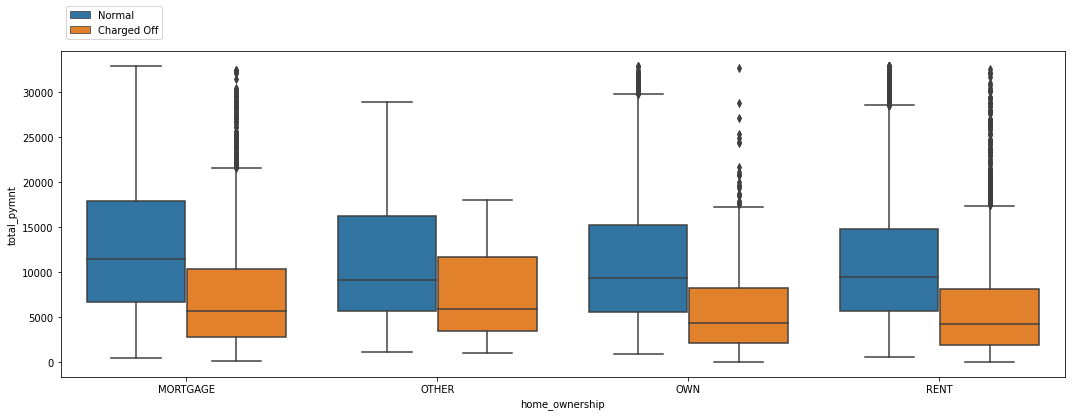

Quantile details for home_ownership and total_pymnt are Q1 = 5594.00844 and Q3 = 16553.74187

######################################################################################### 


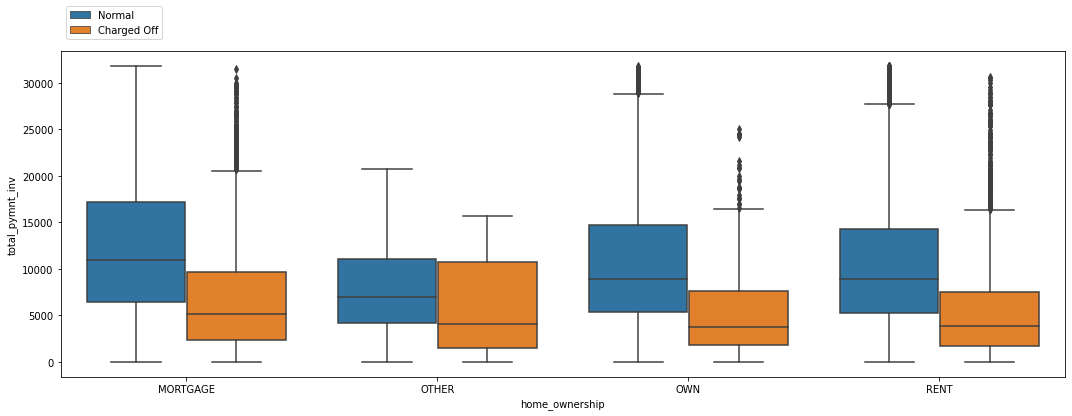

Quantile details for home_ownership and total_pymnt_inv are Q1 = 5138.68 and Q3 = 15815.91

######################################################################################### 


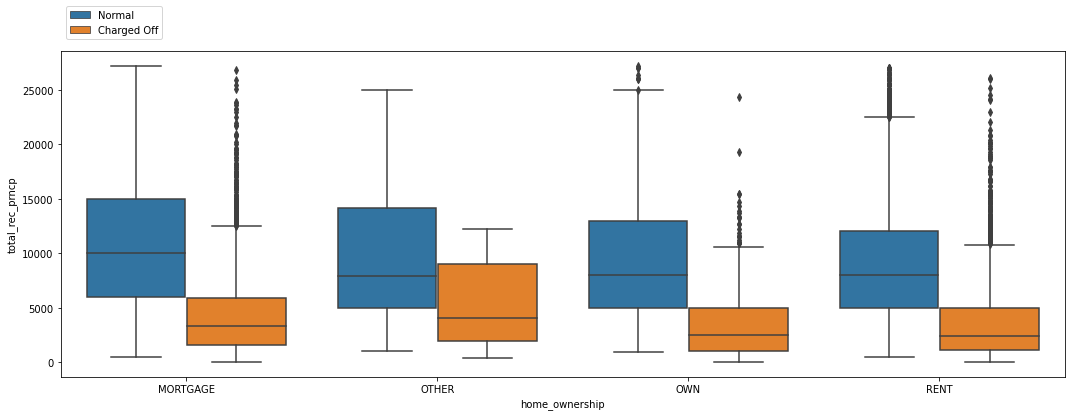

Quantile details for home_ownership and total_rec_prncp are Q1 = 4648.89 and Q3 = 13703.96

######################################################################################### 


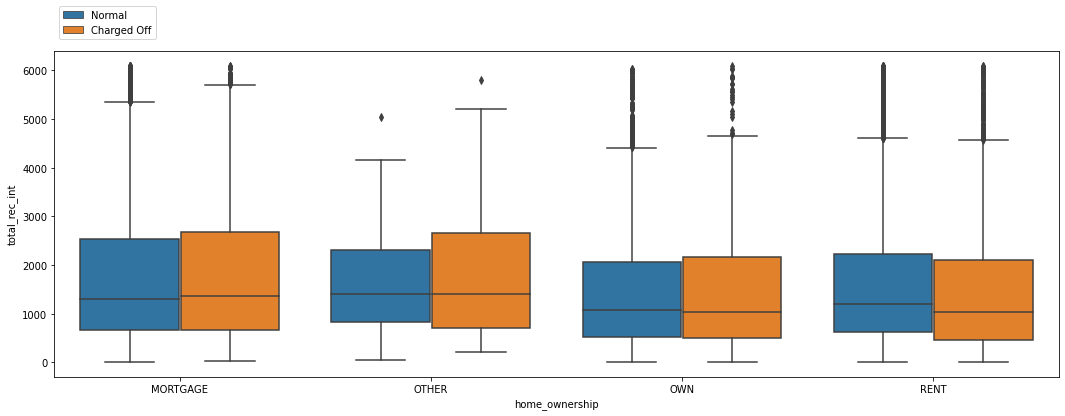

Quantile details for home_ownership and total_rec_int are Q1 = 665.16 and Q3 = 2838.13

######################################################################################### 


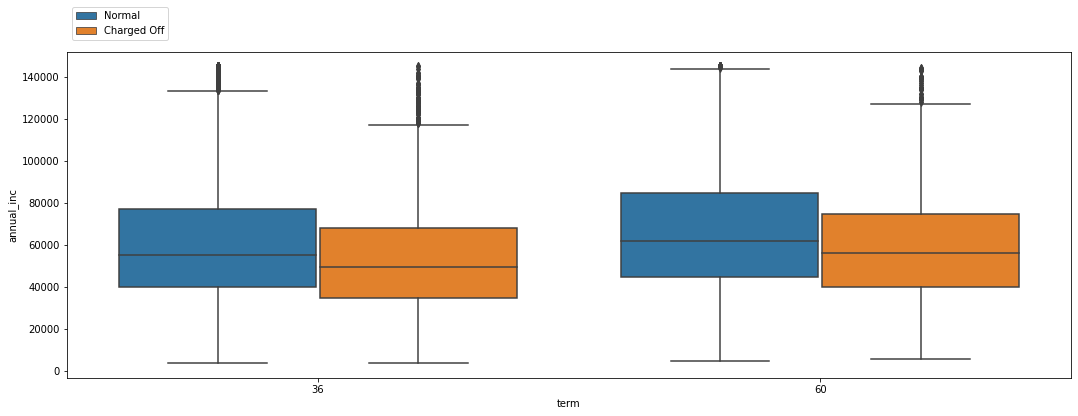

Quantile details for term and annual_inc are Q1 = 40500.0 and Q3 = 82400.0

######################################################################################### 


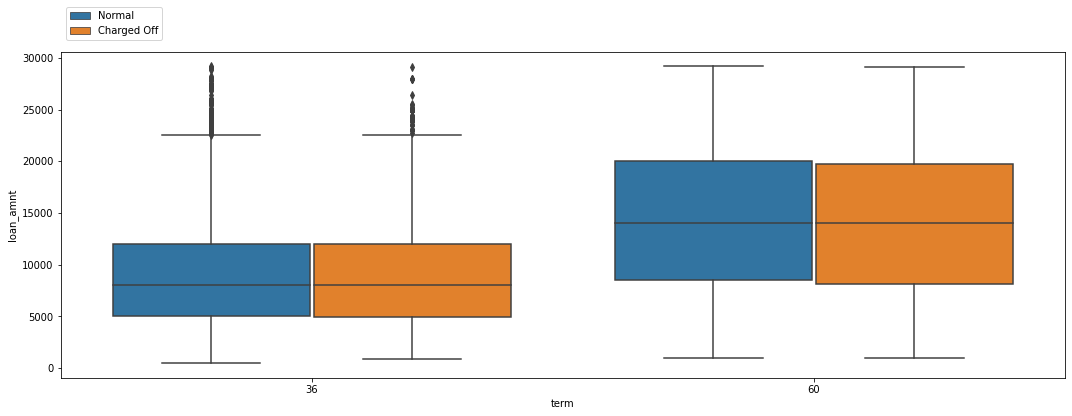

Quantile details for term and loan_amnt are Q1 = 5500.0 and Q3 = 15000.0

######################################################################################### 


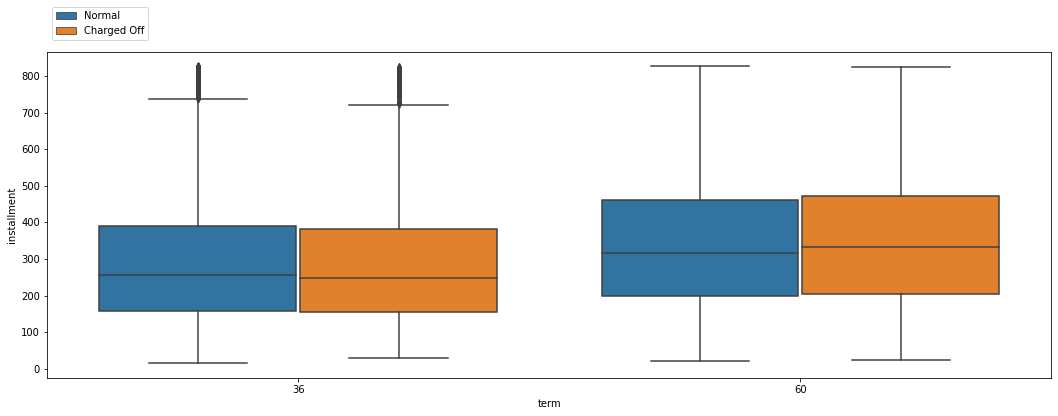

Quantile details for term and installment are Q1 = 167.08 and Q3 = 430.78

######################################################################################### 


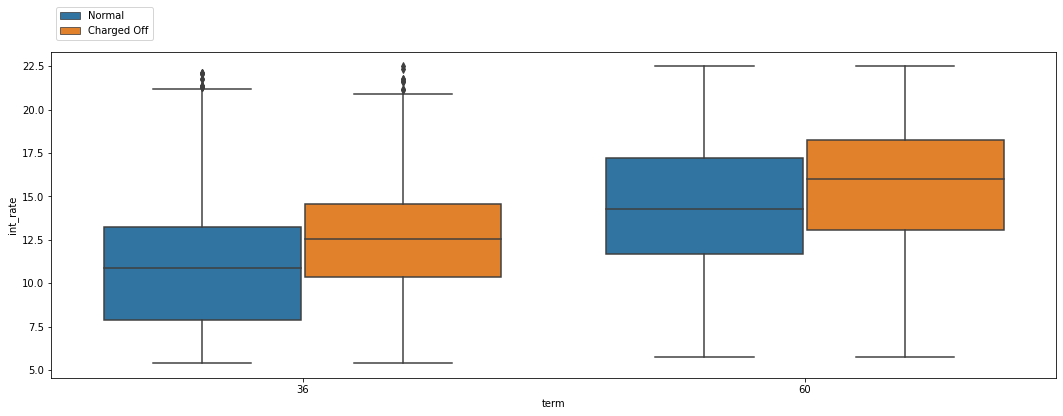

Quantile details for term and int_rate are Q1 = 9.25 and Q3 = 14.59

######################################################################################### 


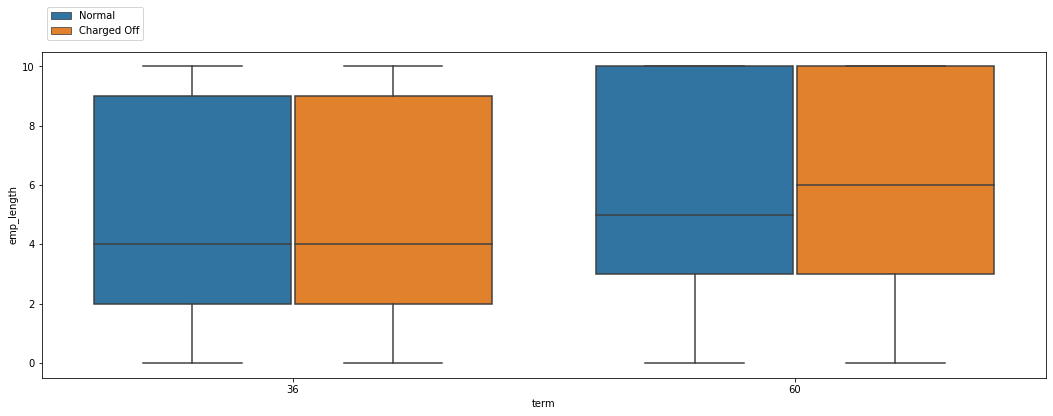

Quantile details for term and emp_length are Q1 = 2.0 and Q3 = 10.0

######################################################################################### 


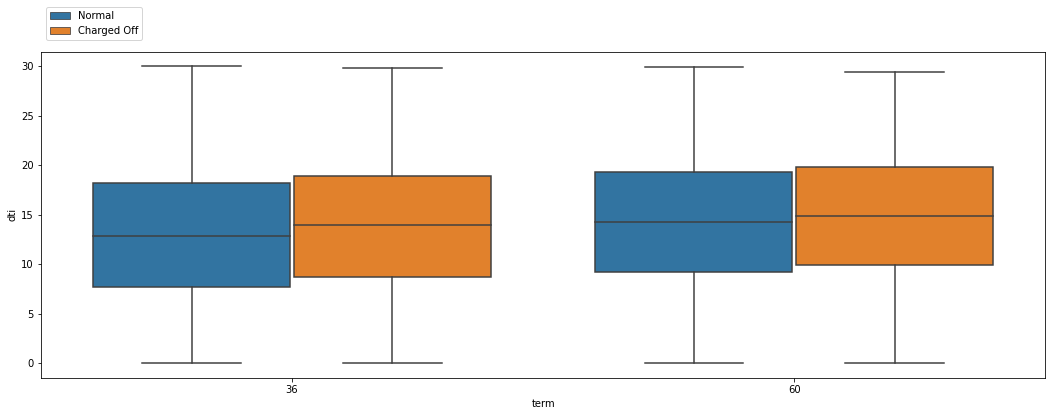

Quantile details for term and dti are Q1 = 8.18 and Q3 = 18.6

######################################################################################### 


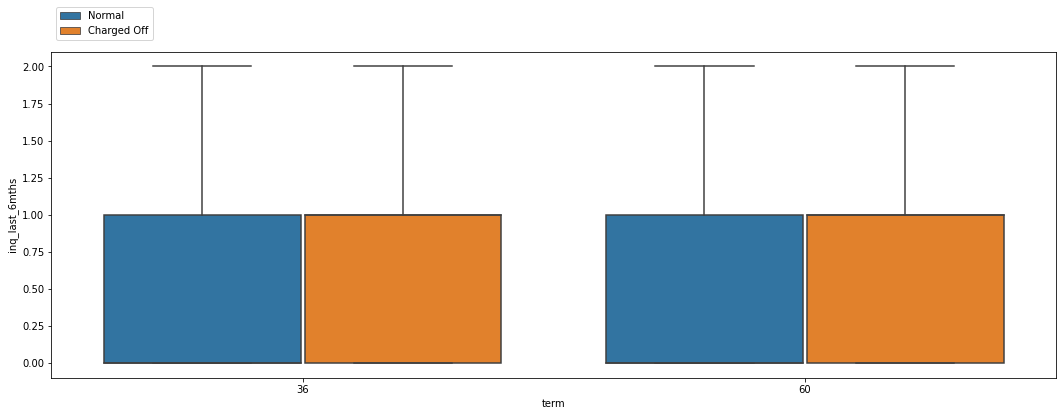

Quantile details for term and inq_last_6mths are Q1 = 0.0 and Q3 = 1.0

######################################################################################### 


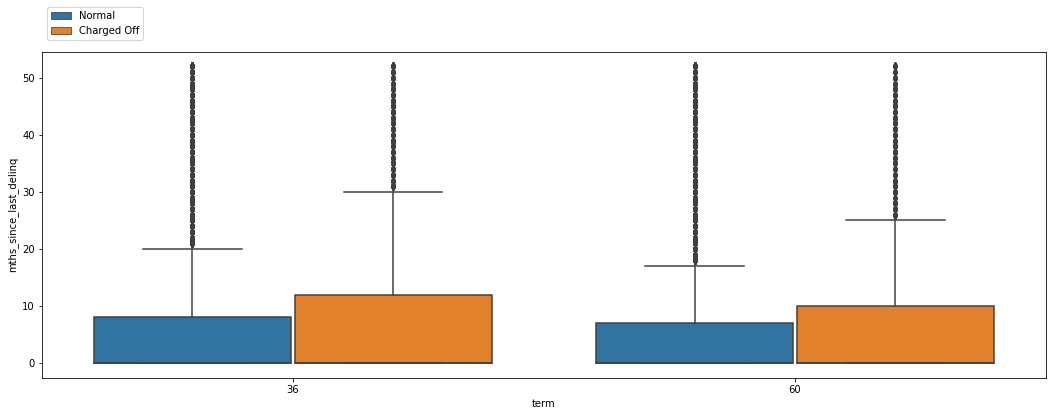

Quantile details for term and mths_since_last_delinq are Q1 = 0.0 and Q3 = 21.0

######################################################################################### 


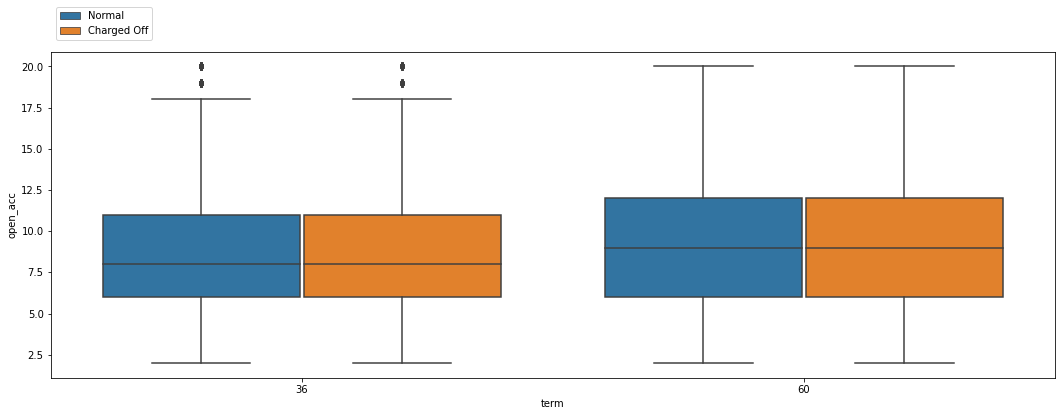

Quantile details for term and open_acc are Q1 = 6.0 and Q3 = 12.0

######################################################################################### 


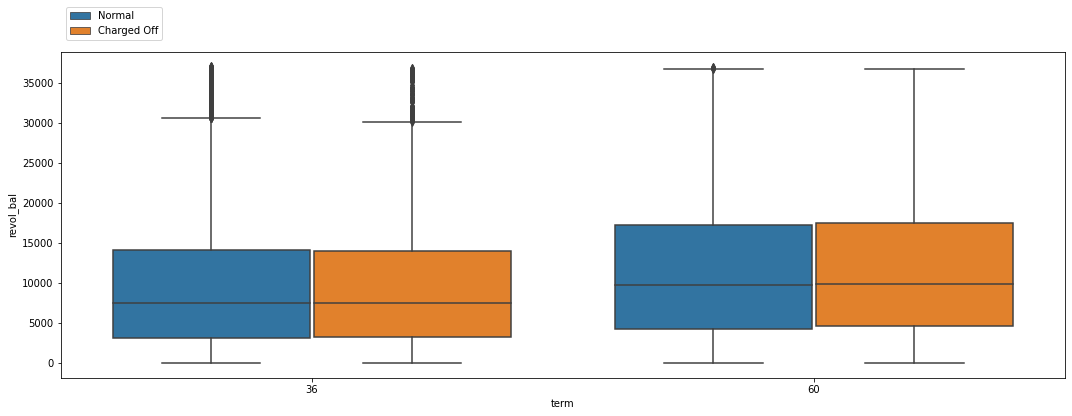

Quantile details for term and revol_bal are Q1 = 3710.0 and Q3 = 17072.0

######################################################################################### 


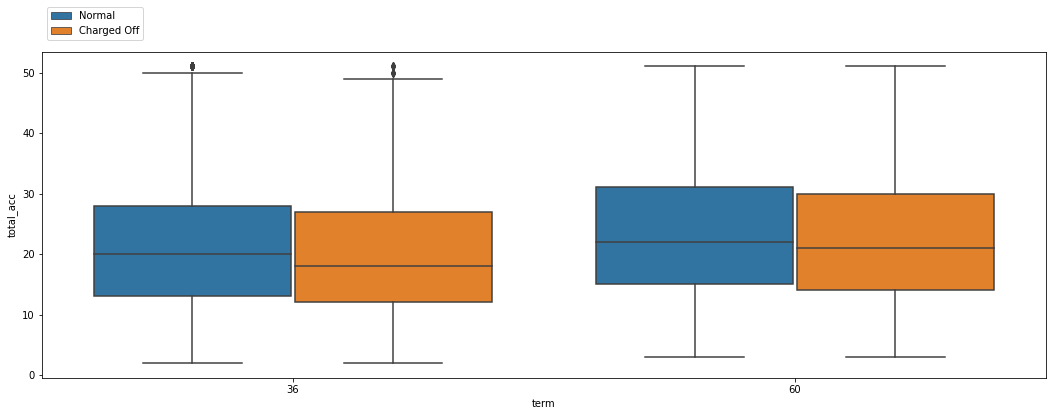

Quantile details for term and total_acc are Q1 = 14.0 and Q3 = 29.0

######################################################################################### 


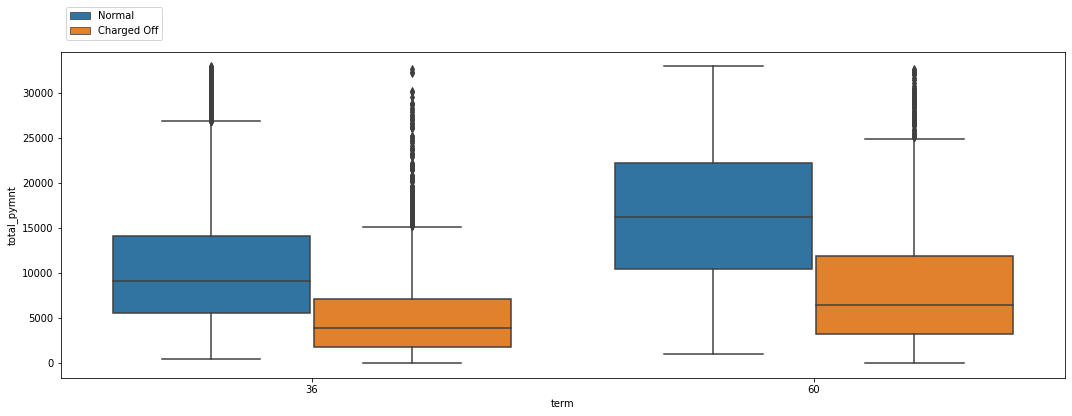

Quantile details for term and total_pymnt are Q1 = 5594.00844 and Q3 = 16553.74187

######################################################################################### 


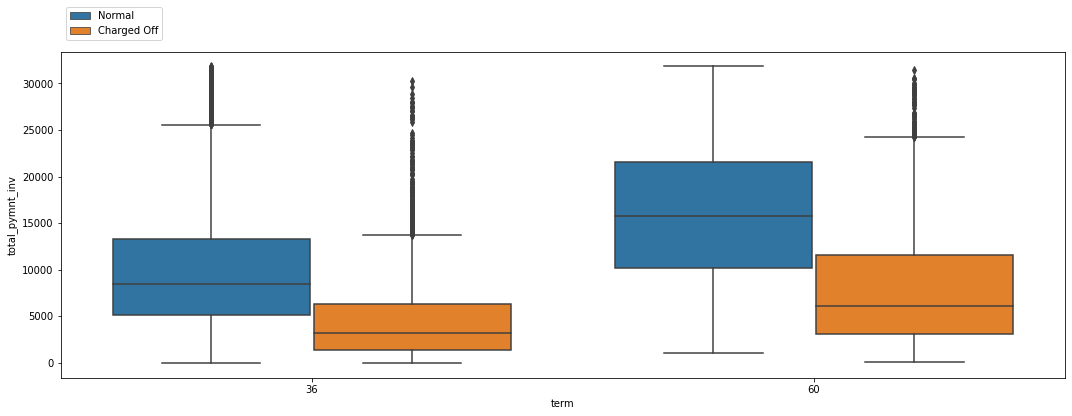

Quantile details for term and total_pymnt_inv are Q1 = 5138.68 and Q3 = 15815.91

######################################################################################### 


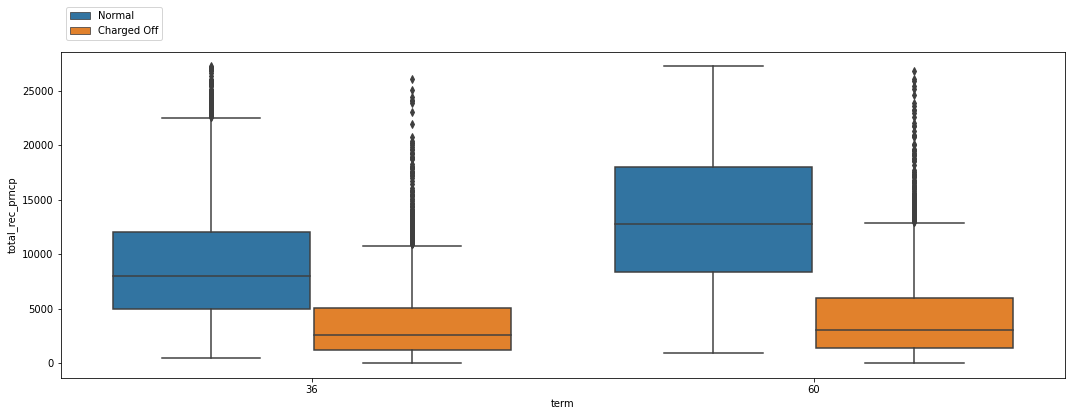

Quantile details for term and total_rec_prncp are Q1 = 4648.89 and Q3 = 13703.96

######################################################################################### 


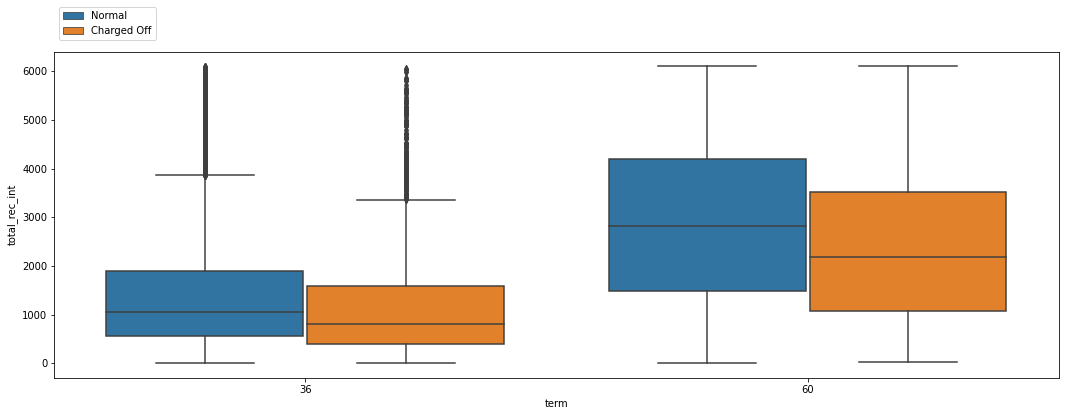

Quantile details for term and total_rec_int are Q1 = 665.16 and Q3 = 2838.13

######################################################################################### 


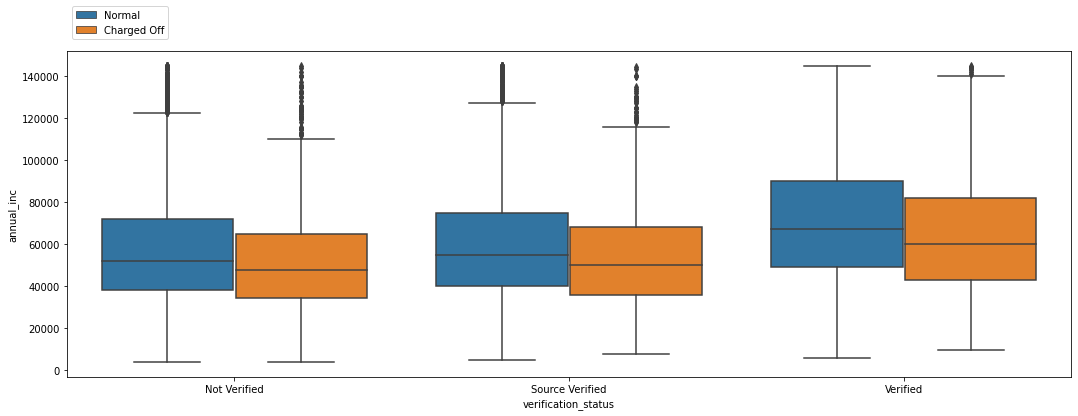

Quantile details for verification_status and annual_inc are Q1 = 40500.0 and Q3 = 82400.0

######################################################################################### 


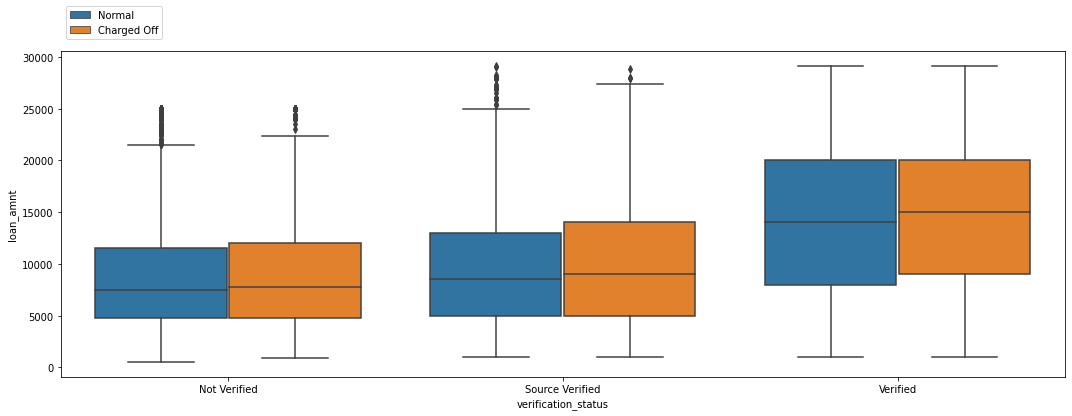

Quantile details for verification_status and loan_amnt are Q1 = 5500.0 and Q3 = 15000.0

######################################################################################### 


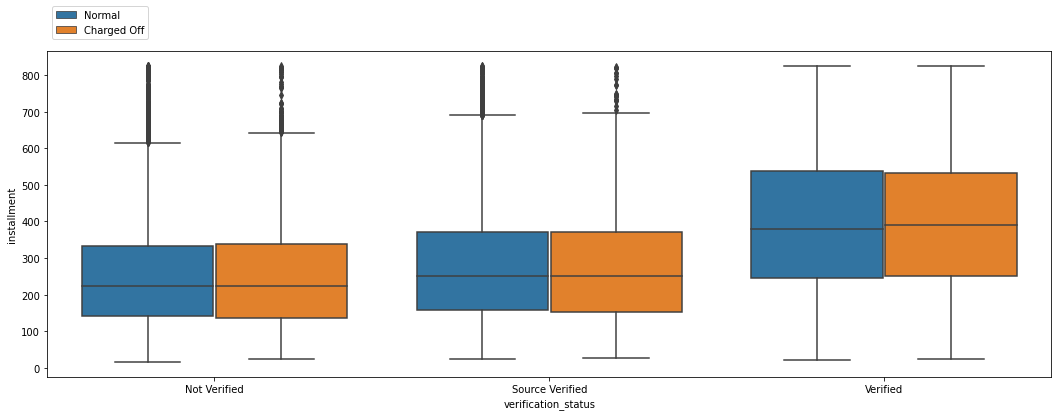

Quantile details for verification_status and installment are Q1 = 167.08 and Q3 = 430.78

######################################################################################### 


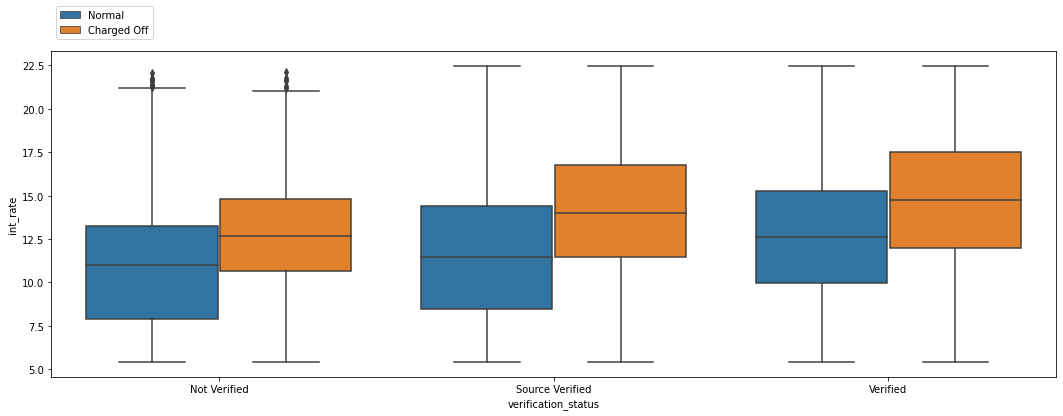

Quantile details for verification_status and int_rate are Q1 = 9.25 and Q3 = 14.59

######################################################################################### 


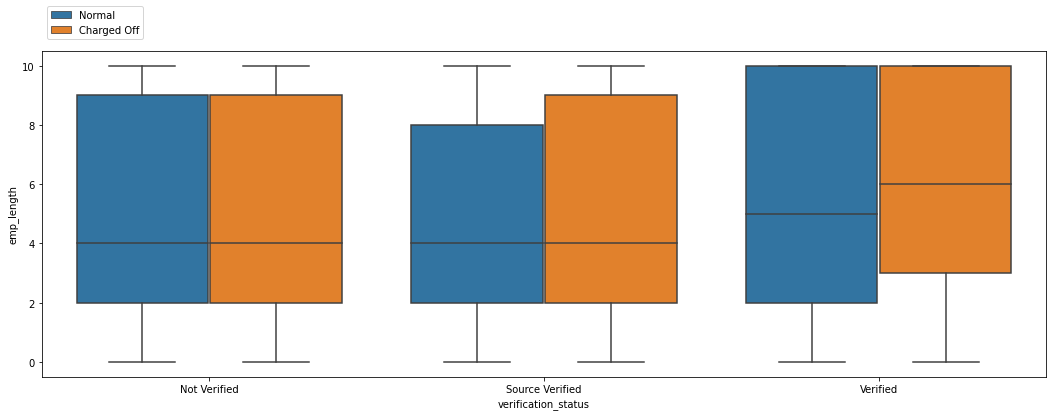

Quantile details for verification_status and emp_length are Q1 = 2.0 and Q3 = 10.0

######################################################################################### 


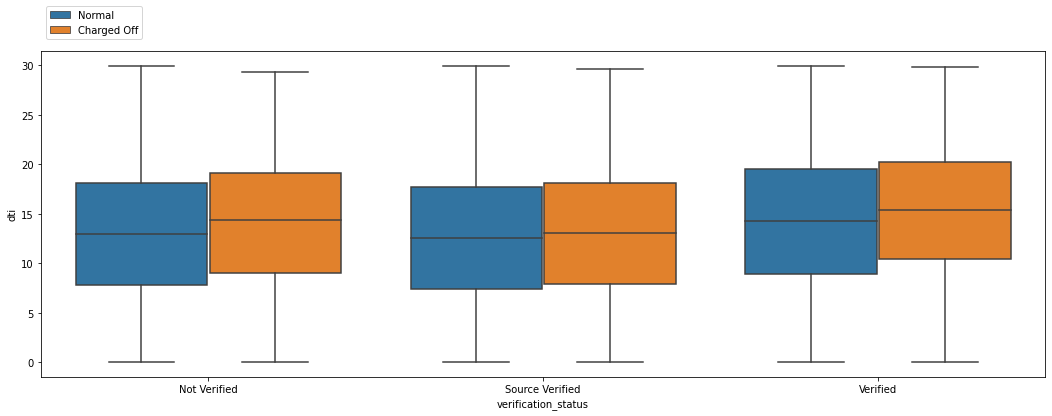

Quantile details for verification_status and dti are Q1 = 8.18 and Q3 = 18.6

######################################################################################### 


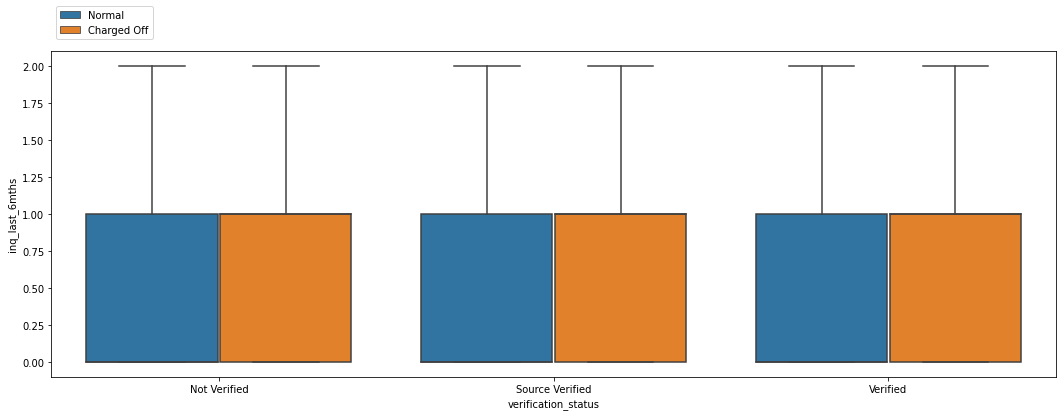

Quantile details for verification_status and inq_last_6mths are Q1 = 0.0 and Q3 = 1.0

######################################################################################### 


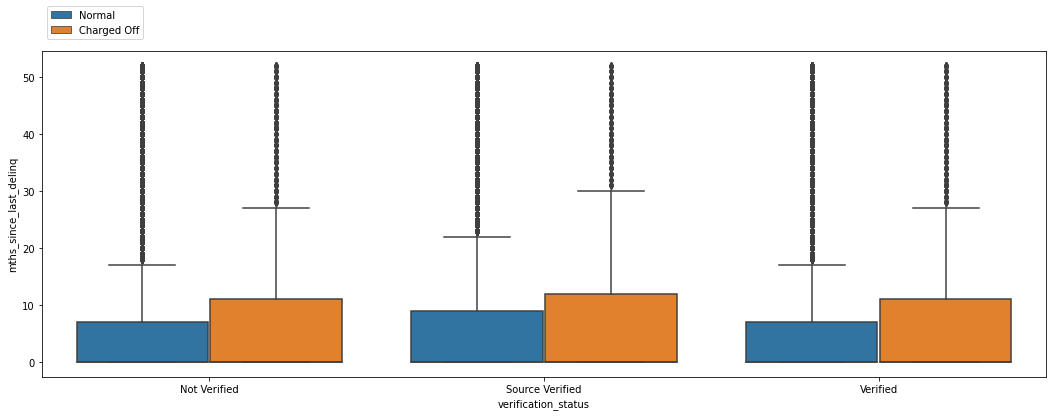

Quantile details for verification_status and mths_since_last_delinq are Q1 = 0.0 and Q3 = 21.0

######################################################################################### 


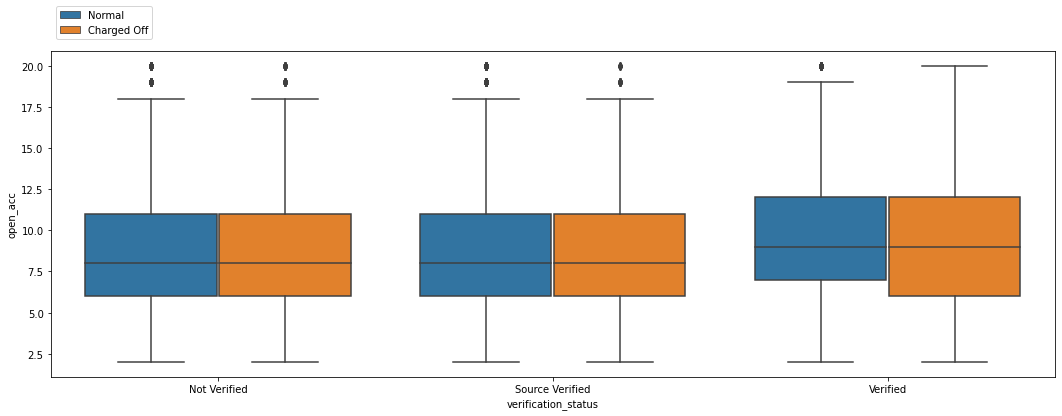

Quantile details for verification_status and open_acc are Q1 = 6.0 and Q3 = 12.0

######################################################################################### 


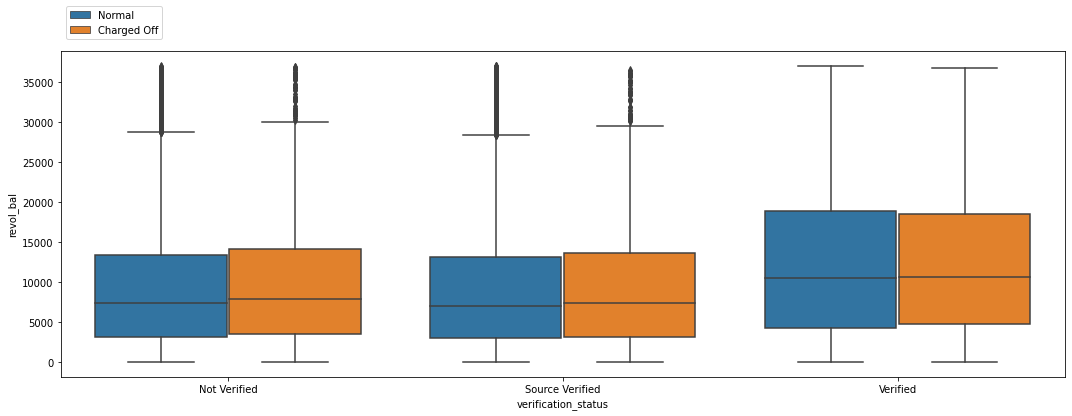

Quantile details for verification_status and revol_bal are Q1 = 3710.0 and Q3 = 17072.0

######################################################################################### 


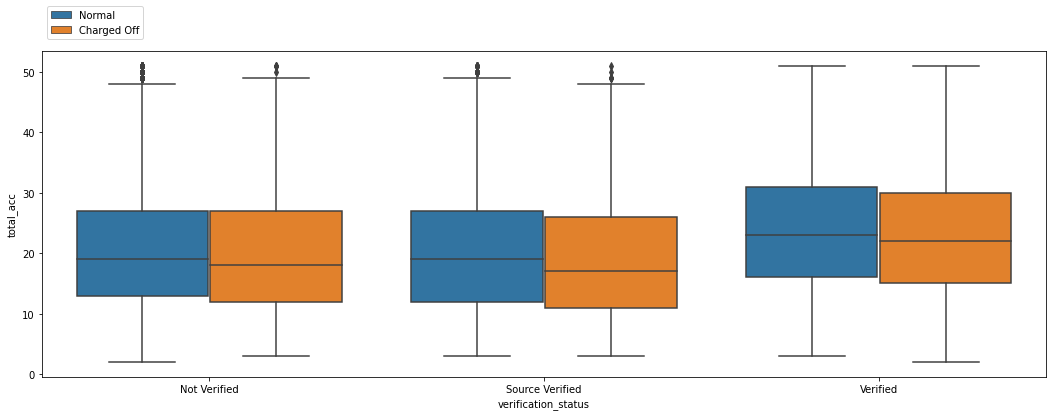

Quantile details for verification_status and total_acc are Q1 = 14.0 and Q3 = 29.0

######################################################################################### 


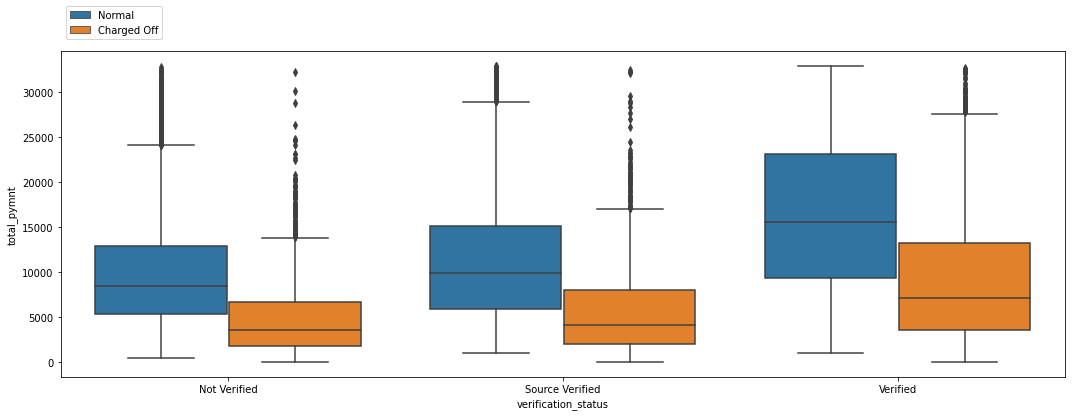

Quantile details for verification_status and total_pymnt are Q1 = 5594.00844 and Q3 = 16553.74187

######################################################################################### 


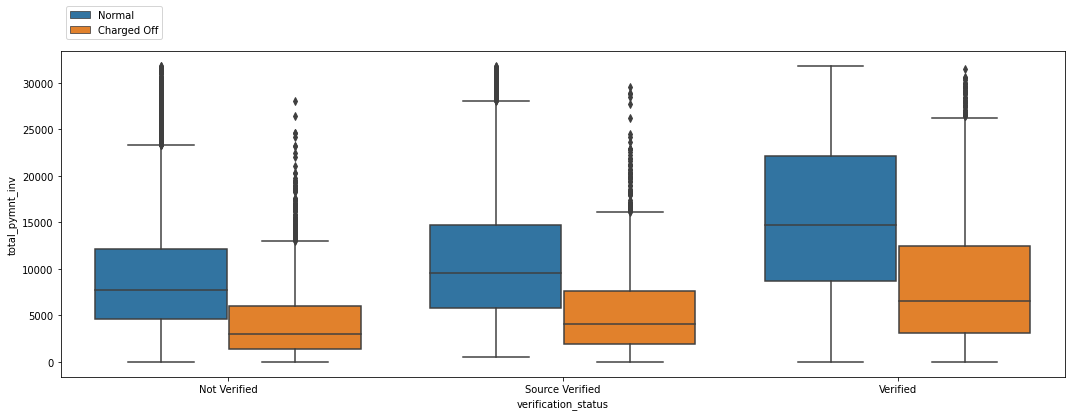

Quantile details for verification_status and total_pymnt_inv are Q1 = 5138.68 and Q3 = 15815.91

######################################################################################### 


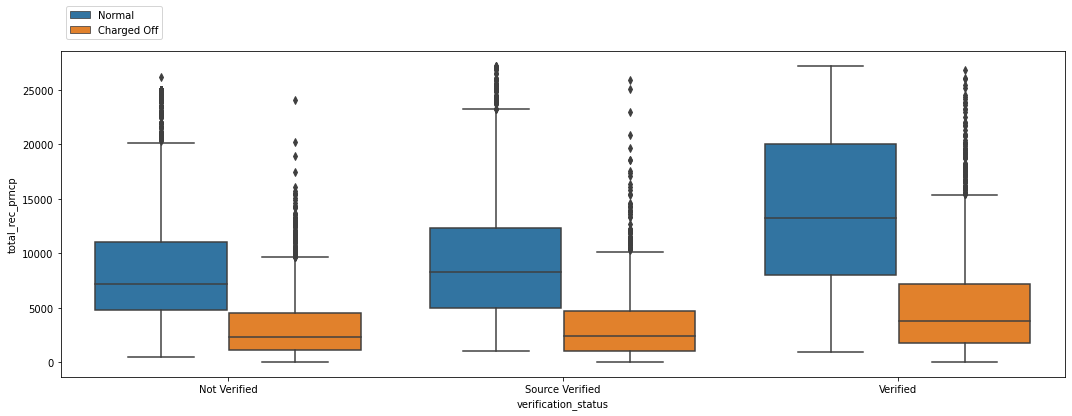

Quantile details for verification_status and total_rec_prncp are Q1 = 4648.89 and Q3 = 13703.96

######################################################################################### 


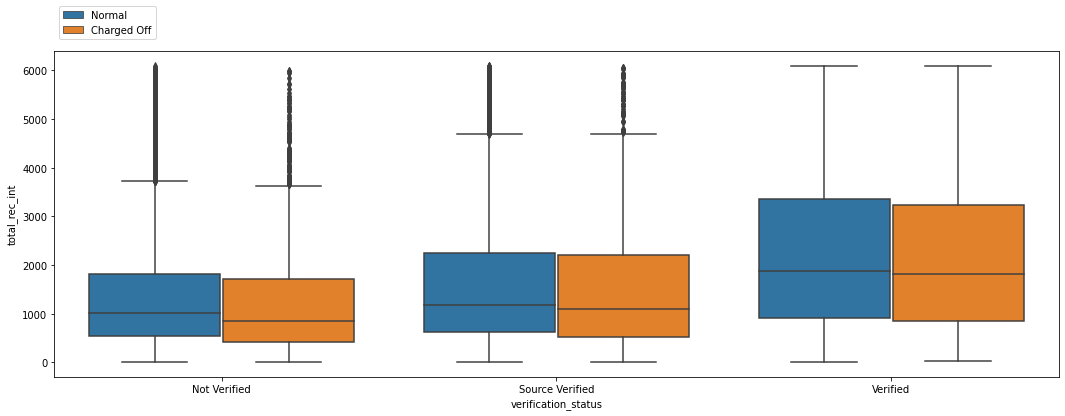

Quantile details for verification_status and total_rec_int are Q1 = 665.16 and Q3 = 2838.13

######################################################################################### 


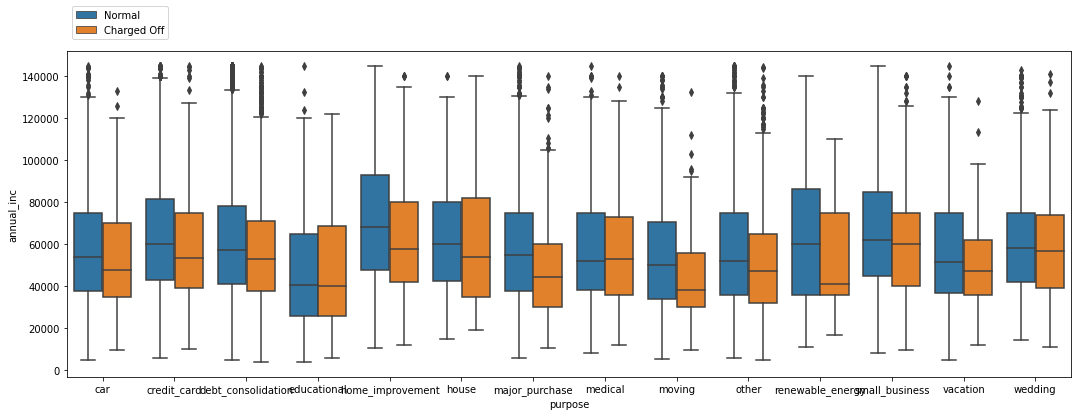

Quantile details for purpose and annual_inc are Q1 = 40500.0 and Q3 = 82400.0

######################################################################################### 


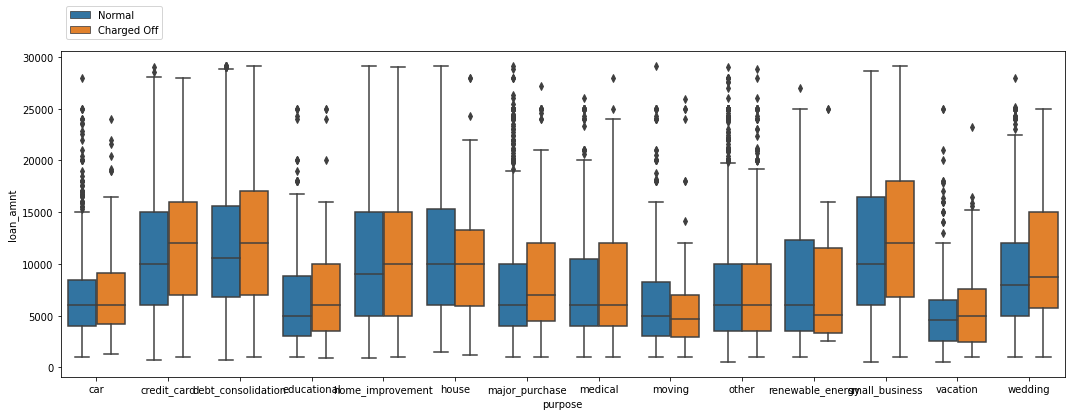

Quantile details for purpose and loan_amnt are Q1 = 5500.0 and Q3 = 15000.0

######################################################################################### 


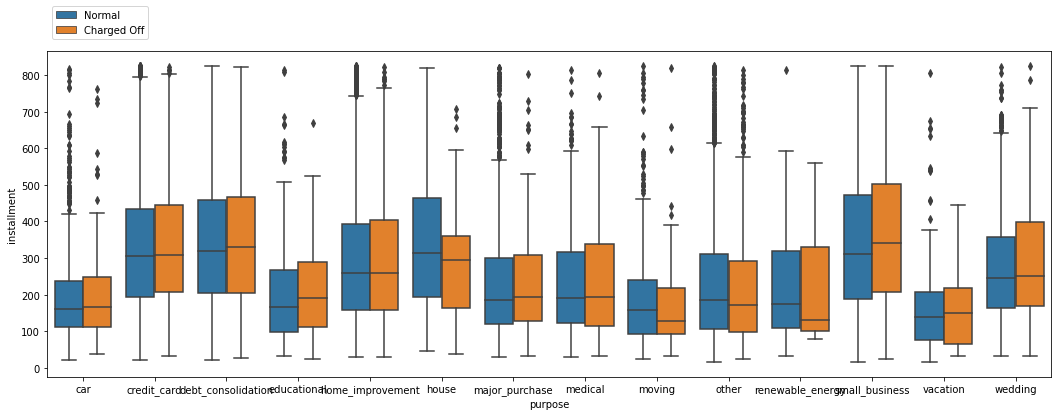

Quantile details for purpose and installment are Q1 = 167.08 and Q3 = 430.78

######################################################################################### 


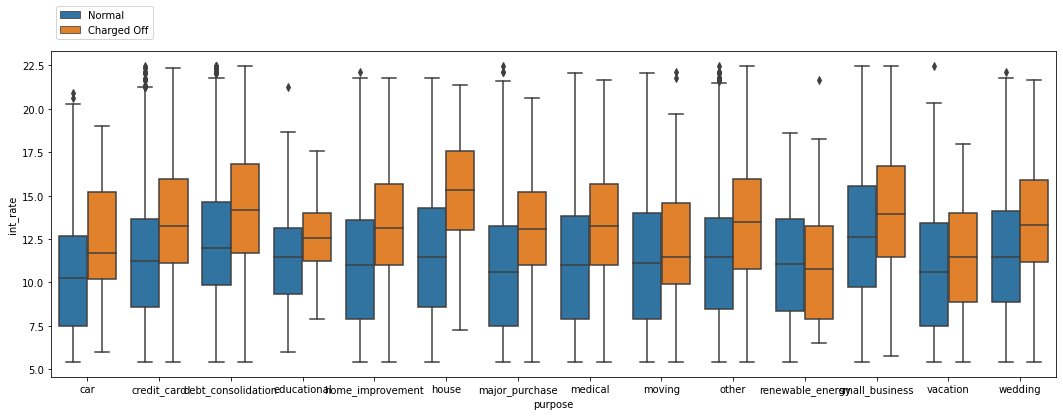

Quantile details for purpose and int_rate are Q1 = 9.25 and Q3 = 14.59

######################################################################################### 


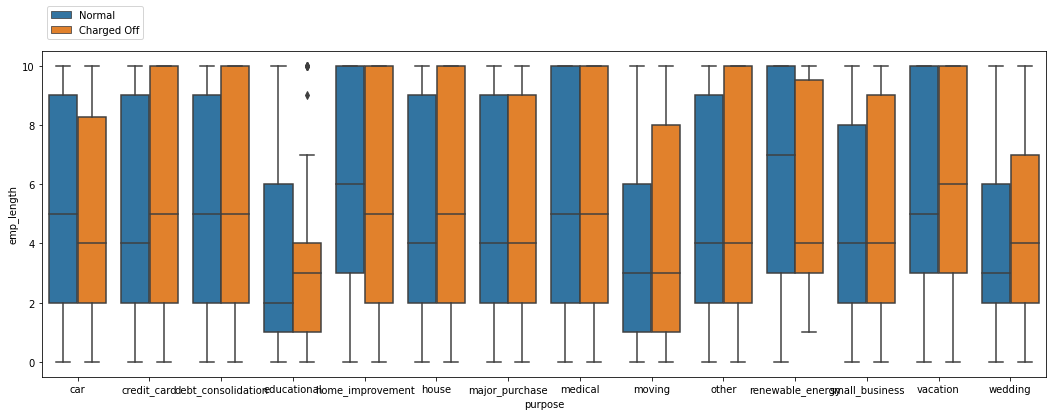

Quantile details for purpose and emp_length are Q1 = 2.0 and Q3 = 10.0

######################################################################################### 


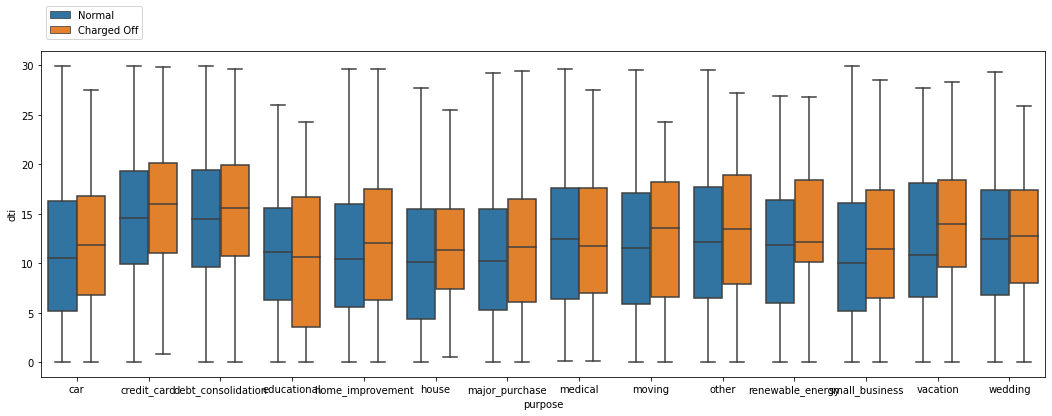

Quantile details for purpose and dti are Q1 = 8.18 and Q3 = 18.6

######################################################################################### 


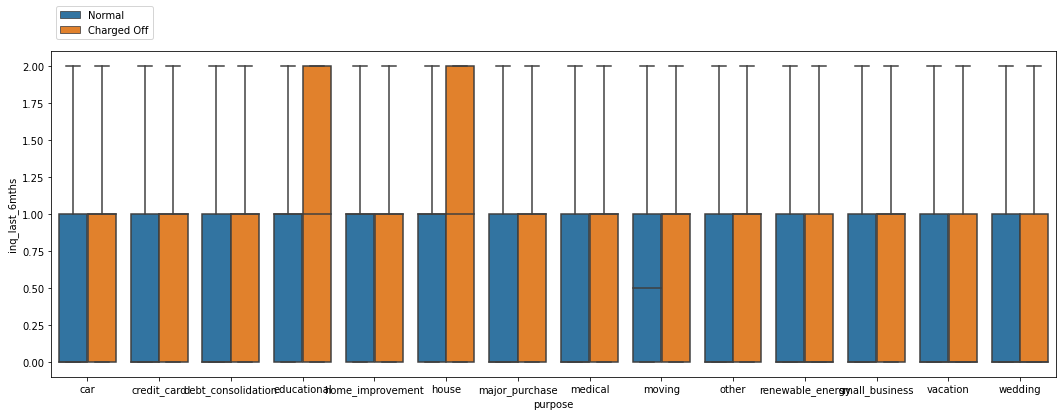

Quantile details for purpose and inq_last_6mths are Q1 = 0.0 and Q3 = 1.0

######################################################################################### 


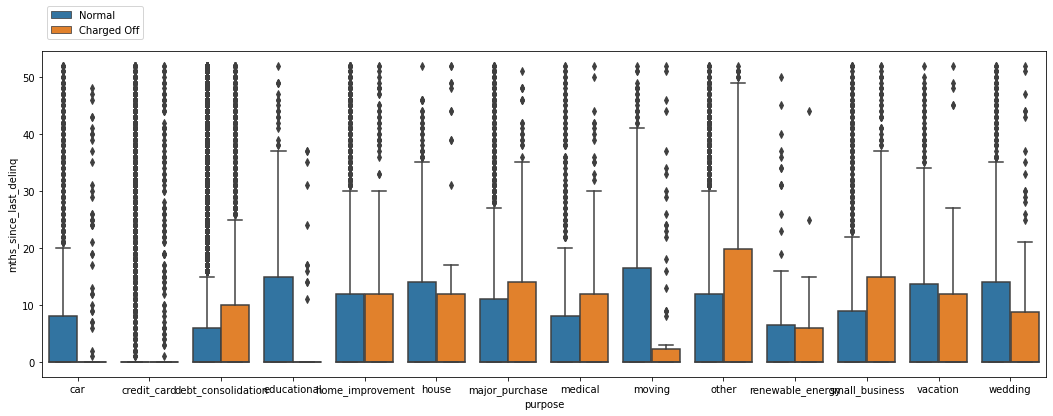

Quantile details for purpose and mths_since_last_delinq are Q1 = 0.0 and Q3 = 21.0

######################################################################################### 


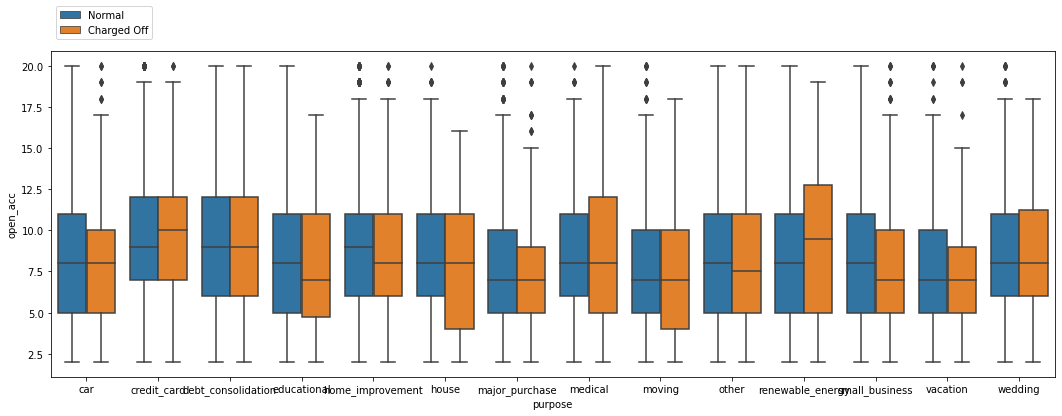

Quantile details for purpose and open_acc are Q1 = 6.0 and Q3 = 12.0

######################################################################################### 


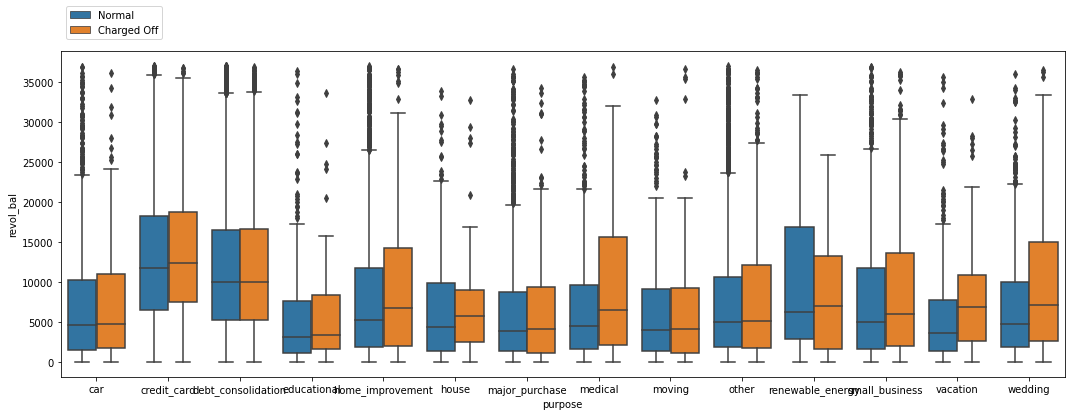

Quantile details for purpose and revol_bal are Q1 = 3710.0 and Q3 = 17072.0

######################################################################################### 


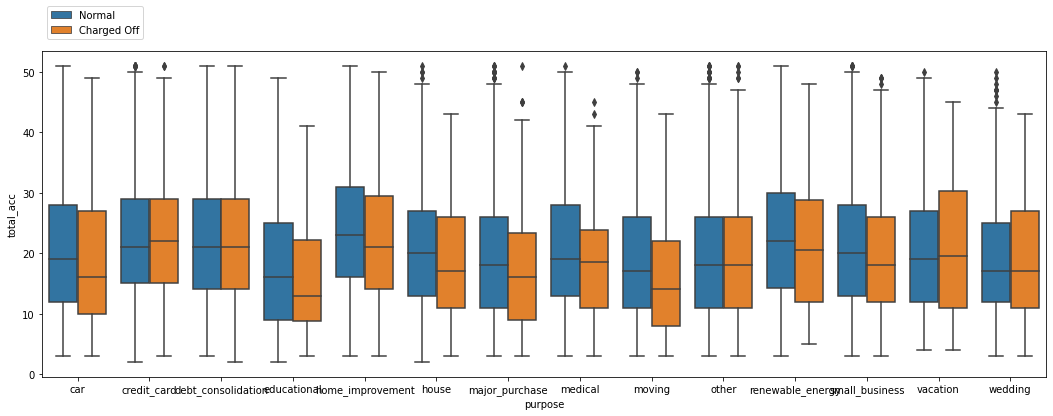

Quantile details for purpose and total_acc are Q1 = 14.0 and Q3 = 29.0

######################################################################################### 


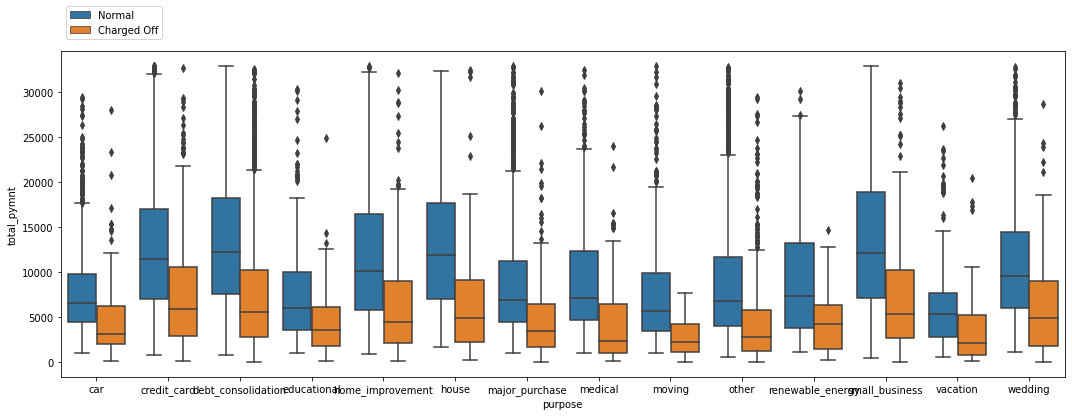

Quantile details for purpose and total_pymnt are Q1 = 5594.00844 and Q3 = 16553.74187

######################################################################################### 


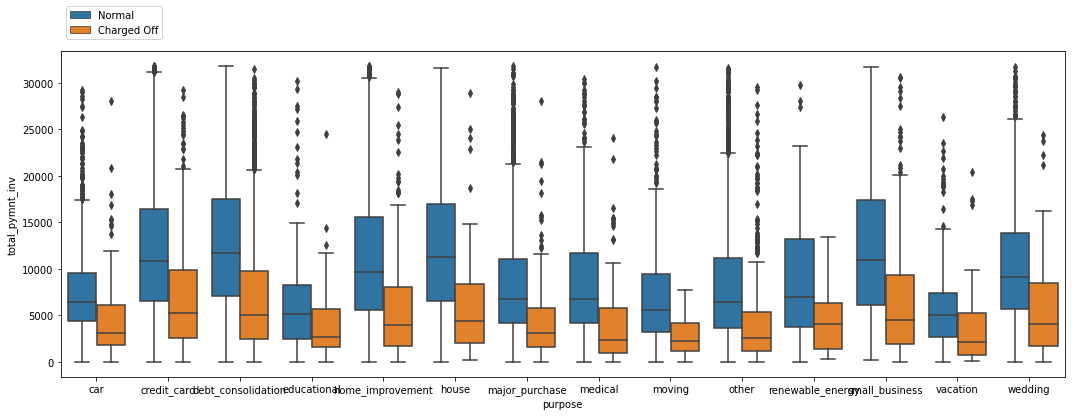

Quantile details for purpose and total_pymnt_inv are Q1 = 5138.68 and Q3 = 15815.91

######################################################################################### 


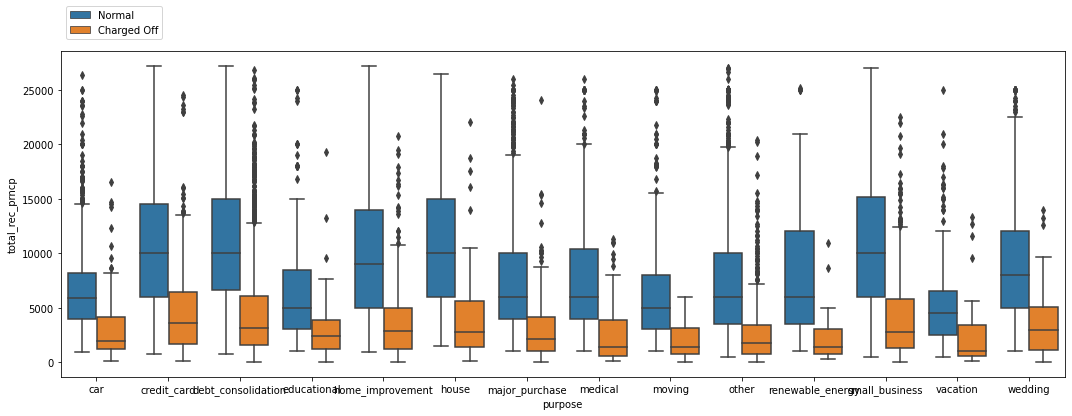

Quantile details for purpose and total_rec_prncp are Q1 = 4648.89 and Q3 = 13703.96

######################################################################################### 


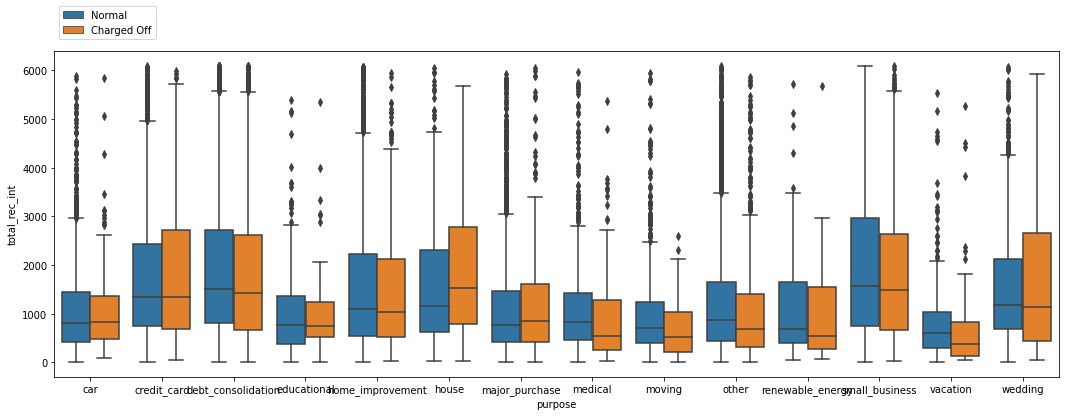

Quantile details for purpose and total_rec_int are Q1 = 665.16 and Q3 = 2838.13

######################################################################################### 


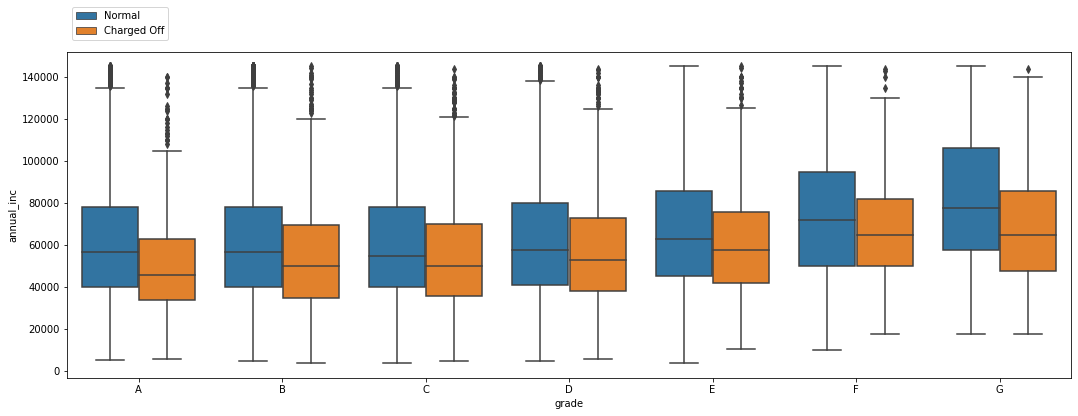

Quantile details for grade and annual_inc are Q1 = 40500.0 and Q3 = 82400.0

######################################################################################### 


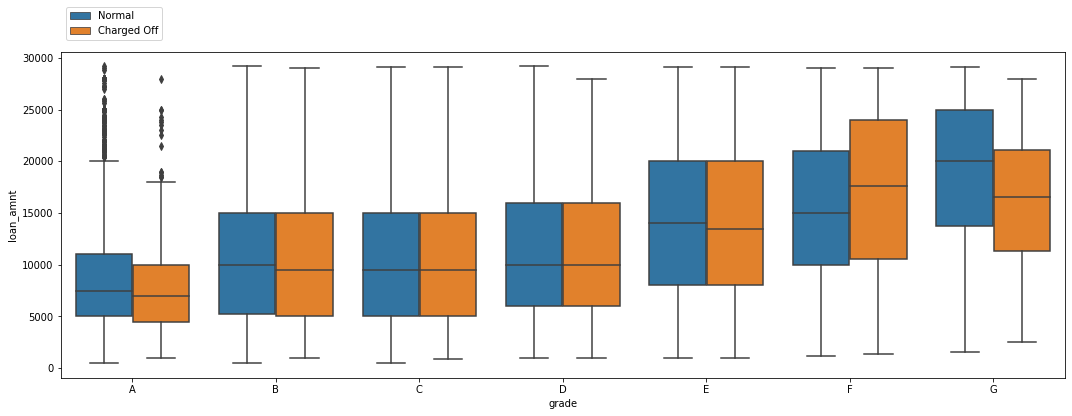

Quantile details for grade and loan_amnt are Q1 = 5500.0 and Q3 = 15000.0

######################################################################################### 


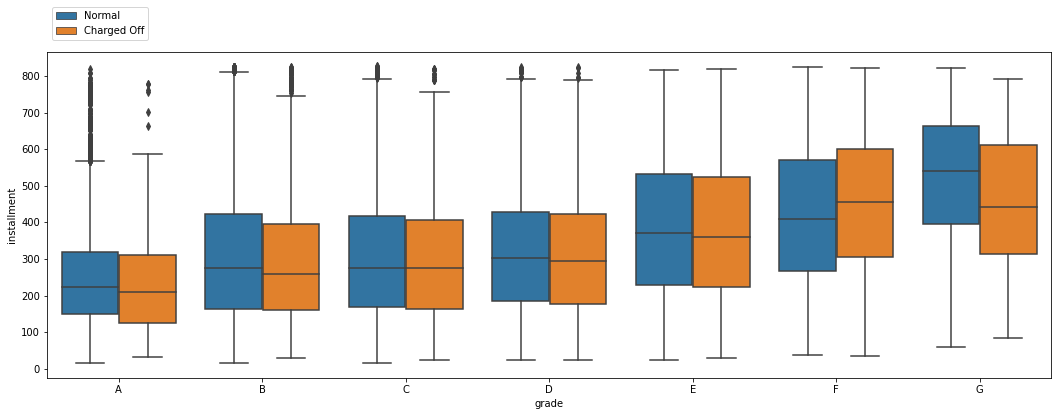

Quantile details for grade and installment are Q1 = 167.08 and Q3 = 430.78

######################################################################################### 


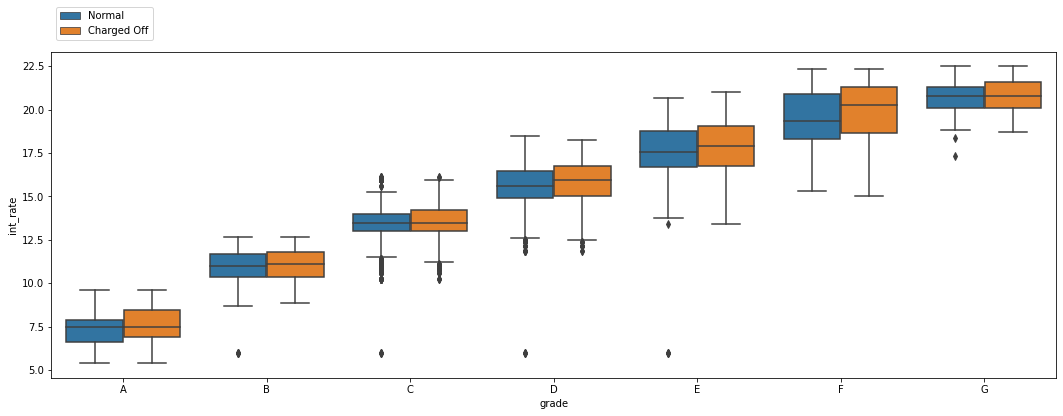

Quantile details for grade and int_rate are Q1 = 9.25 and Q3 = 14.59

######################################################################################### 


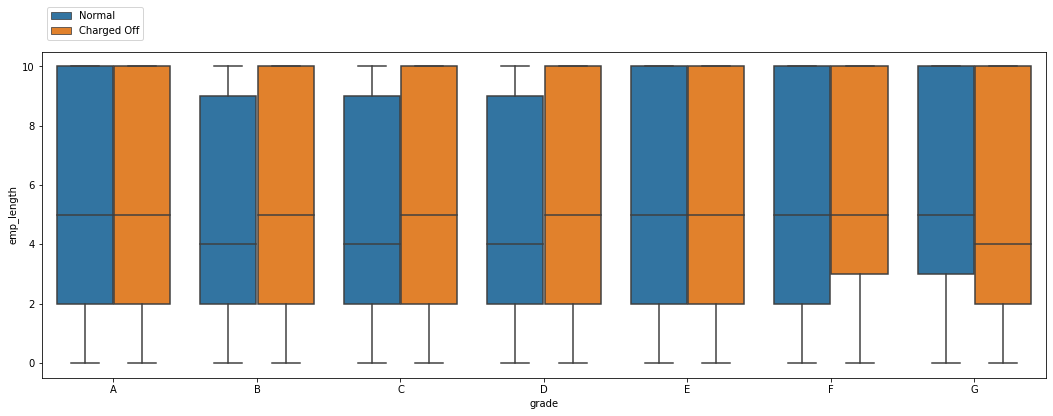

Quantile details for grade and emp_length are Q1 = 2.0 and Q3 = 10.0

######################################################################################### 


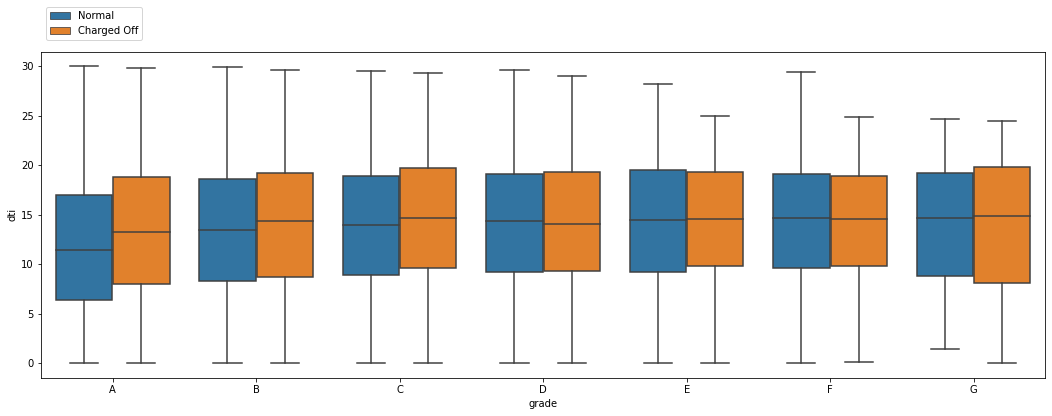

Quantile details for grade and dti are Q1 = 8.18 and Q3 = 18.6

######################################################################################### 


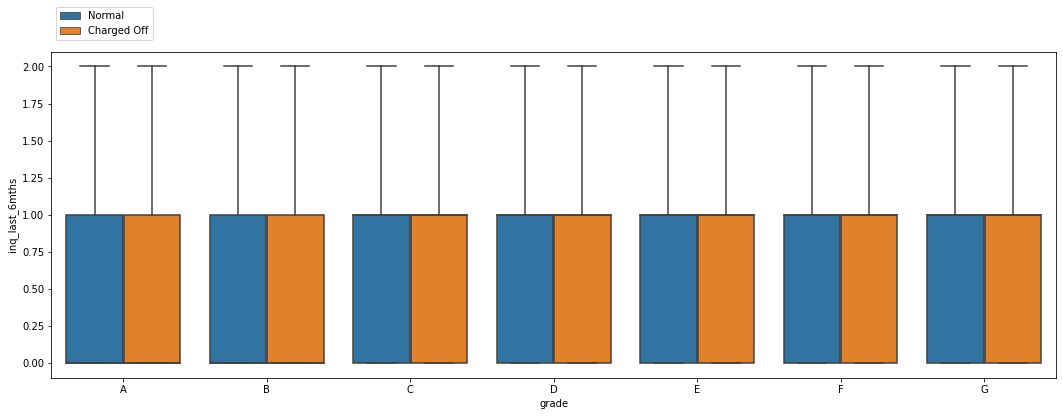

Quantile details for grade and inq_last_6mths are Q1 = 0.0 and Q3 = 1.0

######################################################################################### 


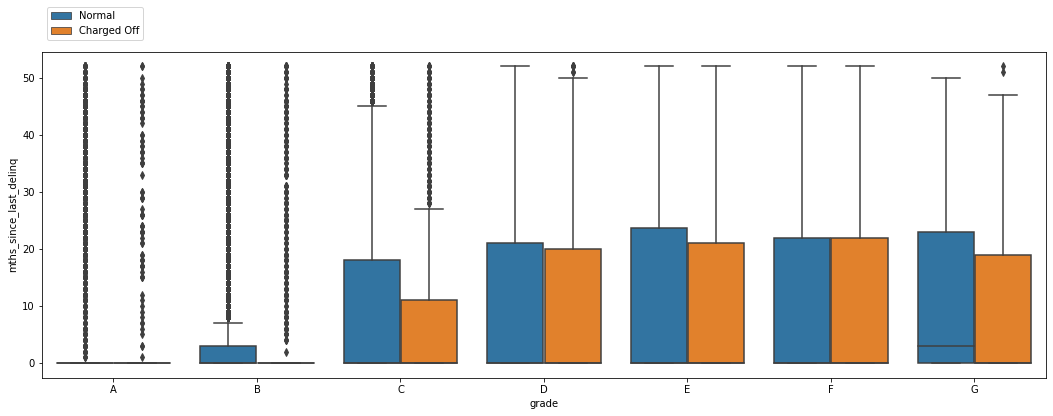

Quantile details for grade and mths_since_last_delinq are Q1 = 0.0 and Q3 = 21.0

######################################################################################### 


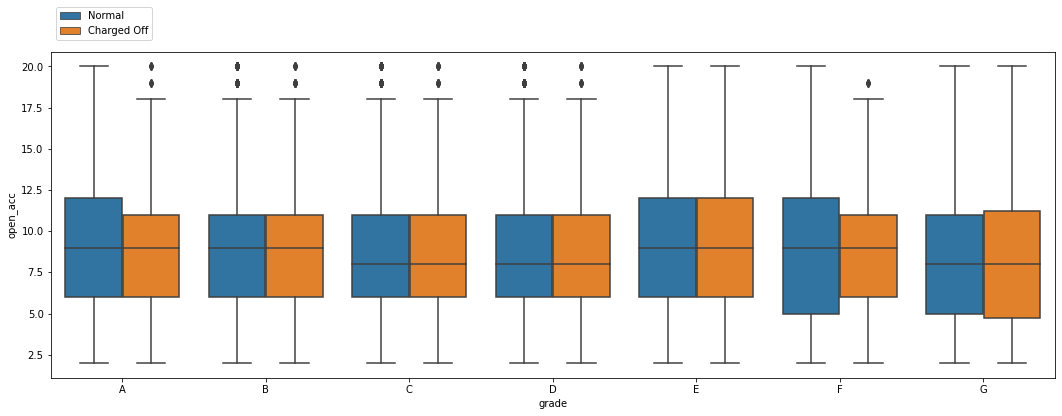

Quantile details for grade and open_acc are Q1 = 6.0 and Q3 = 12.0

######################################################################################### 


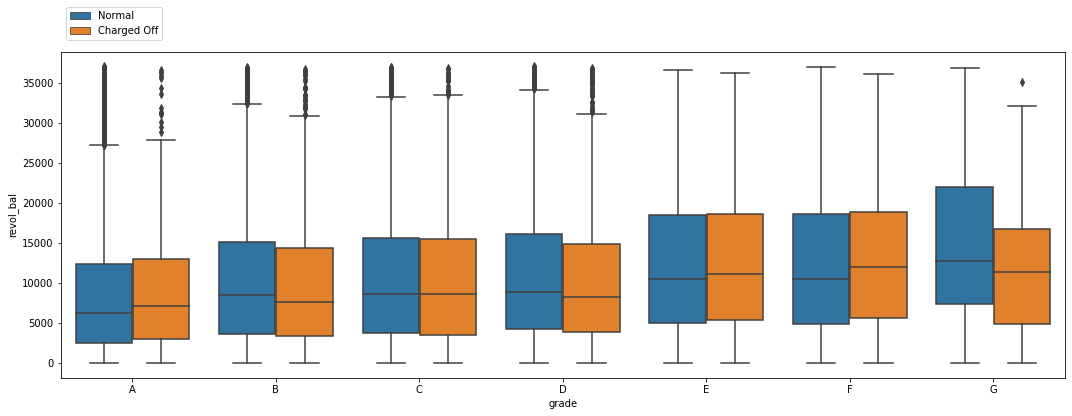

Quantile details for grade and revol_bal are Q1 = 3710.0 and Q3 = 17072.0

######################################################################################### 


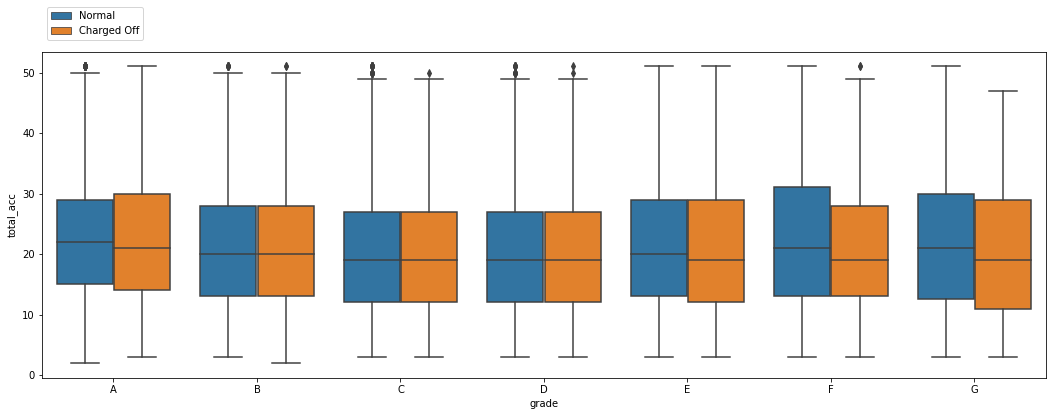

Quantile details for grade and total_acc are Q1 = 14.0 and Q3 = 29.0

######################################################################################### 


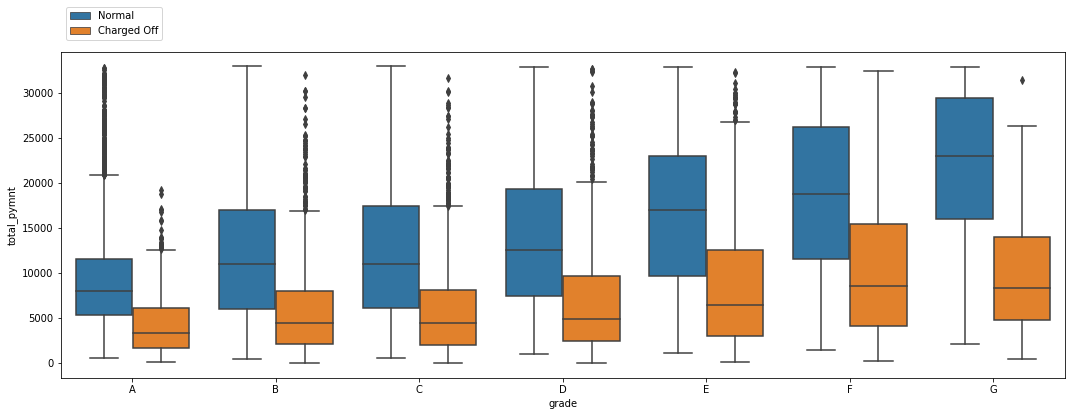

Quantile details for grade and total_pymnt are Q1 = 5594.00844 and Q3 = 16553.74187

######################################################################################### 


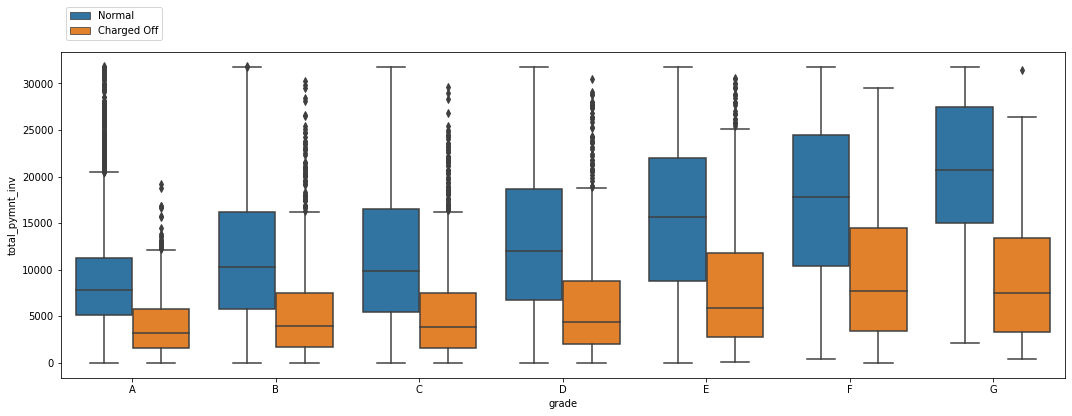

Quantile details for grade and total_pymnt_inv are Q1 = 5138.68 and Q3 = 15815.91

######################################################################################### 


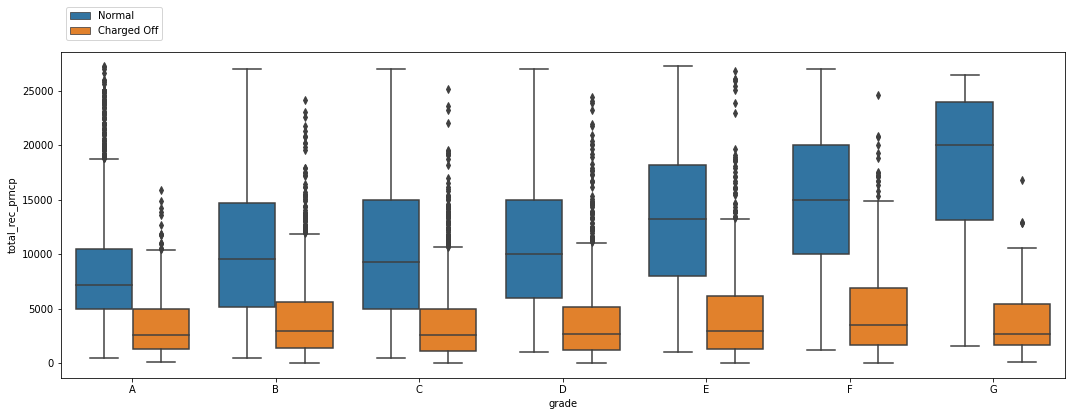

Quantile details for grade and total_rec_prncp are Q1 = 4648.89 and Q3 = 13703.96

######################################################################################### 


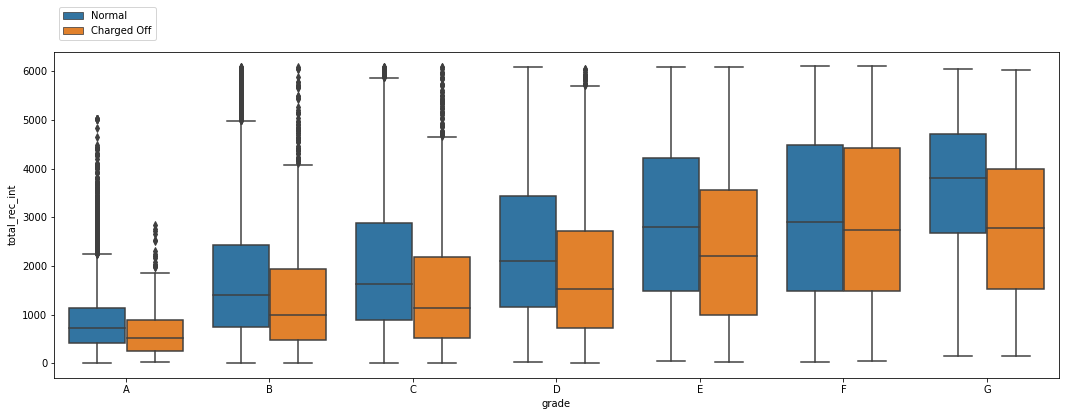

Quantile details for grade and total_rec_int are Q1 = 665.16 and Q3 = 2838.13

######################################################################################### 


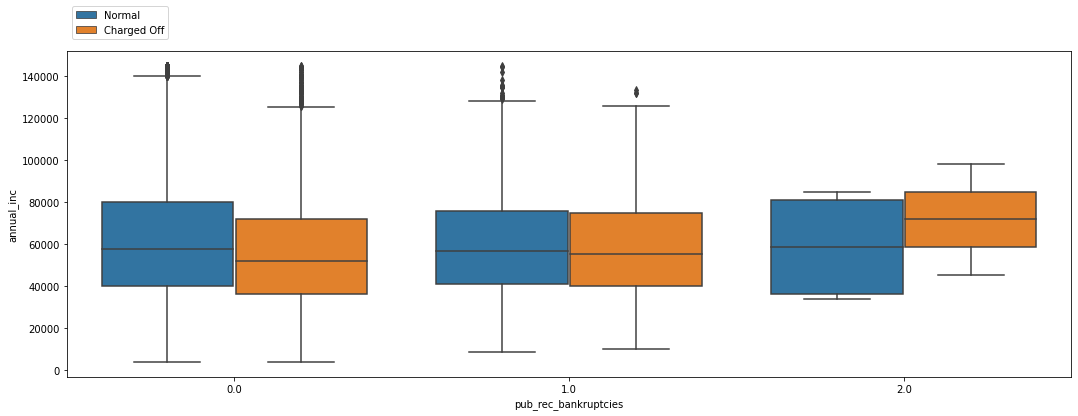

Quantile details for pub_rec_bankruptcies and annual_inc are Q1 = 40500.0 and Q3 = 82400.0

######################################################################################### 


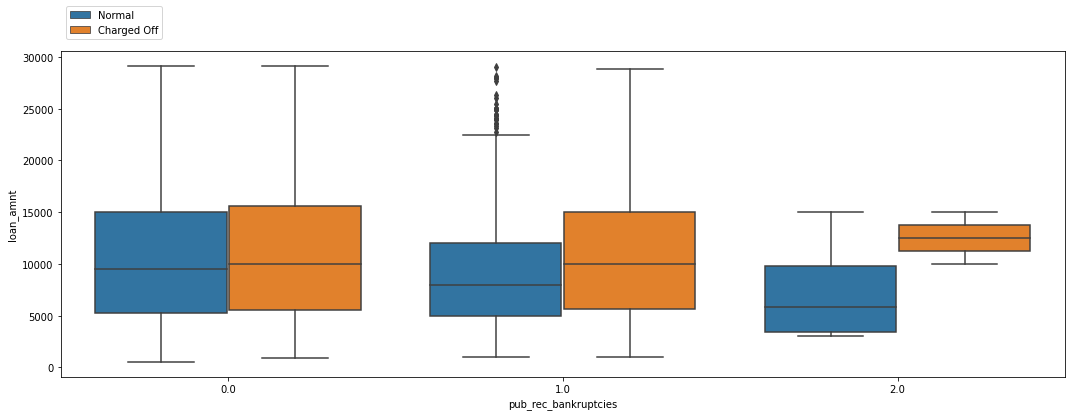

Quantile details for pub_rec_bankruptcies and loan_amnt are Q1 = 5500.0 and Q3 = 15000.0

######################################################################################### 


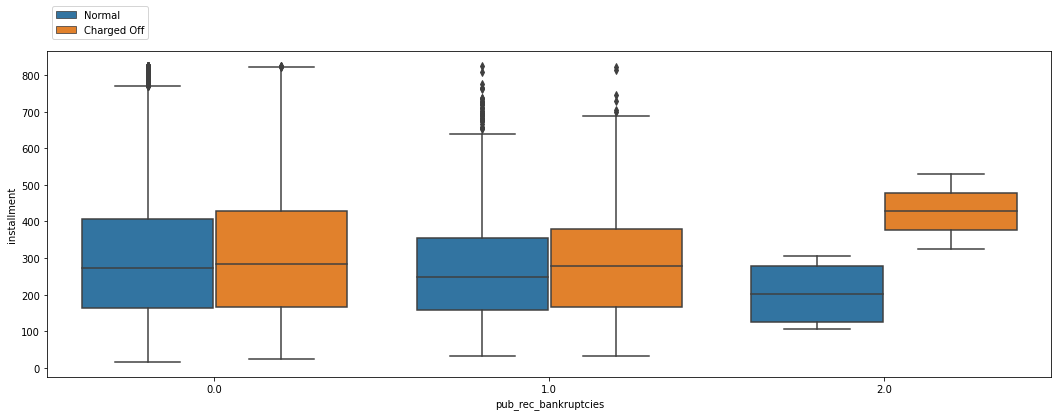

Quantile details for pub_rec_bankruptcies and installment are Q1 = 167.08 and Q3 = 430.78

######################################################################################### 


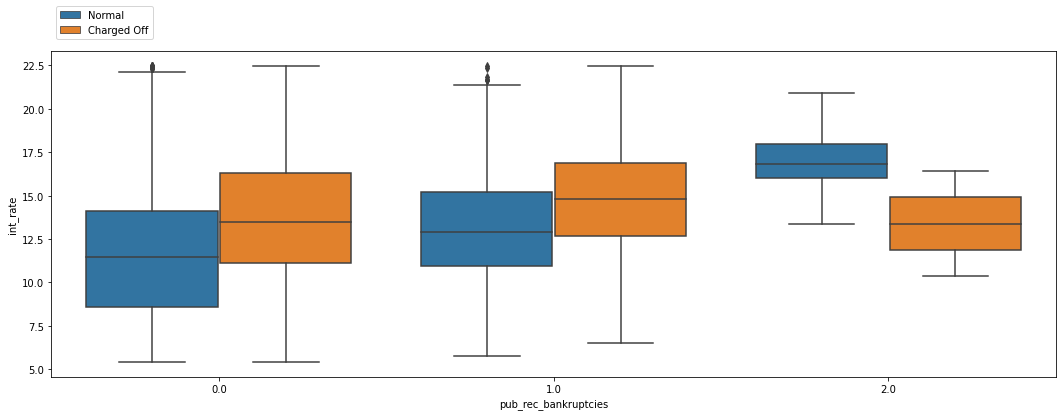

Quantile details for pub_rec_bankruptcies and int_rate are Q1 = 9.25 and Q3 = 14.59

######################################################################################### 


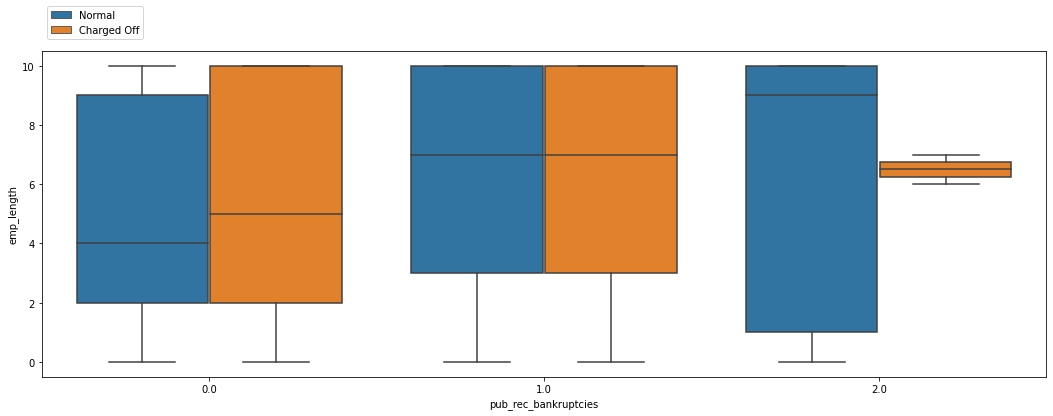

Quantile details for pub_rec_bankruptcies and emp_length are Q1 = 2.0 and Q3 = 10.0

######################################################################################### 


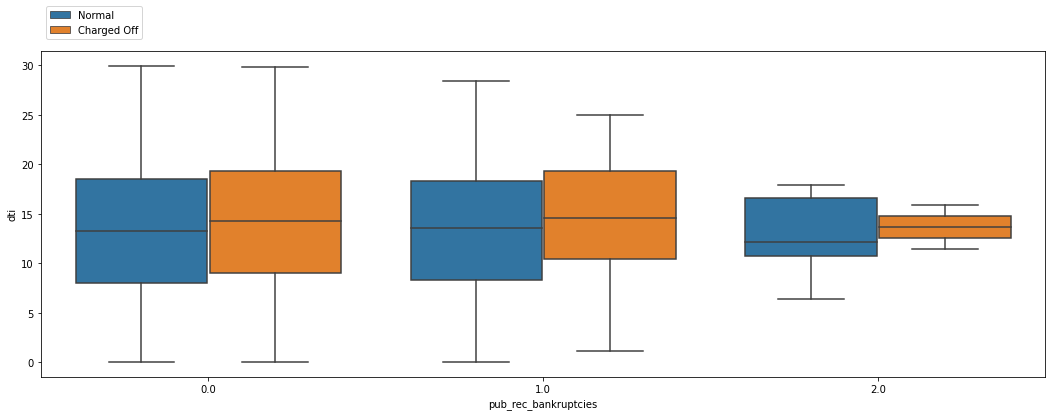

Quantile details for pub_rec_bankruptcies and dti are Q1 = 8.18 and Q3 = 18.6

######################################################################################### 


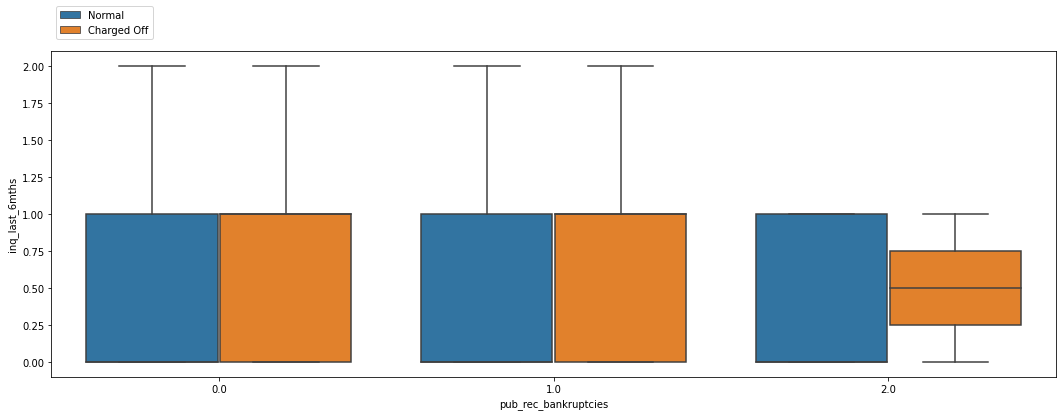

Quantile details for pub_rec_bankruptcies and inq_last_6mths are Q1 = 0.0 and Q3 = 1.0

######################################################################################### 


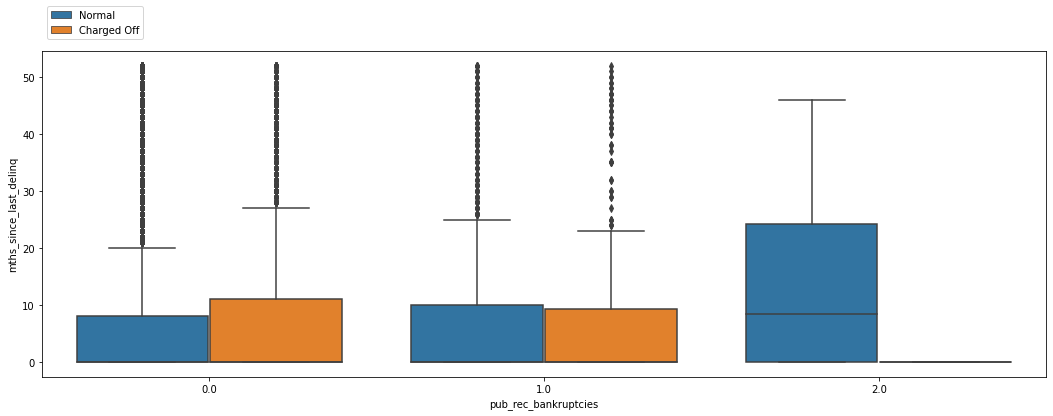

Quantile details for pub_rec_bankruptcies and mths_since_last_delinq are Q1 = 0.0 and Q3 = 21.0

######################################################################################### 


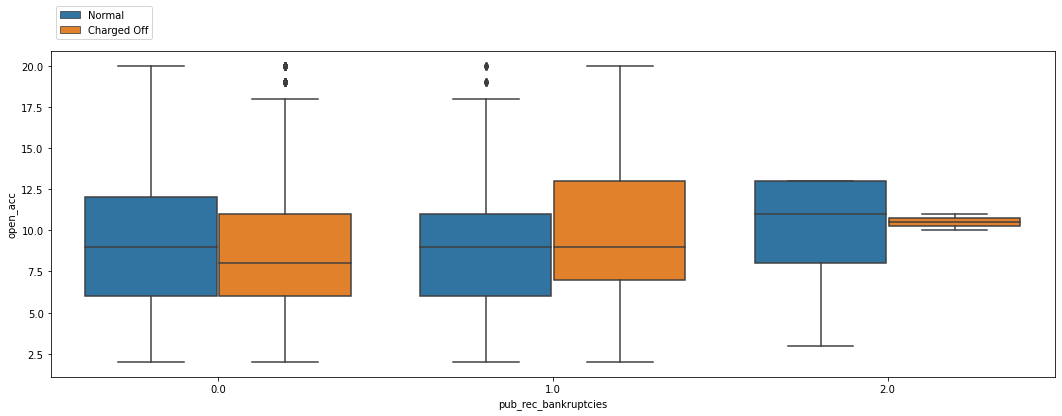

Quantile details for pub_rec_bankruptcies and open_acc are Q1 = 6.0 and Q3 = 12.0

######################################################################################### 


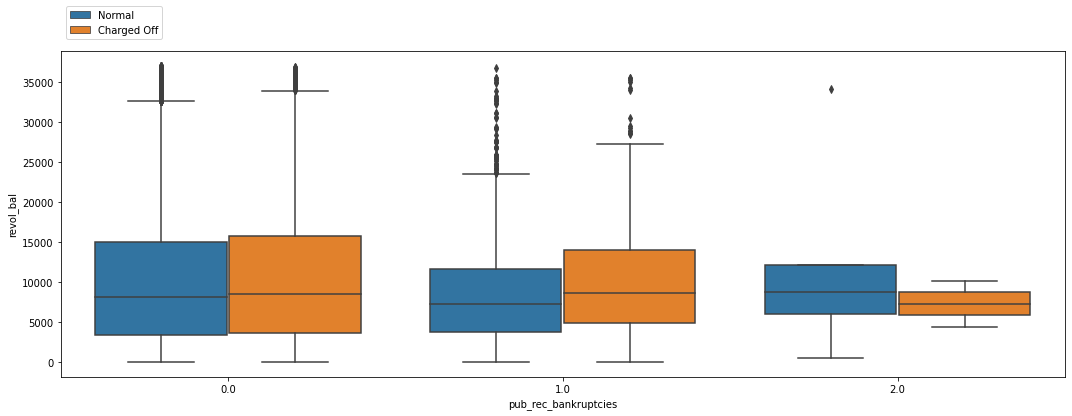

Quantile details for pub_rec_bankruptcies and revol_bal are Q1 = 3710.0 and Q3 = 17072.0

######################################################################################### 


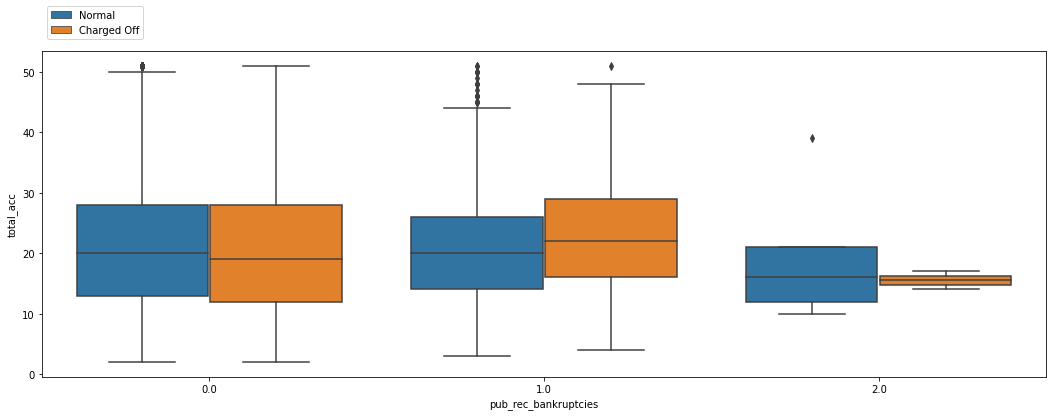

Quantile details for pub_rec_bankruptcies and total_acc are Q1 = 14.0 and Q3 = 29.0

######################################################################################### 


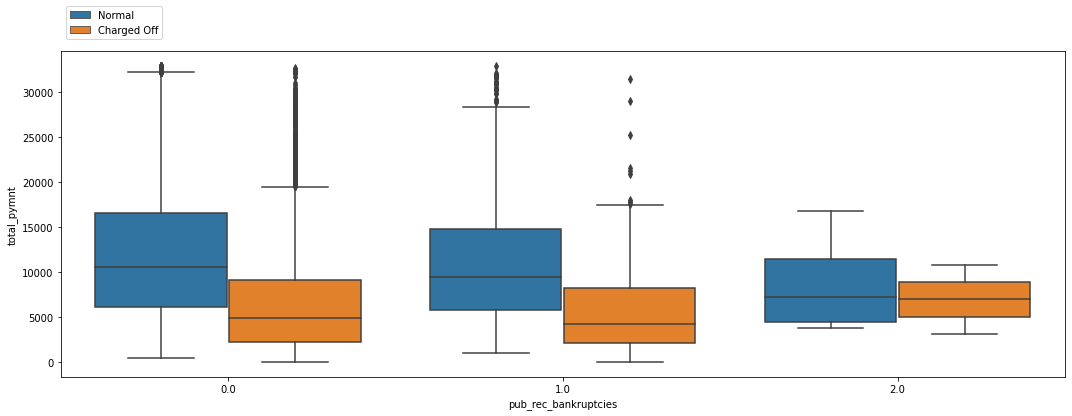

Quantile details for pub_rec_bankruptcies and total_pymnt are Q1 = 5594.00844 and Q3 = 16553.74187

######################################################################################### 


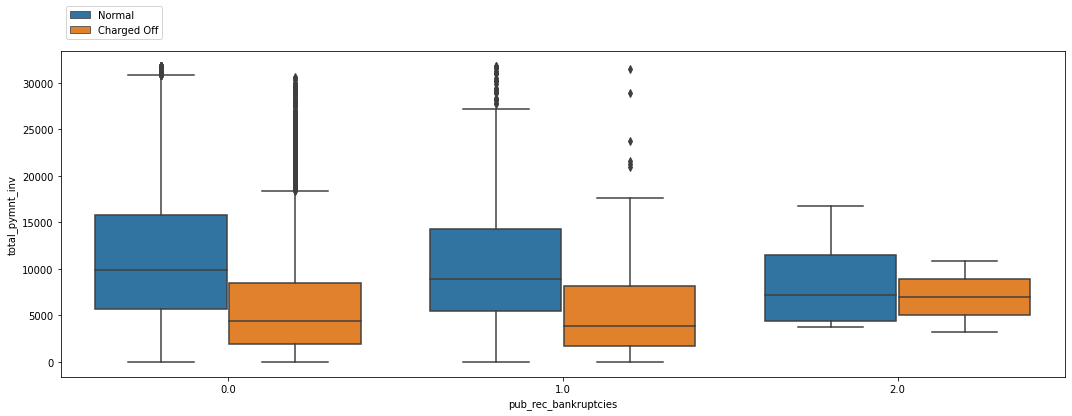

Quantile details for pub_rec_bankruptcies and total_pymnt_inv are Q1 = 5138.68 and Q3 = 15815.91

######################################################################################### 


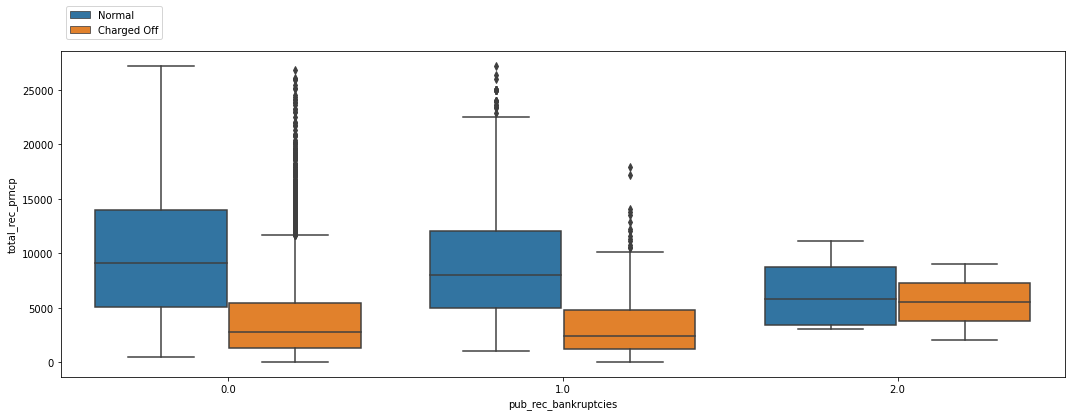

Quantile details for pub_rec_bankruptcies and total_rec_prncp are Q1 = 4648.89 and Q3 = 13703.96

######################################################################################### 


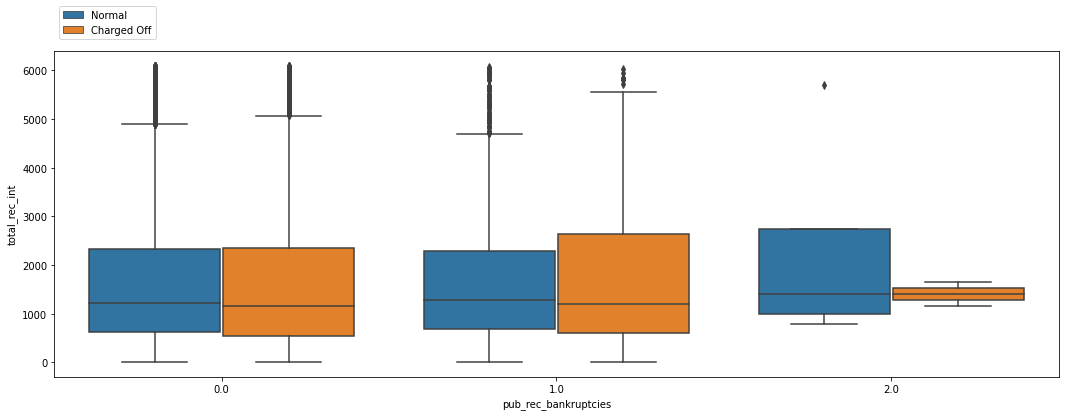

Quantile details for pub_rec_bankruptcies and total_rec_int are Q1 = 665.16 and Q3 = 2838.13

######################################################################################### 


In [2556]:
file = open("Multivariant_Analysis.txt", "w")

def create_categorical_boxplot(cat, num):
    
    fig, axs = plt.subplots(ncols=1, figsize=(18,6))
    new_df_num,q1,q3  = drop_outliers_from_series(num)   
    
    
    new_df_num = new_df_num[new_df_num.loan_status != "Current"]
    sns.boxplot(y=num, x=cat, hue=new_df_num["loan_status"], data=new_df_num.sort_values(cat))
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left')
    plt.ylabel(num)    
    plt.show()
    
    charged_off = new_df_num[new_df_num.loan_status == "Charged Off"]
    charged_off_describe = charged_off[num].describe()
    q1_charged_off = charged_off_describe["25%"]
    q3_charged_off = charged_off_describe["75%"]
    
    
    file.write(f"Charged Off Borrower's {cat} and {num} range between range {q1_charged_off} and {q3_charged_off}\n")
    

    print(f"Quantile details for {cat} and {num} are Q1 = {q1} and Q3 = {q3}\n")
    print("######################################################################################### ")

    
    file.write(f"Borrower's {cat} and {num} range between {q1} and {q3}\n")
    

for col in cat_variables:
    for num in num_variables:
        create_categorical_boxplot(col, num)
file.close()


<h2><span style="color: #0000ff;">Correlation Matix Analysis</span></h2>

In [2557]:
corr_variables = [ 'term', 'pub_rec_bankruptcies', 'annual_inc', 'loan_amnt', 'installment','int_rate','emp_length','dti','inq_last_6mths','mths_since_last_delinq','open_acc','revol_bal','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int']

corr_variables.sort()

df[corr_variables].corr()

,annual_inc,dti,emp_length,inq_last_6mths,installment,int_rate,loan_amnt,mths_since_last_delinq,open_acc,pub_rec_bankruptcies,revol_bal,term,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_prncp
annual_inc,1.000000,-0.122876,0.094267,0.034077,0.270627,0.053572,0.270906,0.017861,0.157792,-0.016543,0.279718,0.046754,0.235489,0.257679,0.246795,0.185136,0.259276
dti,-0.122876,1.000000,0.048584,0.001100,0.054502,0.111522,0.066658,-0.017164,0.288276,0.006999,0.228697,0.082442,0.229656,0.064458,0.071336,0.105933,0.040922
emp_length,0.094267,0.048584,1.000000,0.006327,0.106477,-0.004654,0.135874,0.037994,0.086245,0.069311,0.139543,0.107785,0.194273,0.121232,0.133009,0.112287,0.111519
inq_last_6mths,0.034077,0.001100,0.006327,1.000000,0.009373,0.132621,0.008906,0.012679,0.092256,0.015636,-0.022293,0.041213,0.111796,-0.009695,-0.019475,0.022427,-0.022525
installment,0.270627,0.054502,0.106477,0.009373,1.000000,0.283237,0.930184,-0.030063,0.172170,-0.033466,0.312596,0.101901,0.230376,0.858358,0.818712,0.635342,0.852373
int_rate,0.053572,0.111522,-0.004654,0.132621,0.283237,1.000000,0.310004,0.164243,0.010899,0.083183,0.097633,0.451833,-0.043061,0.310220,0.305515,0.531577,0.188661
loan_amnt,0.270906,0.066658,0.135874,0.008906,0.930184,0.310004,1.000000,-0.046444,0.176579,-0.036004,0.317453,0.361185,0.256038,0.887927,0.855443,0.730389,0.853430
mths_since_last_delinq,0.017861,-0.017164,0.037994,0.012679,-0.030063,0.164243,-0.046444,1.000000,0.035715,0.023937,-0.066506,0.004239,0.085526,-0.031676,-0.033227,0.016688,-0.046782
open_acc,0.157792,0.288276,0.086245,0.092256,0.172170,0.010899,0.176579,0.035715,1.000000,0.006086,0.288496,0.050909,0.686617,0.161865,0.152140,0.123904,0.159798
pub_rec_bankruptcies,-0.016543,0.006999,0.069311,0.015636,-0.033466,0.083183,-0.036004,0.023937,0.006086,1.000000,-0.048620,0.014105,-0.010797,-0.042233,-0.042425,-0.002164,-0.052812


<Axes: >

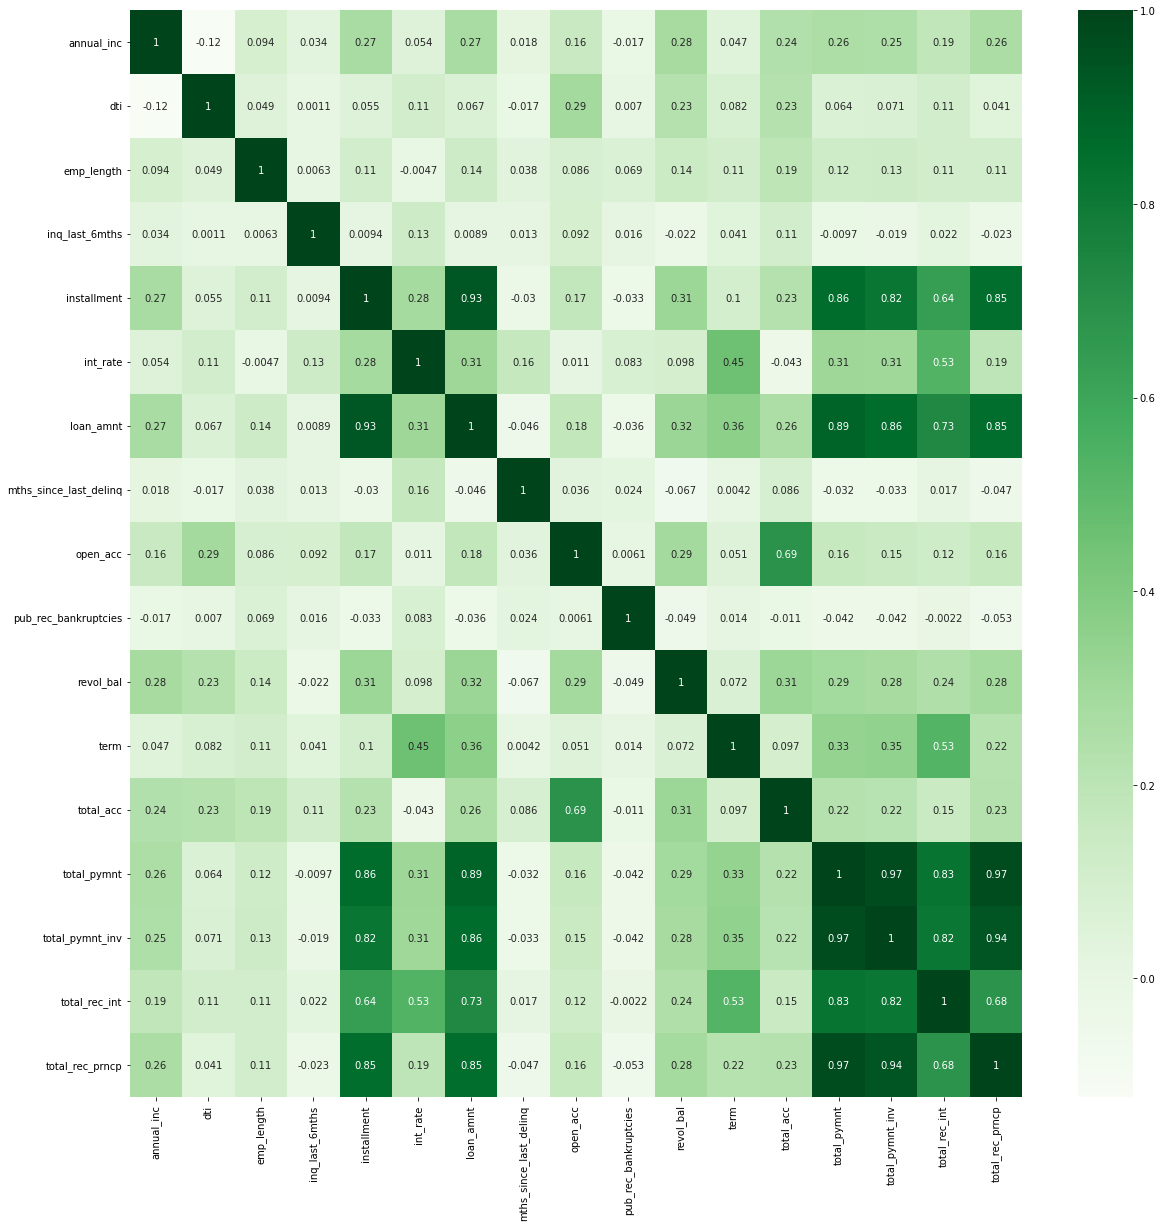

In [2558]:
plt.figure(figsize=(20,20))
sns.heatmap(data=df[corr_variables].corr(), annot=True, cmap='Greens')

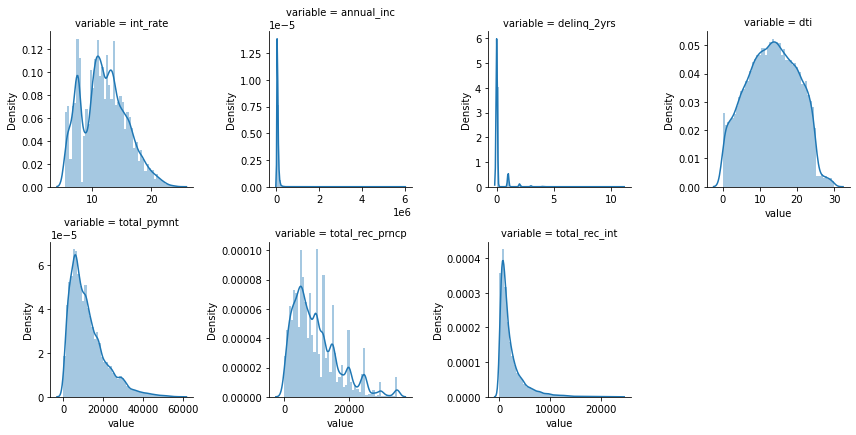

In [2559]:
# Plot FacetGrid Decide on 03 July 2023
imp_features = df[['int_rate','annual_inc','delinq_2yrs','dti','total_pymnt','total_rec_prncp','total_rec_int','loan_status']]

melted = pd.melt(imp_features,value_vars=['int_rate','annual_inc','delinq_2yrs','dti','total_pymnt','total_rec_prncp','total_rec_int'])
f = sns.FacetGrid(melted,col='variable',sharex=False,sharey=False,col_wrap=4)
g = f.map(sns.distplot,'value')